In [1]:
from utils import load_dataset, stats
from models import build_model, train_model_with_Keras_ImageDataGenerator
import numpy as np
from multiprocessing import Process

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.optimizers import Adam

In [2]:
def _train_models_Fold(z_train,z_val,y_train,y_val, classifiers,history_file_name='./histories/cnn_norm_no_dataAug.pickle'):
    cnn_model = build_model(gray_scale_model=False)
    train_model_with_Keras_ImageDataGenerator(cnn_model,x_train=z_train,x_val=z_val,batch_size=10,y_train=y_train,y_val=y_val,epochs=60, data_augmentation=False)
    
    # Resolve CNN fold result
    y_pred = cnn_model.predict(z_val).ravel()
    stats(y_val,y_pred,model_name='CNN',history_file_name=history_file_name)
    if len(classifiers) == 0:
        return
    
    # Crop Model
    layer_dict = dict([(layer.name,layer) for layer in cnn_model.layers])
#     x = layer_dict['block4_pool'].output
    x = cnn_model.layers[-2].output
    
    from tensorflow.keras.models import Model
    cropped_model = Model(cnn_model.input,x)
    cropped_model_train_output = cropped_model.predict(z_train)
    del cnn_model
    for sklearn_model,sklearn_model_name in classifiers:
        sklearn_model.fit(cropped_model_train_output,y_train)
        cropped_model_val_output = cropped_model.predict(z_val)
        sklearn_model_predicted = sklearn_model.predict_proba(cropped_model_val_output)[:,1]
        print("SKlearn predicted proba: ", sklearn_model_predicted)
        model_name = 'CNN + '+sklearn_model_name
        print("Validation sklearn Model result: ")
        stats(y_val,sklearn_model_predicted,model_name, history_file_name='./histories/'+model_name.replace(' ','_')+'.pickle')
    

In [3]:
z,labels = load_dataset(load_gray=False,normalize=True)

mean:  [[[[59.09468 59.09468 59.09468]]]]  shape:  (1, 1, 1, 3)
std:  [[[[79.38134 79.38134 79.38134]]]]


In [4]:
def print_distribution(y,label=''):
    print(label,'positives: ',len(y[y == 1]))
    print(label,'negatives: ', len(y[y == 0]))

print_distribution(labels, 'All data')

All data positives:  486
All data negatives:  623


# 10 5-fold

Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
____________________

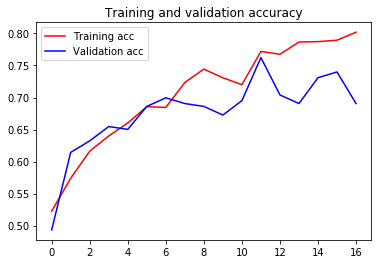

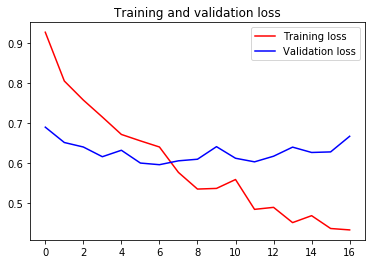

Creating history file
saving model predictions
CNN  stats!
confusionM  [[83 42]
 [27 71]]
acc  0.6905829596412556
recall 0.7244897959183674
auc 0.6942448979591836


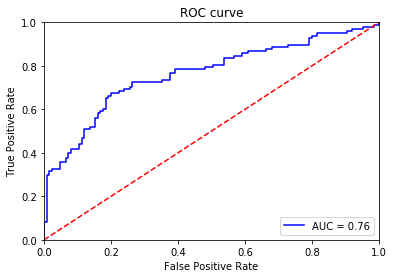

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

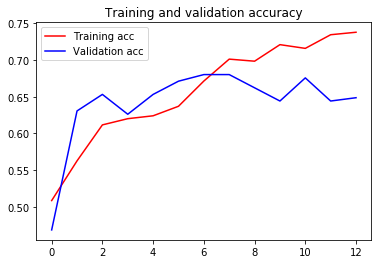

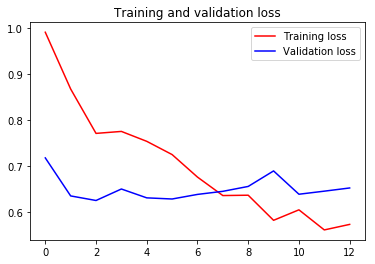

saving model predictions
CNN  stats!
confusionM  [[85 40]
 [38 59]]
acc  0.6486486486486487
recall 0.6082474226804123
auc 0.6441237113402061


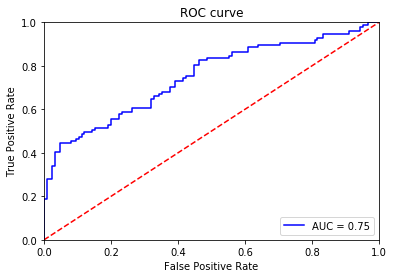

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

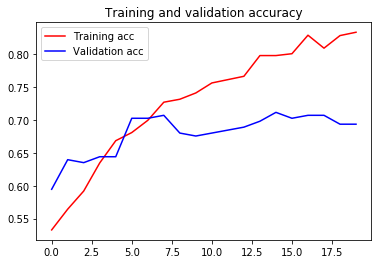

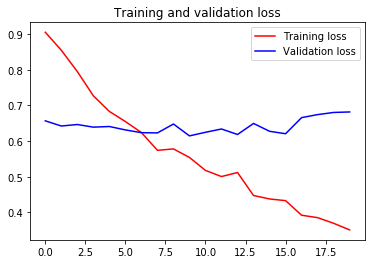

Process Process-3:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-e16bf74ca776>", line 17, in _train_models_Fold
    y_pred = cnn_model.predict(z_val).ravel()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py", line 1878, in predict
    self, x, batch_size=batch_size, verbose=verbose, steps=steps)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training_arrays.py", line 326, in predict_loop
    batch_outs = f(ins_batch)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/backend.py", line 2986, in __call__
    run_metadata=self.run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1439, in __call__
    run_metadata_ptr)
  File 

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

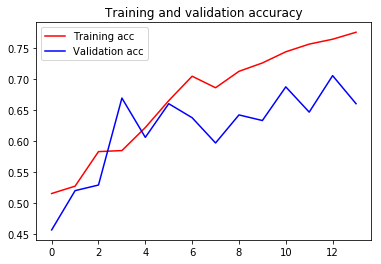

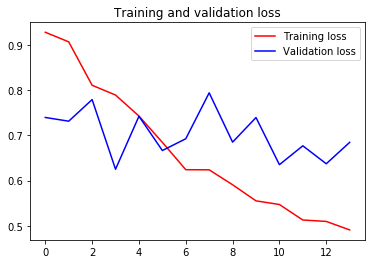

saving model predictions
CNN  stats!
confusionM  [[63 61]
 [14 83]]
acc  0.6606334841628959
recall 0.8556701030927835
auc 0.6818673096109079


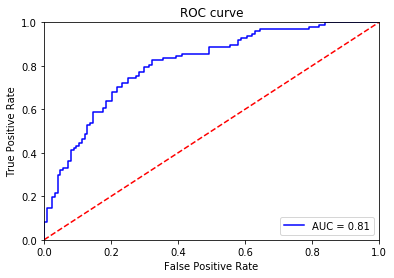

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

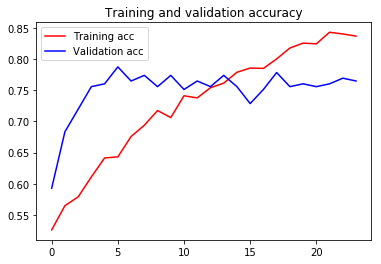

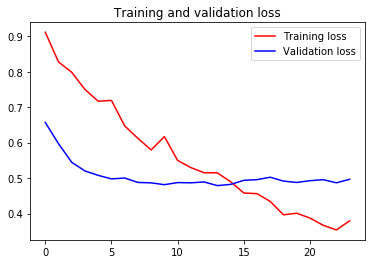

saving model predictions
CNN  stats!
confusionM  [[108  16]
 [ 36  61]]
acc  0.7647058823529411
recall 0.6288659793814433
auc 0.7499168606584636


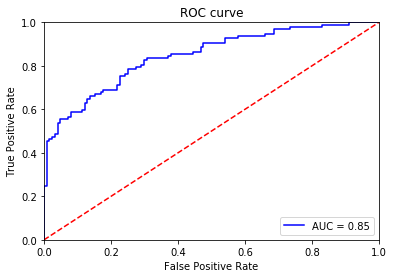

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

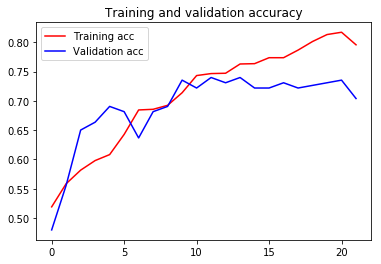

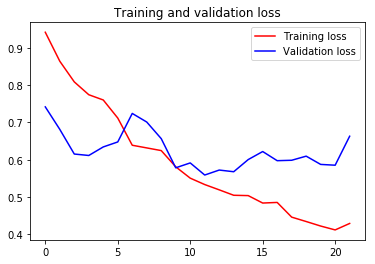

saving model predictions
CNN  stats!
confusionM  [[77 48]
 [18 80]]
acc  0.7040358744394619
recall 0.8163265306122449
auc 0.7161632653061224


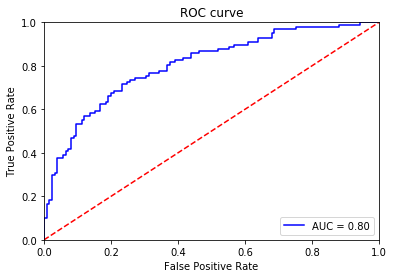

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

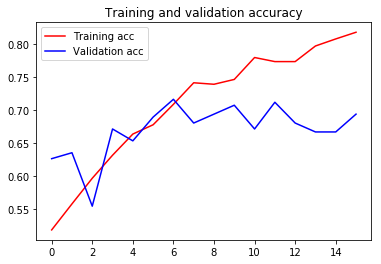

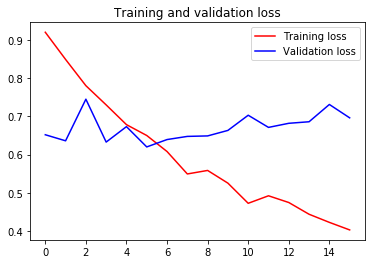

saving model predictions
CNN  stats!
confusionM  [[96 29]
 [39 58]]
acc  0.6936936936936937
recall 0.5979381443298969
auc 0.6829690721649485


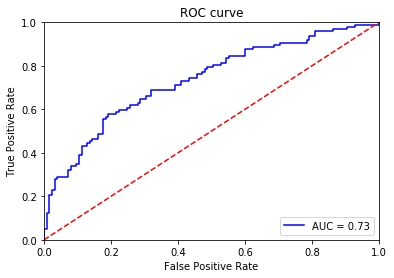

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

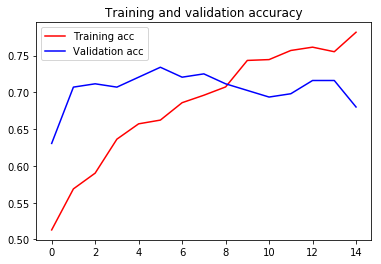

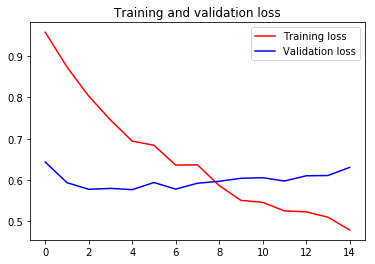

saving model predictions
CNN  stats!
confusionM  [[89 36]
 [35 62]]
acc  0.6801801801801802
recall 0.6391752577319587
auc 0.6755876288659793


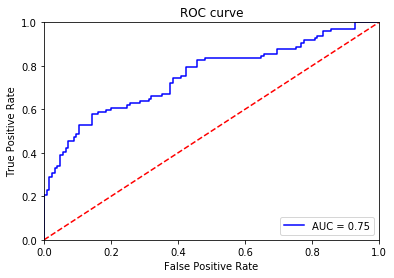

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

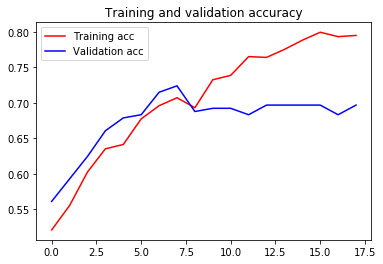

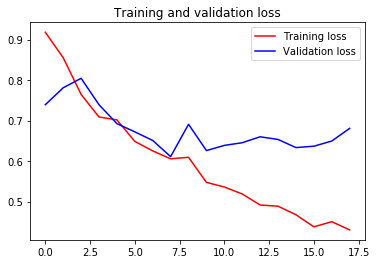

saving model predictions
CNN  stats!
confusionM  [[113  11]
 [ 56  41]]
acc  0.6968325791855203
recall 0.422680412371134
auc 0.6669853674758895


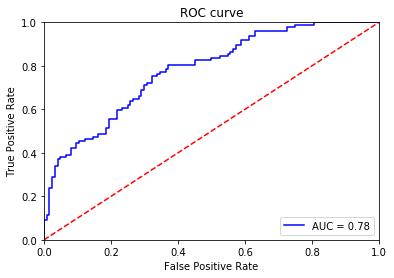

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

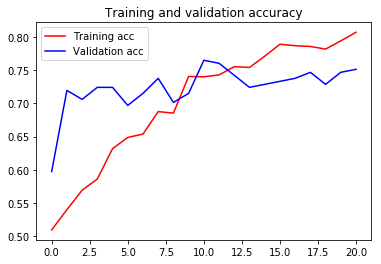

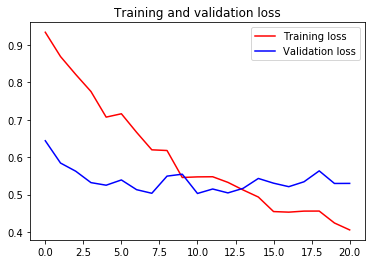

saving model predictions
CNN  stats!
confusionM  [[94 30]
 [25 72]]
acc  0.751131221719457
recall 0.7422680412371134
auc 0.7501662786830728


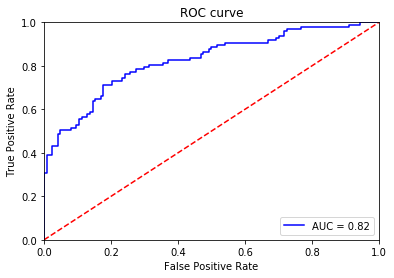

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

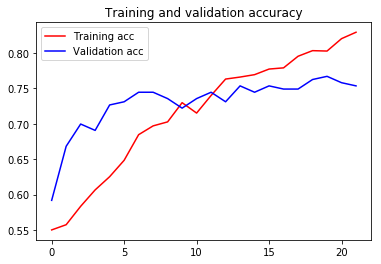

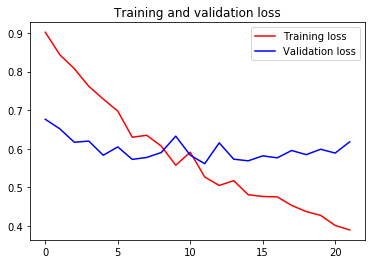

saving model predictions
CNN  stats!
confusionM  [[113  12]
 [ 43  55]]
acc  0.7533632286995515
recall 0.5612244897959183
auc 0.7326122448979592


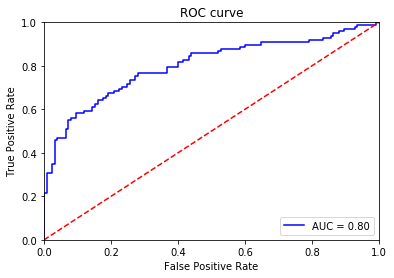

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

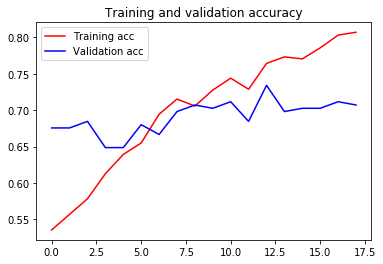

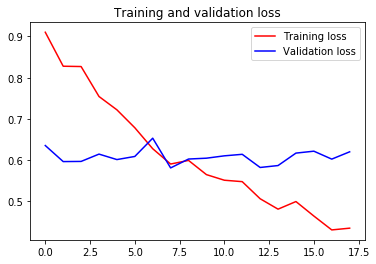

saving model predictions
CNN  stats!
confusionM  [[89 36]
 [29 68]]
acc  0.7072072072072072
recall 0.7010309278350515
auc 0.7065154639175257


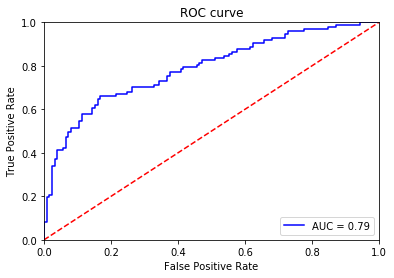

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

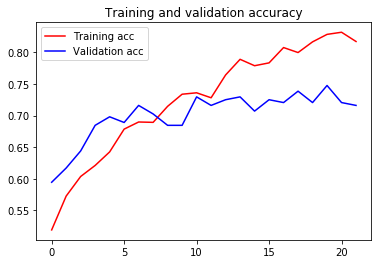

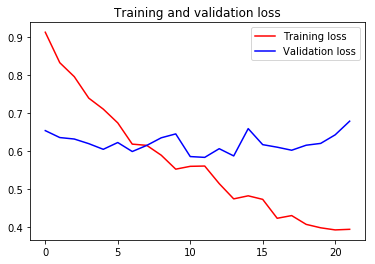

saving model predictions
CNN  stats!
confusionM  [[79 46]
 [17 80]]
acc  0.7162162162162162
recall 0.8247422680412371
auc 0.7283711340206185


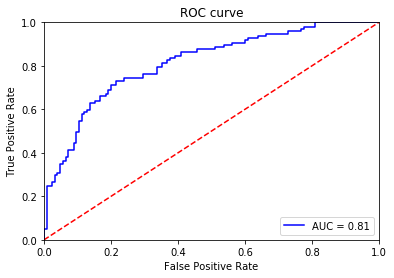

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

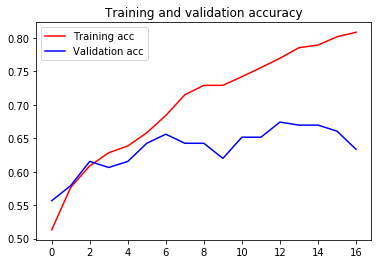

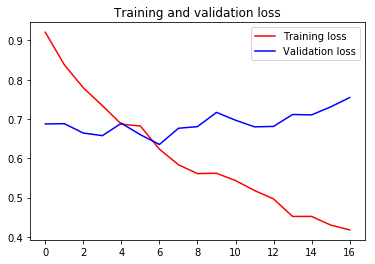

saving model predictions
CNN  stats!
confusionM  [[72 52]
 [29 68]]
acc  0.6334841628959276
recall 0.7010309278350515
auc 0.6408380445626869


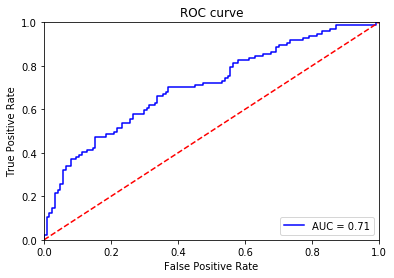

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

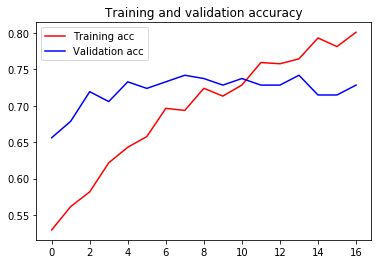

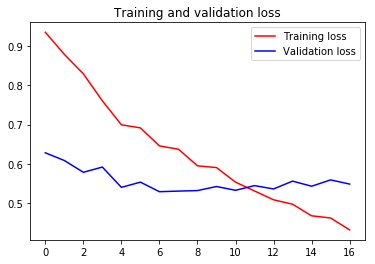

saving model predictions
CNN  stats!
confusionM  [[102  22]
 [ 38  59]]
acc  0.7285067873303167
recall 0.6082474226804123
auc 0.7154140339208513


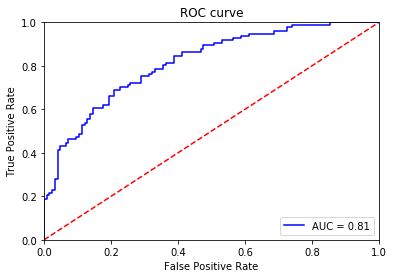

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

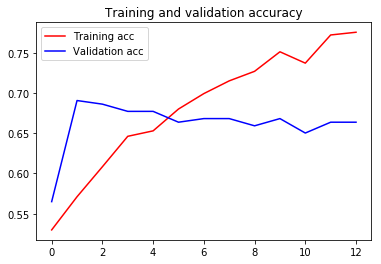

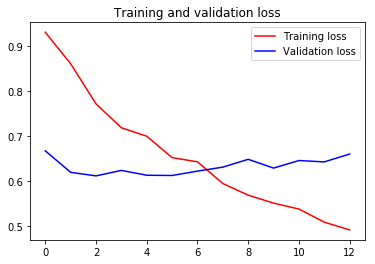

saving model predictions
CNN  stats!
confusionM  [[92 33]
 [42 56]]
acc  0.6636771300448431
recall 0.5714285714285714
auc 0.6537142857142857


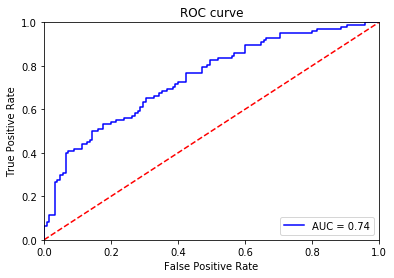

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

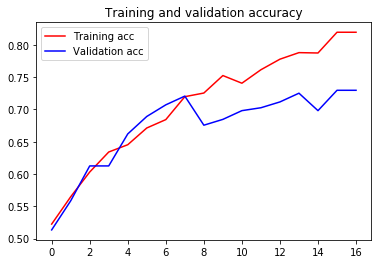

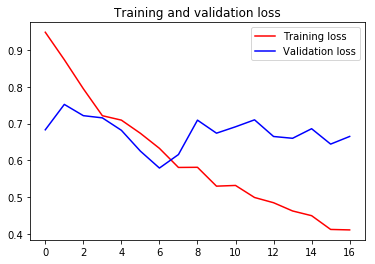

saving model predictions
CNN  stats!
confusionM  [[80 45]
 [15 82]]
acc  0.7297297297297297
recall 0.845360824742268
auc 0.7426804123711341


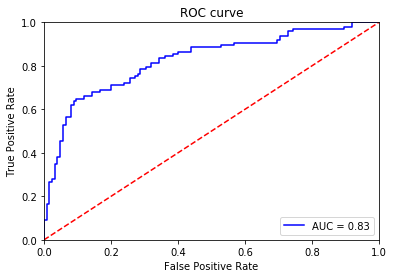

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

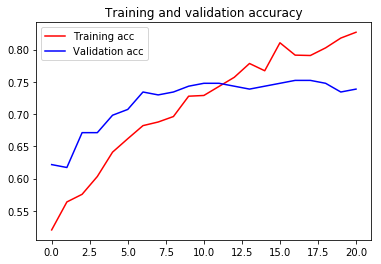

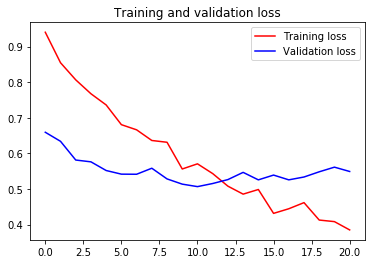

saving model predictions
CNN  stats!
confusionM  [[91 34]
 [24 73]]
acc  0.7387387387387387
recall 0.7525773195876289
auc 0.7402886597938144


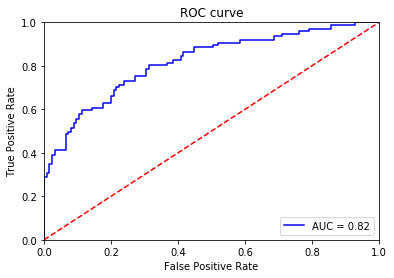

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

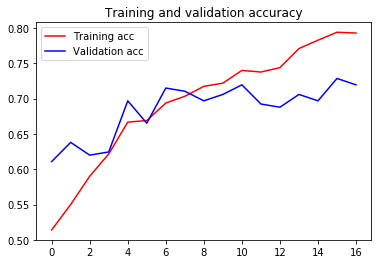

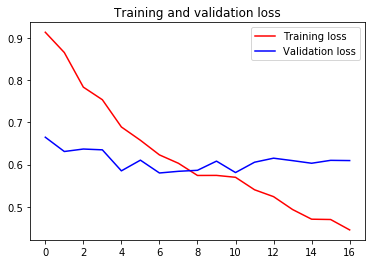

saving model predictions
CNN  stats!
confusionM  [[94 30]
 [32 65]]
acc  0.7194570135746606
recall 0.6701030927835051
auc 0.7140838044562686


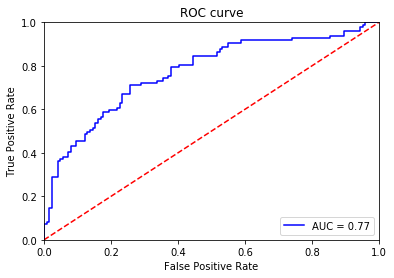

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

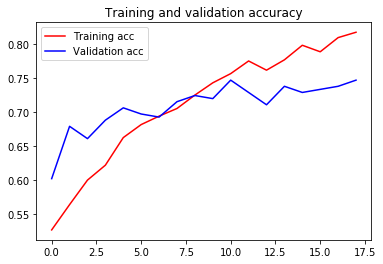

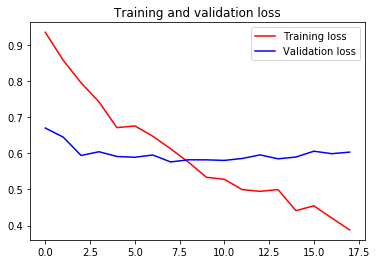

saving model predictions
CNN  stats!
confusionM  [[110  14]
 [ 42  55]]
acc  0.746606334841629
recall 0.5670103092783505
auc 0.7270535417359495


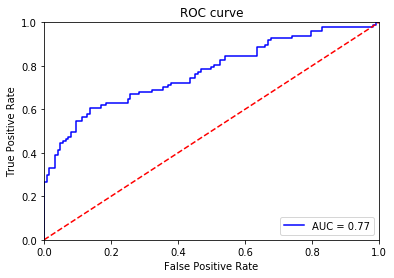

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

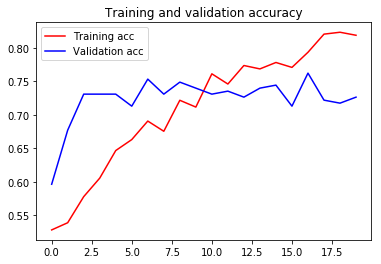

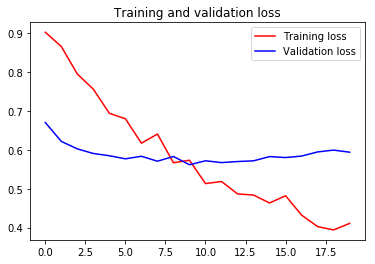

saving model predictions
CNN  stats!
confusionM  [[101  24]
 [ 37  61]]
acc  0.726457399103139
recall 0.6224489795918368
auc 0.7152244897959185


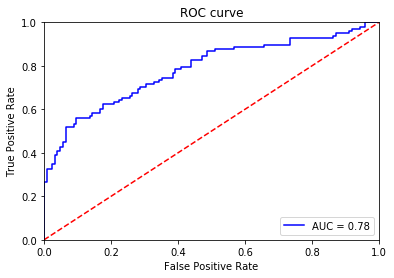

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

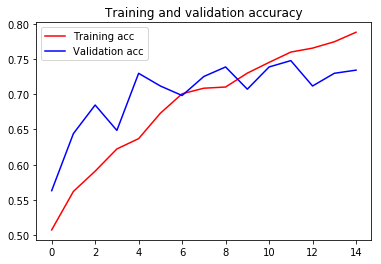

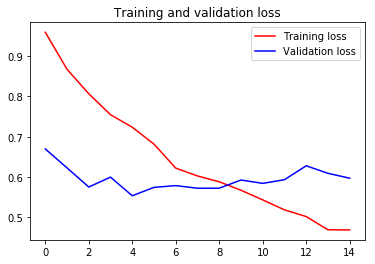

saving model predictions
CNN  stats!
confusionM  [[101  24]
 [ 35  62]]
acc  0.7342342342342343
recall 0.6391752577319587
auc 0.7235876288659794


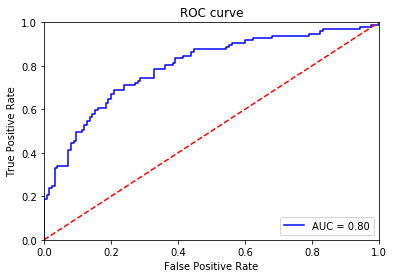

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

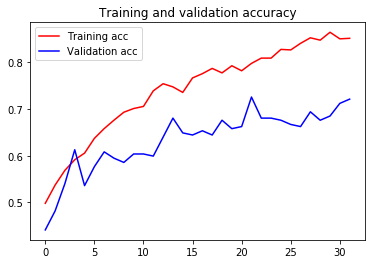

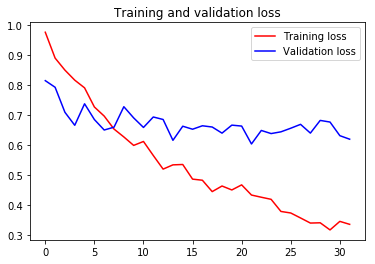

saving model predictions
CNN  stats!
confusionM  [[91 34]
 [28 69]]
acc  0.7207207207207207
recall 0.711340206185567
auc 0.7196701030927836


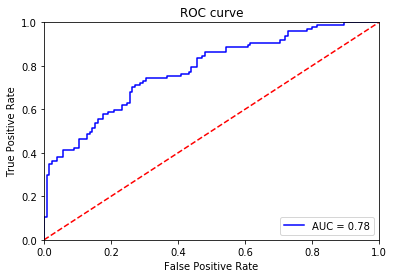

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

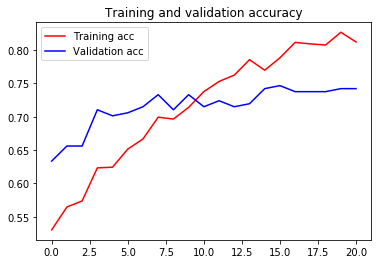

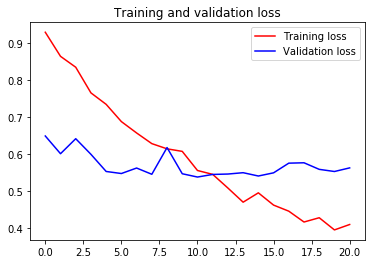

Process Process-24:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-e16bf74ca776>", line 17, in _train_models_Fold
    y_pred = cnn_model.predict(z_val).ravel()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py", line 1878, in predict
    self, x, batch_size=batch_size, verbose=verbose, steps=steps)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training_arrays.py", line 326, in predict_loop
    batch_outs = f(ins_batch)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/backend.py", line 2986, in __call__
    run_metadata=self.run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1439, in __call__
    run_metadata_ptr)
  File

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

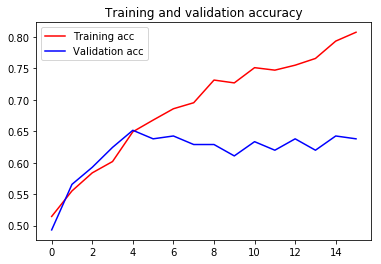

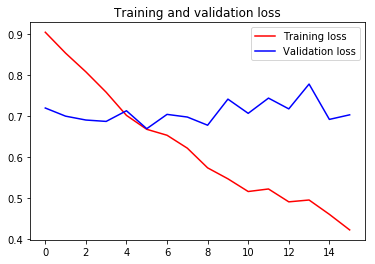

saving model predictions
CNN  stats!
confusionM  [[68 56]
 [24 73]]
acc  0.6380090497737556
recall 0.7525773195876289
auc 0.6504822081809112


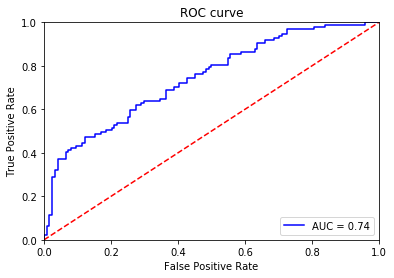

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

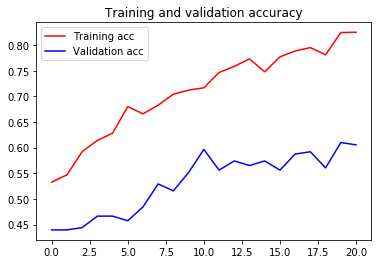

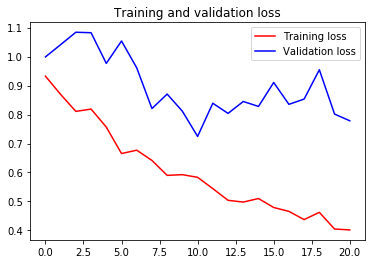

Process Process-26:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-e16bf74ca776>", line 17, in _train_models_Fold
    y_pred = cnn_model.predict(z_val).ravel()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py", line 1878, in predict
    self, x, batch_size=batch_size, verbose=verbose, steps=steps)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training_arrays.py", line 326, in predict_loop
    batch_outs = f(ins_batch)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/backend.py", line 2986, in __call__
    run_metadata=self.run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1439, in __call__
    run_metadata_ptr)
  File

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

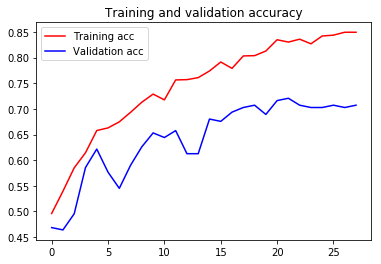

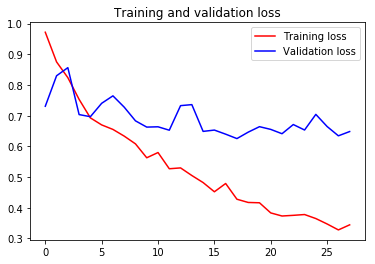

saving model predictions
CNN  stats!
confusionM  [[83 42]
 [23 74]]
acc  0.7072072072072072
recall 0.7628865979381443
auc 0.7134432989690721


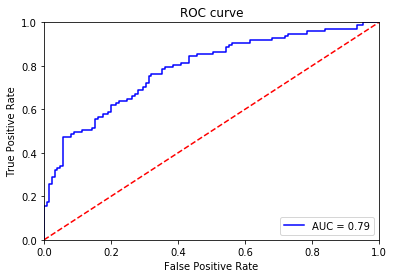

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

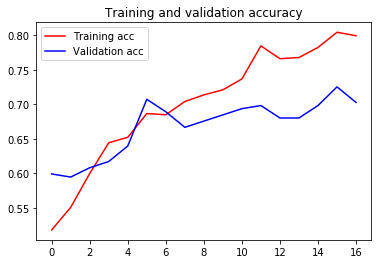

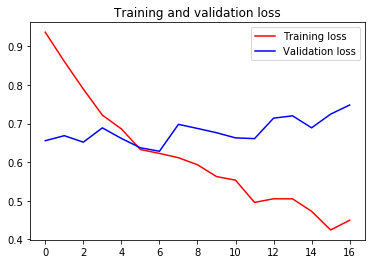

saving model predictions
CNN  stats!
confusionM  [[87 38]
 [28 69]]
acc  0.7027027027027027
recall 0.711340206185567
auc 0.7036701030927834


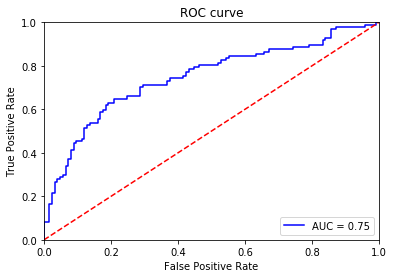

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

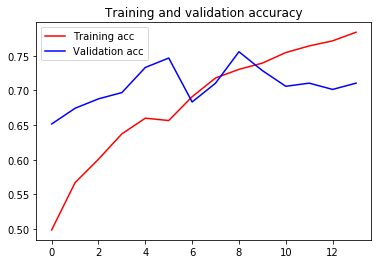

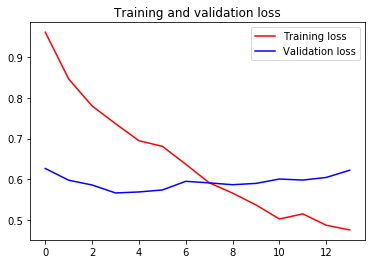

saving model predictions
CNN  stats!
confusionM  [[90 34]
 [30 67]]
acc  0.7104072398190046
recall 0.6907216494845361
auc 0.7082640505487197


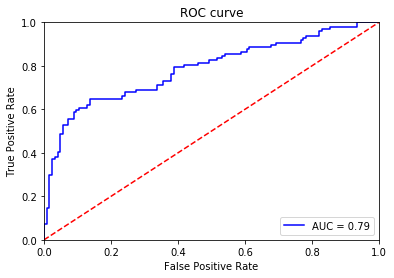

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

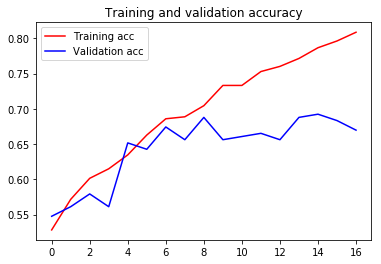

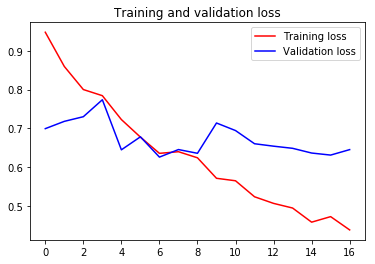

saving model predictions
CNN  stats!
confusionM  [[76 48]
 [25 72]]
acc  0.669683257918552
recall 0.7422680412371134
auc 0.6775856335217826


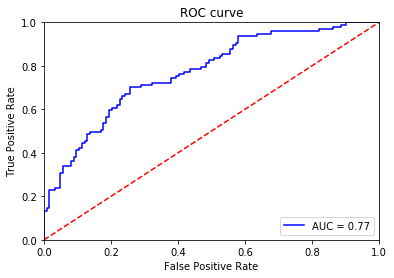

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

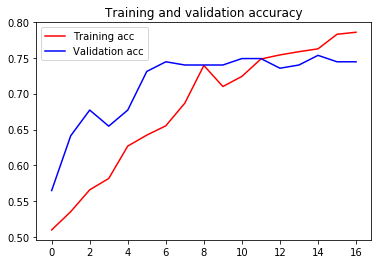

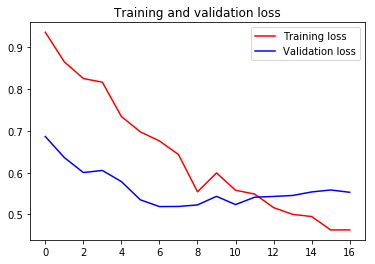

saving model predictions
CNN  stats!
confusionM  [[110  15]
 [ 42  56]]
acc  0.7443946188340808
recall 0.5714285714285714
auc 0.7257142857142856


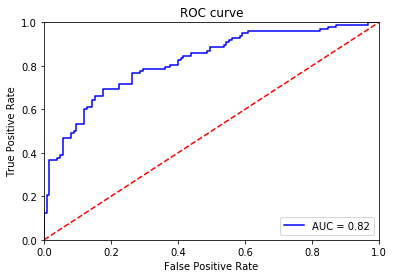

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

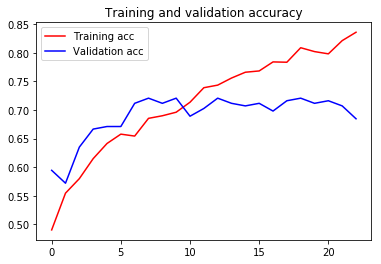

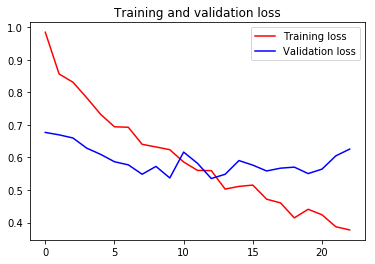

saving model predictions
CNN  stats!
confusionM  [[77 48]
 [22 75]]
acc  0.6846846846846847
recall 0.7731958762886598
auc 0.6945979381443299


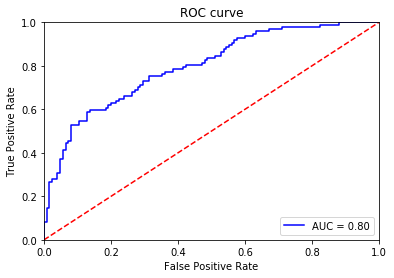

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

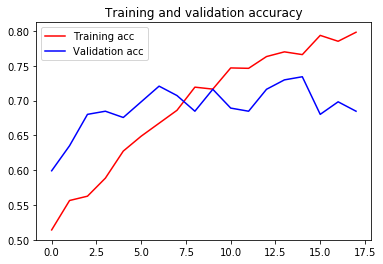

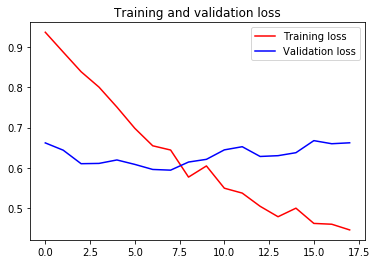

saving model predictions
CNN  stats!
confusionM  [[82 43]
 [27 70]]
acc  0.6846846846846847
recall 0.7216494845360825
auc 0.6888247422680412


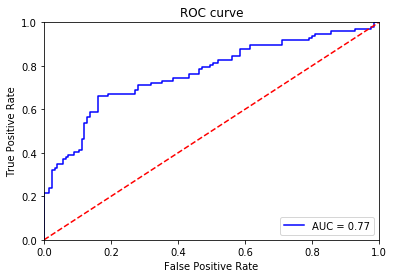

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

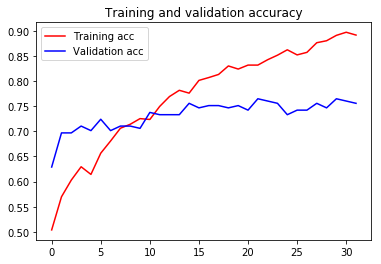

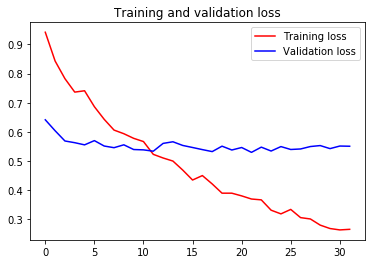

saving model predictions
CNN  stats!
confusionM  [[99 25]
 [29 68]]
acc  0.755656108597285
recall 0.7010309278350515
auc 0.7497090123046225


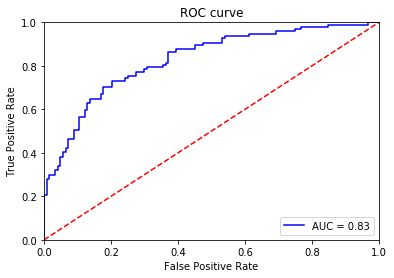

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

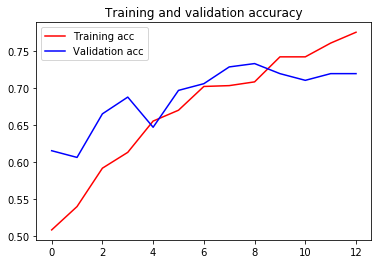

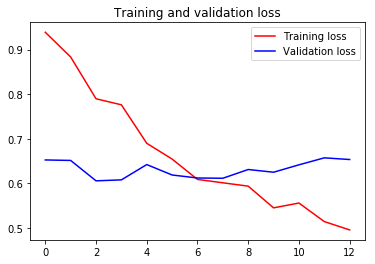

saving model predictions
CNN  stats!
confusionM  [[95 29]
 [33 64]]
acc  0.7194570135746606
recall 0.6597938144329897
auc 0.712961423345527


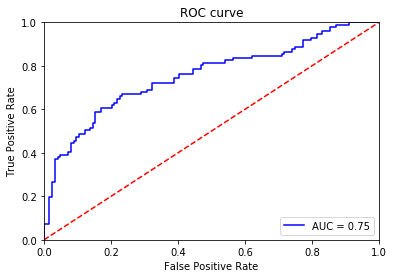

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

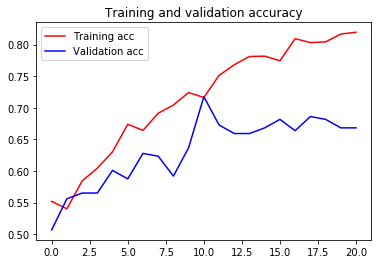

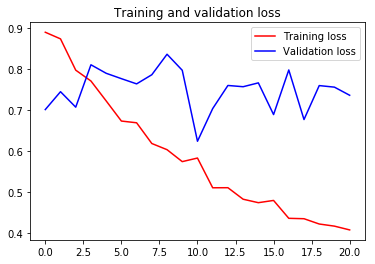

saving model predictions
CNN  stats!
confusionM  [[65 60]
 [14 84]]
acc  0.6681614349775785
recall 0.8571428571428571
auc 0.6885714285714286


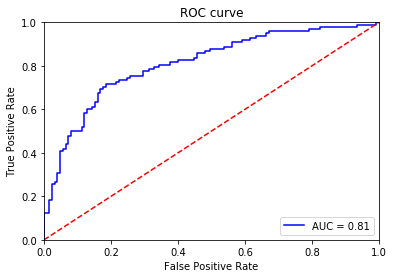

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

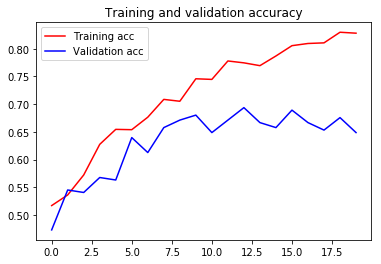

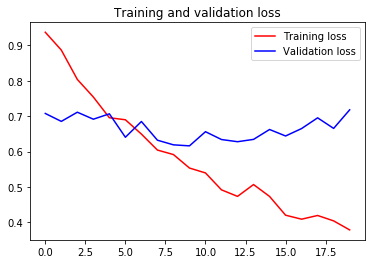

saving model predictions
CNN  stats!
confusionM  [[71 54]
 [24 73]]
acc  0.6486486486486487
recall 0.7525773195876289
auc 0.6602886597938145


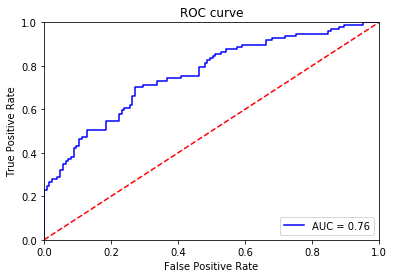

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

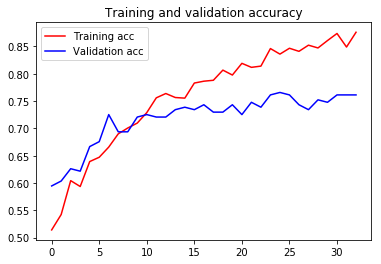

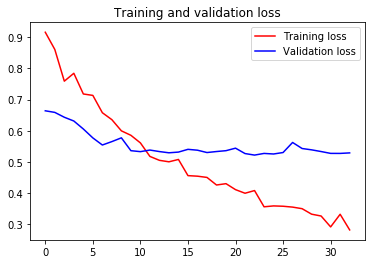

saving model predictions
CNN  stats!
confusionM  [[106  19]
 [ 34  63]]
acc  0.7612612612612613
recall 0.6494845360824743
auc 0.748742268041237


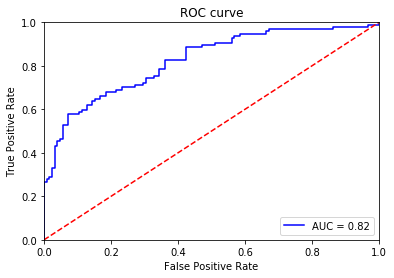

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

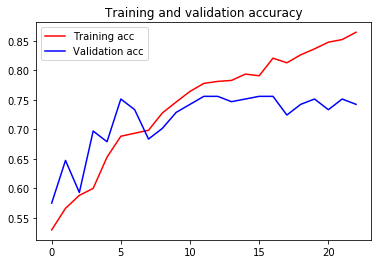

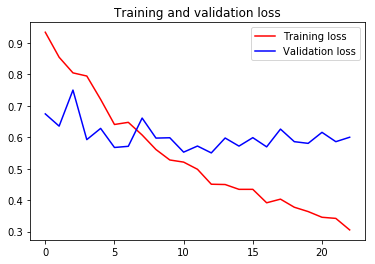

saving model predictions
CNN  stats!
confusionM  [[86 38]
 [19 78]]
acc  0.7420814479638009
recall 0.8041237113402062
auc 0.7488360492184902


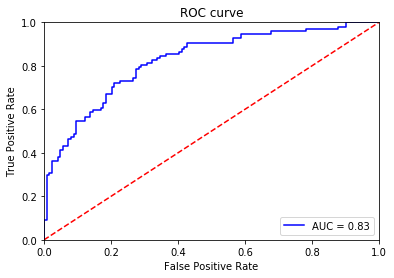

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

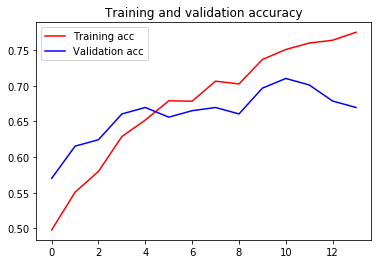

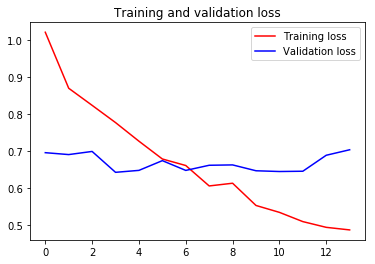

saving model predictions
CNN  stats!
confusionM  [[112  12]
 [ 61  36]]
acc  0.669683257918552
recall 0.3711340206185567
auc 0.6371799135350847


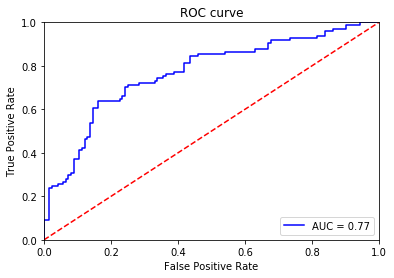

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

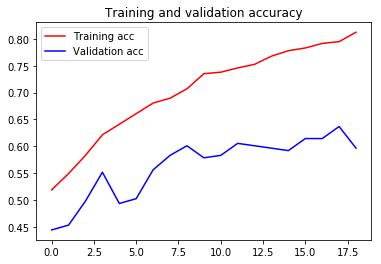

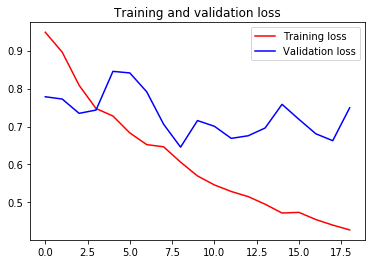

saving model predictions
CNN  stats!
confusionM  [[49 76]
 [14 84]]
acc  0.5964125560538116
recall 0.8571428571428571
auc 0.6245714285714286


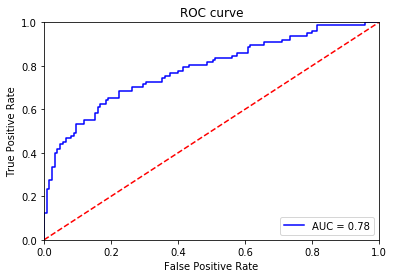

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

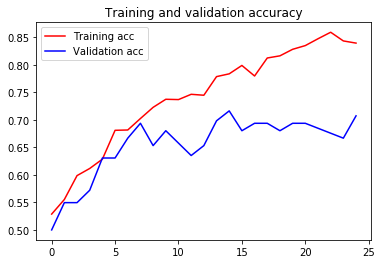

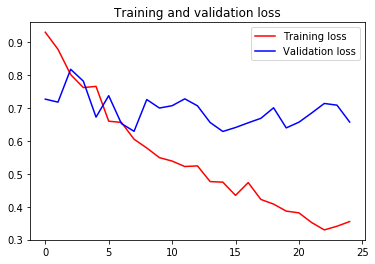

saving model predictions
CNN  stats!
confusionM  [[95 30]
 [35 62]]
acc  0.7072072072072072
recall 0.6391752577319587
auc 0.6995876288659794


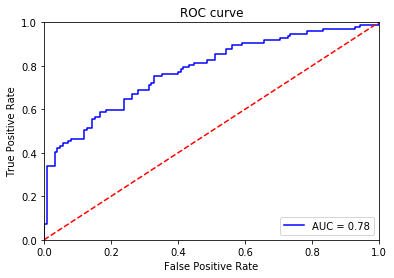

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

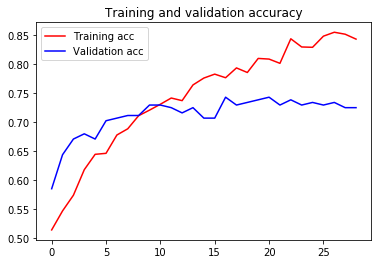

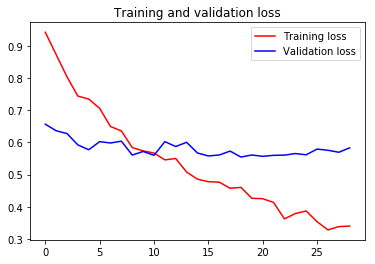

saving model predictions
CNN  stats!
confusionM  [[106  19]
 [ 42  55]]
acc  0.7252252252252253
recall 0.5670103092783505
auc 0.7075051546391753


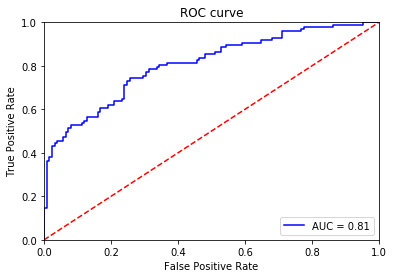

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

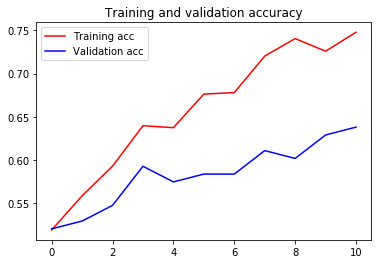

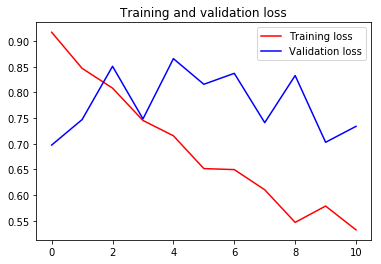

saving model predictions
CNN  stats!
confusionM  [[60 64]
 [16 81]]
acc  0.6380090497737556
recall 0.8350515463917526
auc 0.6594612570668441


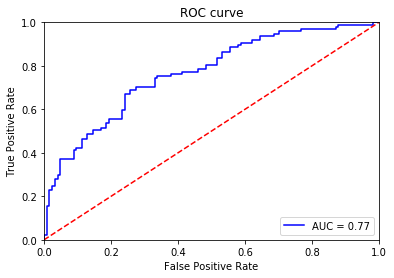

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

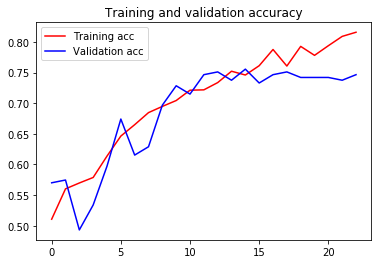

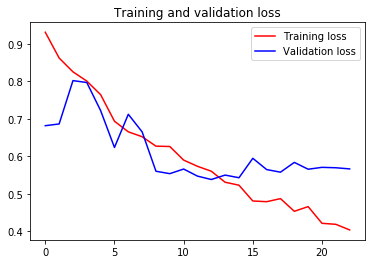

saving model predictions
CNN  stats!
confusionM  [[93 31]
 [25 72]]
acc  0.746606334841629
recall 0.7422680412371134
auc 0.7461340206185567


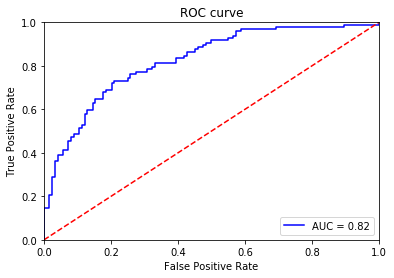

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

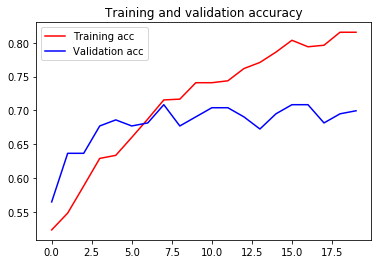

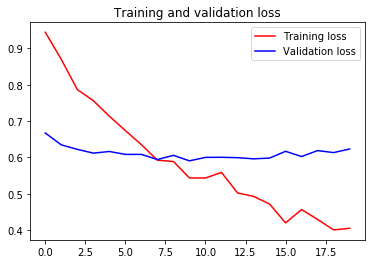

saving model predictions
CNN  stats!
confusionM  [[98 27]
 [40 58]]
acc  0.6995515695067265
recall 0.5918367346938775
auc 0.6879183673469388


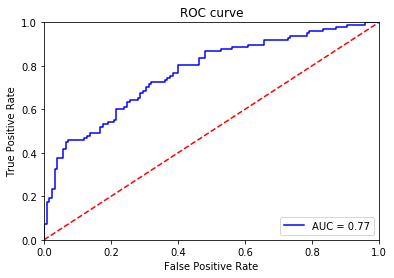

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

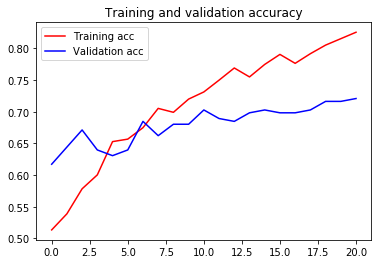

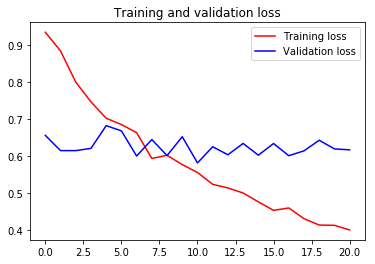

saving model predictions
CNN  stats!
confusionM  [[82 43]
 [19 78]]
acc  0.7207207207207207
recall 0.8041237113402062
auc 0.7300618556701031


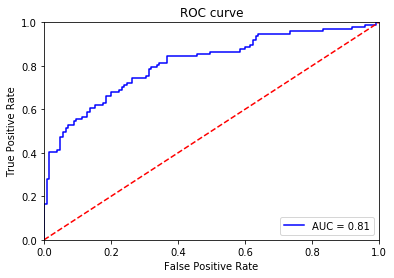

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

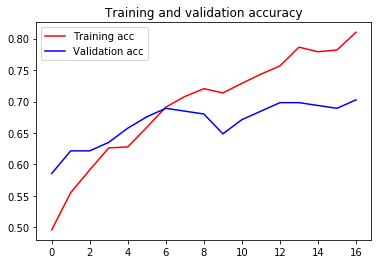

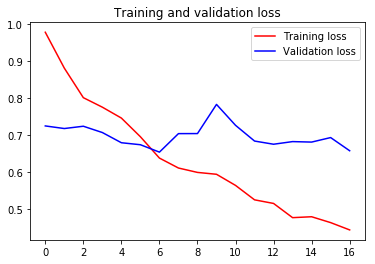

saving model predictions
CNN  stats!
confusionM  [[109  16]
 [ 50  47]]
acc  0.7027027027027027
recall 0.4845360824742268
auc 0.6782680412371134


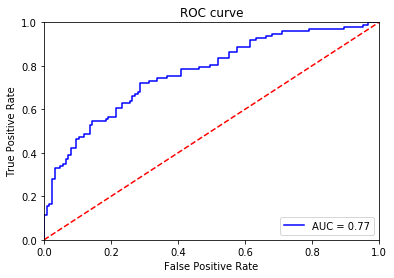

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

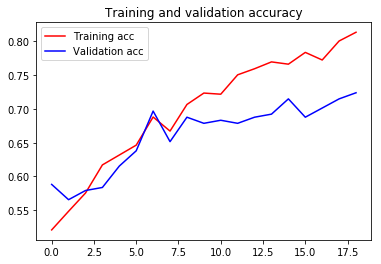

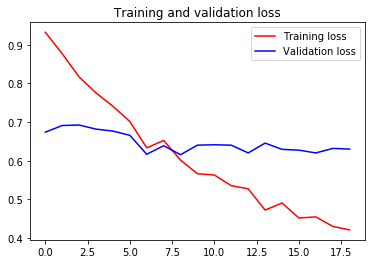

saving model predictions
CNN  stats!
confusionM  [[89 35]
 [26 71]]
acc  0.7239819004524887
recall 0.7319587628865979
auc 0.7248503491852345


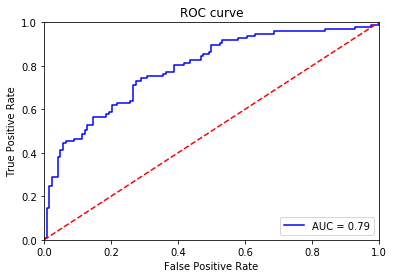

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

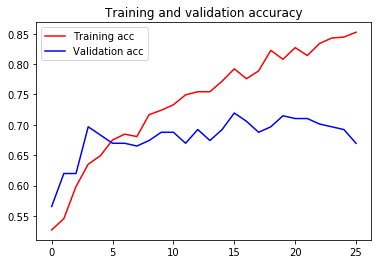

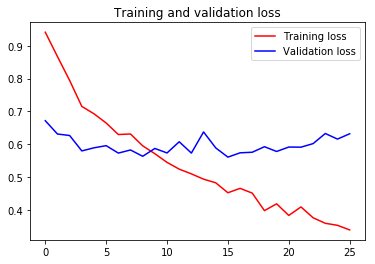

saving model predictions
CNN  stats!
confusionM  [[72 52]
 [21 76]]
acc  0.669683257918552
recall 0.7835051546391752
auc 0.6820751579647488


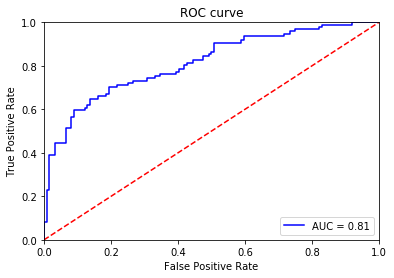

Finished Fold


In [6]:
classifiers = [(SVC(C=2**5,gamma=2*1e-12,random_state=42,probability=True), "SVM"),(RandomForestClassifier(n_estimators=1000,criterion="entropy",random_state=42),"RF"),(KNeighborsClassifier(30), "KNN")]
# classifiers = []
def execute_10_5_folds(z,labels,classifiers,_train_models_Fold_f):
    skfold = RepeatedStratifiedKFold()
    for train_i, val_i in skfold.split(z,labels):
        z_train, y_train = z[train_i], labels[train_i]
        z_val, y_val = z[val_i], labels[val_i]

        print_distribution(y_train,"Train split")
        print_distribution(y_val,"Validation split")
        print()

        p = Process(target=_train_models_Fold_f,args=(z_train,z_val,y_train,y_val, classifiers,))
        p.start()
        p.join()
        print("Finished Fold")
        
execute_10_5_folds(z,labels,classifiers,_train_models_Fold)    

# Testing other training methods.

## Training first block-5 in VGG and the dense layers, and then all the network

In [2]:
from sklearn.model_selection import train_test_split
z,labels = load_dataset(load_gray=False,normalize=True)
X_train,X_test,y_train,y_test = train_test_split(z,labels,random_state=42,test_size=0.15,shuffle=True)

mean:  [[[[59.09468 59.09468 59.09468]]]]  shape:  (1, 1, 1, 3)
std:  [[[[79.38134 79.38134 79.38134]]]]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

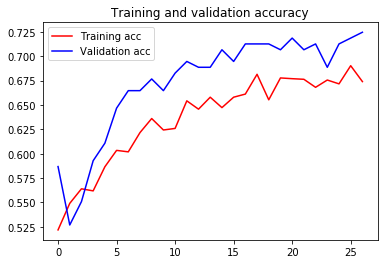

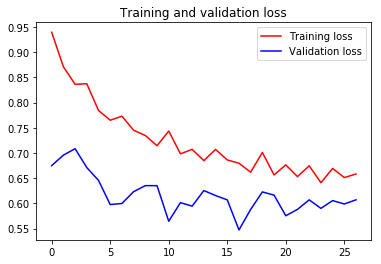

In [3]:
model = build_model(gray_scale_model=False)
model = train_model_with_Keras_ImageDataGenerator(model,x_train=X_train,x_val=X_test,batch_size=10,y_train=y_train,y_val=y_test,epochs=60, data_augmentation=True,)

In [4]:
from tensorflow.keras.optimizers import Adam
for layer in model.layers:
    layer.trainable = True
model.compile(loss='binary_crossentropy',
    optimizer=Adam(lr=1e-5,decay=5*1e-4,amsgrad=True),
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

Normalize:  False
Data Augmentation
Epoch 1/60
314/314 [==============================] - 64s 205ms/step - loss: 0.7469 - acc: 0.6263 - val_loss: 2.7787 - val_acc: 0.4012
Epoch 2/60
314/314 [==============================] - 63s 201ms/step - loss: 0.8280 - acc: 0.5594 - val_loss: 0.5860 - val_acc: 0.7246
Epoch 3/60
314/314 [==============================] - 63s 201ms/step - loss: 0.8131 - acc: 0.5679 - val_loss: 0.8592 - val_acc: 0.5090
Epoch 4/60
314/314 [==============================] - 64s 202ms/step - loss: 0.7439 - acc: 0.6189 - val_loss: 0.5293 - val_acc: 0.7126
Epoch 5/60
314/314 [==============================] - 64s 203ms/step - loss: 0.7410 - acc: 0.6125 - val_loss: 0.6643 - val_acc: 0.6228
Epoch 6/60
314/314 [==============================] - 64s 202ms/step - loss: 0.7587 - acc: 0.6210 - val_loss: 0.5708 - val_acc: 0.7126
Epoch 7/60
314/314 [==============================] - 64s 202ms/step - loss: 0.7189 - acc: 0.6364 - val_loss: 0.6711 - val_acc: 0.6647
Epoch 8/60
314/314 

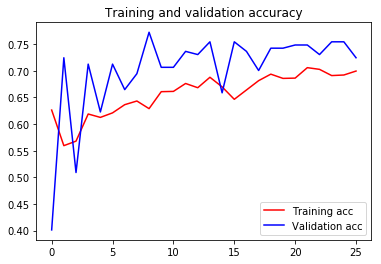

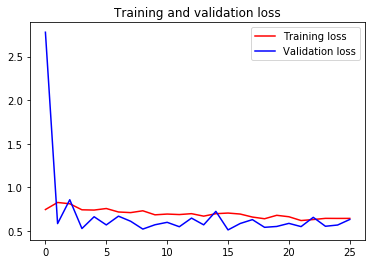

In [8]:
model = train_model_with_Keras_ImageDataGenerator(model,x_train=X_train,x_val=X_test,batch_size=6,y_train=y_train,y_val=y_test,epochs=60, data_augmentation=True,)

[0.97551155 0.37887433 0.07309475 0.64454496 0.4270267  0.04839707
 0.44804    0.01272232 0.07561336 0.34540483 0.7420727  0.61506987
 0.8255961  0.2797434  0.29991248 0.45563784 0.99788874 0.01063827
 0.10121582 0.8438224  0.29413387 0.9858973  0.65985924 0.05288261
 0.07861996 0.4208035  0.9512272  0.84100705 0.9987172  0.23875584
 0.52198446 0.12663475 0.5874391  0.98293936 0.971187   0.25955307
 0.05798761 0.25756055 0.9999541  0.36371064 0.90322256 0.9501888
 0.6122824  0.853056   0.11872746 0.19726637 0.96065307 0.59749
 0.12053146 0.04819321 0.63325775 0.03319213 0.23438916 0.94301194
 0.3252314  0.24696888 0.54154706 0.14834215 0.04146834 0.18235879
 0.16456226 0.98816663 0.2539678  0.25765133 0.71060455 0.0878391
 0.9768291  0.99869114 0.8536616  0.19566813 0.83600694 0.1618691
 0.03962692 0.43540668 0.31659144 0.3251239  0.49177077 0.08235754
 0.9997719  0.18370566 0.9769035  0.81172603 0.10164    0.36737898
 0.9429229  0.6107259  0.25225803 0.36525518 0.03338705 0.36731154
 

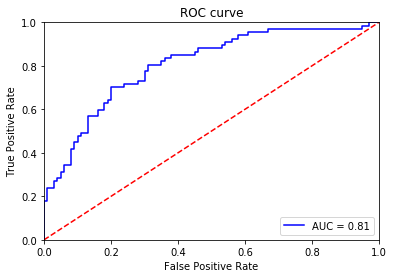

In [45]:
from utils import stats
import numpy as np

batch = 10
y_pred = []

i = 0
j = batch
while True:
    if j == -1:
        y_pred.append(model.predict(np.array(X_test[i:])).ravel())
        break
    y_pred.append(model.predict(np.array(X_test[i:j])).ravel())

    i = j
    j += batch
    if j >= len(X_test):
        j = -1
y_pred = np.array([y for x in y_pred for y in x])
print(y_pred)
stats(np.array(y_test),y_pred,"Model CNN")

# Plotting learning curves

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes
                       )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

Automatically created module for IPython interactive environment


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

batch_size = 3
class MyCNN(BaseEstimator,ClassifierMixin):
    def __init__(self):
        self.model = build_model(gray_scale_model=False)
        
    def predict_proba(self,x_test):
        print("Prediciendo: " +str(len(x_test)))
        i = 0
        j = batch_size
        y_pred = []
        while True:
            if j == -1:
                y_pred.append(self.model.predict(np.array(x_test[i:])).ravel())
                break
            y_pred.append(self.model.predict(np.array(x_test[i:j])).ravel())

            i = j
            j += batch_size
            if j >= len(x_test):
                j = -1
        y_pred = np.array([y for x in y_pred for y in x])
        return y_pred
        
    def predict(self,x_test):
        print("Prediciendo: " +str(len(x_test)))
        i = 0
        j = batch_size
        y_pred = []
        while True:
            if j == -1:
                y_pred.append(self.model.predict(np.array(x_test[i:])).ravel())
                break
            y_pred.append(self.model.predict(np.array(x_test[i:j])).ravel())

            i = j
            j += batch_size
            if j >= len(x_test):
                j = -1
        y_pred = np.array([y for x in y_pred for y in x])

        return np.round(y_pred)
    
    def fit(self,x_train,y_train):
#         se pasa por ahora como x_val el propio x_train, por tanto, no se debe tener en cuenta esos resultados.
        print("Entrenando con: " + str(len(x_train)))
        print(len(y_train[y_train == 1]))
        print(len(y_train[y_train == 0]))
        print("Entrenando solo las capas densas")
        self.model = train_model_with_Keras_ImageDataGenerator(self.model,x_train=x_train,x_val=x_train,batch_size=batch_size,y_train=y_train,y_val=y_train,epochs=60, data_augmentation=True,)
        
#         print("Entrenando todas las capas")
#         for layer in self.model.layers:
#             layer.trainable = True
#         self.model.compile(loss='binary_crossentropy',
#             optimizer=Adam(lr=1e-5,decay=5*1e-4,amsgrad=True),
#             metrics=['accuracy'])
#         self.model = train_model_with_Keras_ImageDataGenerator(self.model,x_train=x_train,x_val=x_train,batch_size=6,y_train=y_train,y_val=y_train,epochs=60, data_augmentation=True,)
        return self.model
        

mean:  [[[[59.09468 59.09468 59.09468]]]]  shape:  (1, 1, 1, 3)
std:  [[[[79.38134 79.38134 79.38134]]]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_____________________________________

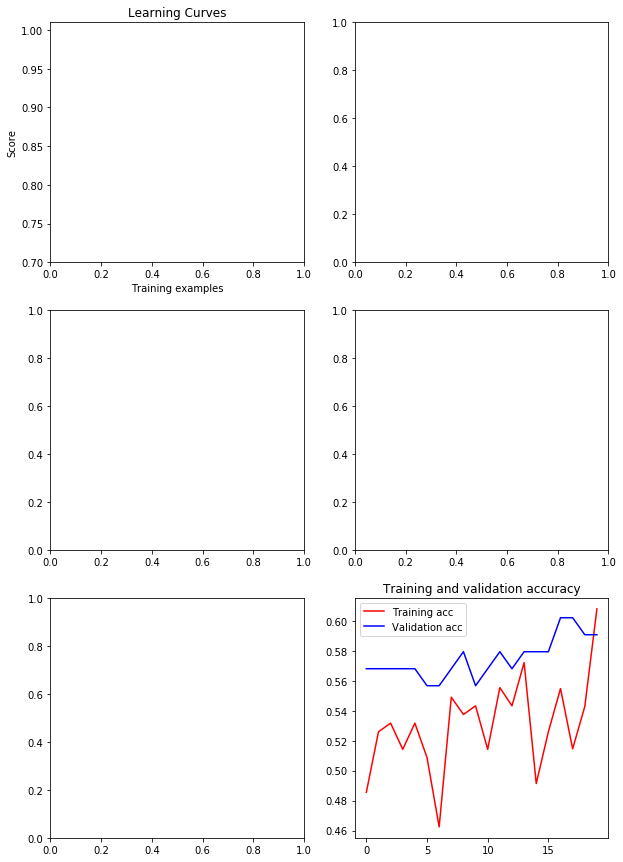

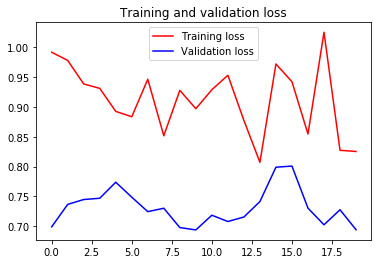

Prediciendo: 222
Prediciendo: 88
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64,

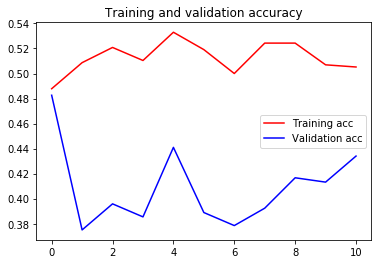

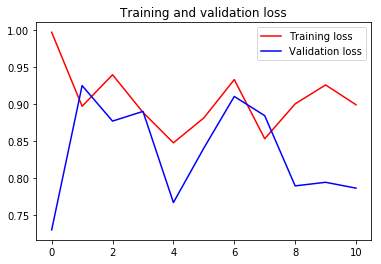

Prediciendo: 222
Prediciendo: 288
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64

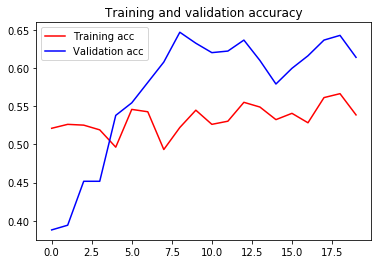

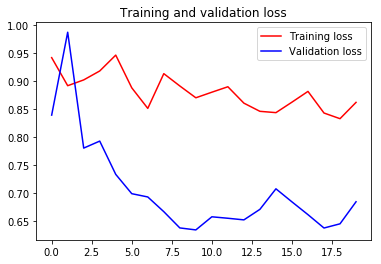

Prediciendo: 222
Prediciendo: 487
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64

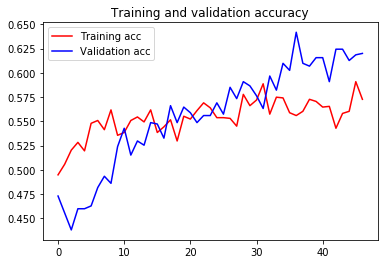

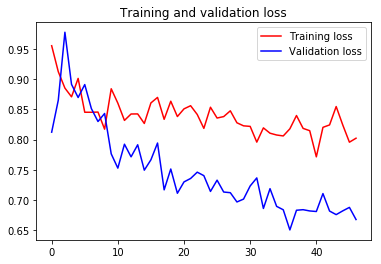

Prediciendo: 222
Prediciendo: 687
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ResourceExhaustedError: OOM when allocating tensor with shape[32768,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_4/Adam/mul_33}} = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_4/Adam/ReadVariableOp_57, training_4/Adam/mul_33/ReadVariableOp)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_5/dense_17_loss/broadcast_weights/assert_broadcastable/AssertGuard/Assert/Switch/_2173}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_857_l...ert/Switch", tensor_type=DT_BOOL, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [4]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_dataset(load_gray=False,normalize=True)

title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MyCNN()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv)


plt.show()

# Adding Fast Fourier Transform to CNN output for training a Random Forest

In [5]:
from utils import rgbt2gray
def _train_models_fft_Fold(z_train,z_val,y_train,y_val, classifiers,history_file_name='./histories/cnn_norm_no_dataAug.pickle'):
    cnn_model = build_model(gray_scale_model=False)
    train_model_with_Keras_ImageDataGenerator(cnn_model,x_train=z_train,x_val=z_val,batch_size=10,y_train=y_train,y_val=y_val,epochs=60, data_augmentation=True)
    
    # Resolve CNN fold result
    y_pred = cnn_model.predict(z_val).ravel()
    stats(y_val,y_pred,model_name='CNN',history_file_name=history_file_name)
    if len(classifiers) == 0:
        return
    
    # Crop Model
    layer_dict = dict([(layer.name,layer) for layer in cnn_model.layers])
#     x = layer_dict['block4_pool'].output
    x = cnn_model.layers[-2].output
    
    from tensorflow.keras.models import Model
    cropped_model = Model(cnn_model.input,x)
    cropped_model_train_output = cropped_model.predict(z_train)
    cropped_model_train_output = np.concatenate((cropped_model_train_output,np.fft.fft2(cropped_model_train_output).real),axis=1)
    
    cropped_model_val_output = cropped_model.predict(z_val)
    cropped_model_val_output = np.concatenate((cropped_model_val_output,np.fft.fft2(cropped_model_val_output).real),axis=1)
    
    del cnn_model
    for sklearn_model,sklearn_model_name in classifiers:
        
        sklearn_model.fit(cropped_model_train_output,y_train)
        sklearn_model_predicted = sklearn_model.predict_proba(cropped_model_val_output)[:,1]
        print("SKlearn predicted proba: ", sklearn_model_predicted)
        model_name = 'CNN + '+sklearn_model_name
        print("Validation sklearn Model result: ")
        stats(y_val,sklearn_model_predicted,model_name, history_file_name='./histories/fft_'+model_name.replace(' ','_')+'.pickle')
    

Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
____________________

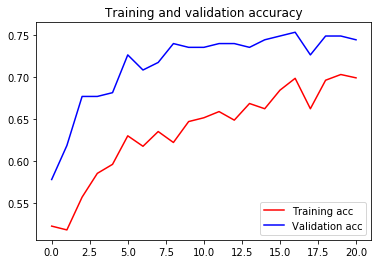

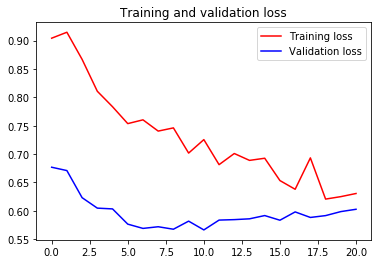

saving model predictions
CNN  stats!
confusionM  [[108  17]
 [ 40  58]]
acc  0.7443946188340808
recall 0.5918367346938775
auc 0.7279183673469387


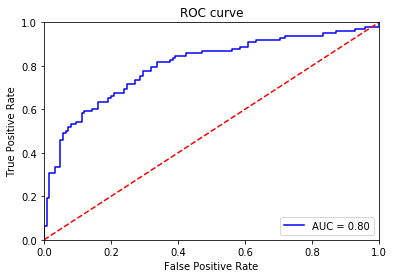

SKlearn predicted proba:  [0.313 0.265 0.235 0.485 0.413 0.17  0.421 0.236 0.2   0.385 0.345 0.593
 0.433 0.402 0.419 0.851 0.064 0.083 0.227 0.457 0.515 0.075 0.3   0.082
 0.062 0.329 0.149 0.474 0.555 0.182 0.174 0.72  0.117 0.62  0.259 0.334
 0.129 0.501 0.443 0.168 0.472 0.222 0.155 0.084 0.56  0.664 0.255 0.125
 0.147 0.088 0.26  0.937 0.122 0.248 0.352 0.888 0.457 0.203 0.113 0.187
 0.347 0.083 0.23  0.487 0.163 0.612 0.271 0.449 0.362 0.241 0.147 0.118
 0.201 0.112 0.111 0.308 0.061 0.219 0.078 0.252 0.21  0.106 0.064 0.073
 0.86  0.182 0.351 0.115 0.157 0.306 0.496 0.042 0.483 0.14  0.107 0.968
 0.067 0.457 0.16  0.399 0.752 0.333 0.171 0.286 0.152 0.338 0.11  0.096
 0.546 0.67  0.293 0.19  0.831 0.584 0.157 0.161 0.535 0.434 0.48  0.231
 0.073 0.088 0.177 0.135 0.068 0.831 0.967 0.981 0.968 0.615 0.084 0.865
 0.804 0.153 0.679 0.158 0.492 0.737 0.572 0.882 0.169 0.975 0.719 0.344
 0.681 0.443 0.887 0.432 0.381 0.876 0.132 0.391 0.479 0.76  0.981 0.963
 0.865 0.083 0.808 0.689 

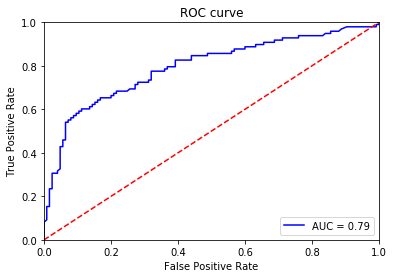

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

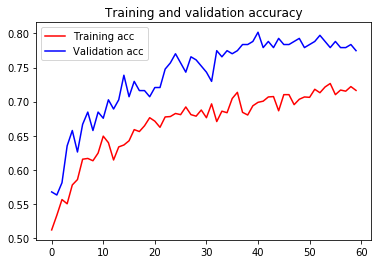

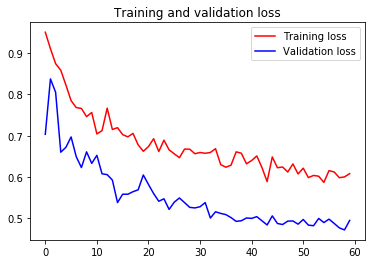

saving model predictions
CNN  stats!
confusionM  [[116   9]
 [ 41  56]]
acc  0.7747747747747747
recall 0.5773195876288659
auc 0.752659793814433


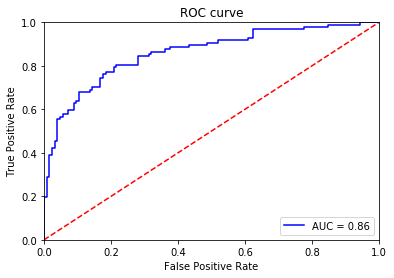

SKlearn predicted proba:  [0.47  0.19  0.299 0.121 0.088 0.213 0.046 0.038 0.11  0.648 0.041 0.057
 0.174 0.36  0.313 0.514 0.049 0.122 0.371 0.149 0.526 0.349 0.058 0.899
 0.038 0.383 0.079 0.14  0.483 0.169 0.161 0.866 0.494 0.189 0.246 0.217
 0.116 0.219 0.176 0.293 0.31  0.111 0.051 0.439 0.376 0.332 0.543 0.385
 0.163 0.074 0.236 0.352 0.178 0.13  0.268 0.375 0.59  0.252 0.285 0.216
 0.324 0.083 0.478 0.558 0.138 0.134 0.29  0.195 0.084 0.319 0.304 0.048
 0.059 0.168 0.032 0.271 0.231 0.416 0.372 0.14  0.162 0.109 0.105 0.13
 0.718 0.152 0.646 0.291 0.748 0.221 0.534 0.29  0.733 0.814 0.266 0.218
 0.144 0.153 0.071 0.165 0.103 0.501 0.205 0.191 0.394 0.056 0.365 0.475
 0.677 0.083 0.101 0.448 0.048 0.055 0.515 0.151 0.353 0.026 0.532 0.047
 0.305 0.316 0.217 0.059 0.168 0.38  0.831 0.987 0.936 0.132 0.978 0.913
 0.778 0.877 0.44  0.56  0.661 0.315 0.431 0.078 0.878 0.103 0.372 0.928
 0.985 0.17  0.225 0.583 0.465 0.474 0.806 0.84  0.722 0.678 0.961 0.597
 0.521 0.97  0.824 0.739 0

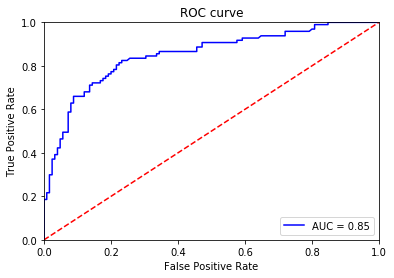

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

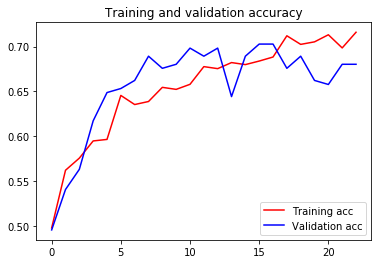

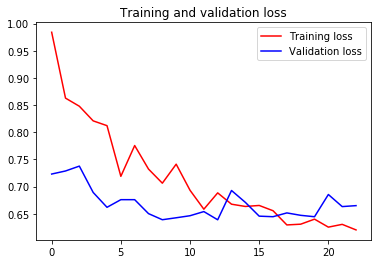

saving model predictions
CNN  stats!
confusionM  [[84 41]
 [30 67]]
acc  0.6801801801801802
recall 0.6907216494845361
auc 0.681360824742268


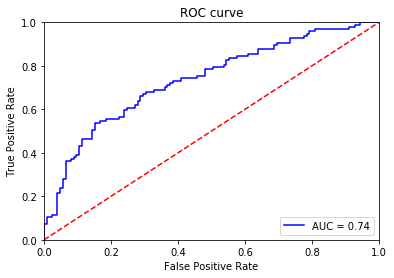

SKlearn predicted proba:  [0.511 0.384 0.106 0.184 0.3   0.233 0.035 0.142 0.342 0.108 0.339 0.085
 0.334 0.024 0.028 0.302 0.58  0.531 0.382 0.147 0.081 0.071 0.357 0.46
 0.719 0.951 0.873 0.049 0.384 0.117 0.242 0.259 0.45  0.288 0.246 0.1
 0.385 0.51  0.733 0.118 0.273 0.166 0.406 0.257 0.346 0.949 0.327 0.11
 0.41  0.27  0.233 0.317 0.372 0.307 0.142 0.072 0.63  0.112 0.872 0.053
 0.026 0.061 0.47  0.048 0.088 0.139 0.276 0.303 0.424 0.254 0.303 0.207
 0.266 0.061 0.505 0.124 0.439 0.095 0.208 0.103 0.276 0.682 0.384 0.495
 0.266 0.658 0.163 0.146 0.74  0.534 0.526 0.033 0.482 0.126 0.959 0.244
 0.423 0.273 0.147 0.153 0.449 0.03  0.091 0.211 0.344 0.559 0.277 0.091
 0.055 0.497 0.079 0.306 0.138 0.112 0.145 0.23  0.315 0.139 0.156 0.174
 0.54  0.612 0.134 0.835 0.258 0.705 0.464 0.114 0.78  0.082 0.473 0.302
 0.324 0.149 0.263 0.972 0.621 0.45  0.895 0.279 0.816 0.868 0.223 0.994
 0.489 0.715 0.695 0.667 0.471 0.174 0.902 0.437 0.237 0.957 0.165 0.3
 0.674 0.063 0.595 0.126 0.437 

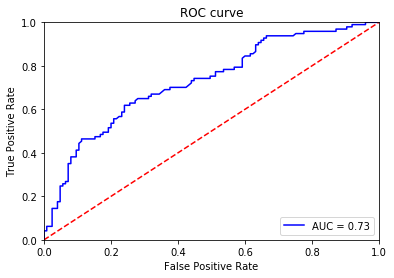

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

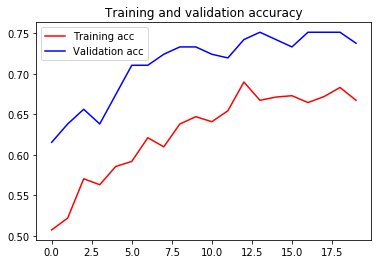

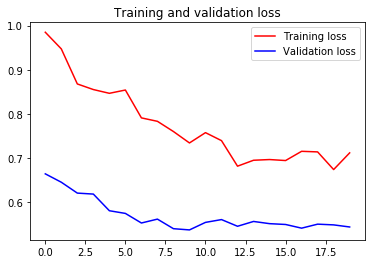

saving model predictions
CNN  stats!
confusionM  [[95 29]
 [29 68]]
acc  0.7375565610859729
recall 0.7010309278350515
auc 0.733579980046558


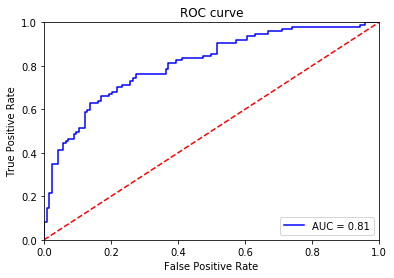

SKlearn predicted proba:  [0.616 0.148 0.123 0.24  0.38  0.158 0.362 0.804 0.059 0.284 0.119 0.216
 0.229 0.361 0.3   0.264 0.167 0.438 0.175 0.211 0.082 0.323 0.595 0.64
 0.084 0.209 0.292 0.169 0.238 0.183 0.454 0.728 0.086 0.741 0.312 0.083
 0.328 0.206 0.283 0.131 0.362 0.455 0.312 0.145 0.111 0.153 0.128 0.249
 0.114 0.049 0.487 0.568 0.303 0.322 0.17  0.168 0.084 0.315 0.308 0.067
 0.24  0.564 0.956 0.154 0.087 0.252 0.104 0.724 0.405 0.135 0.149 0.493
 0.326 0.316 0.071 0.286 0.389 0.858 0.183 0.276 0.093 0.29  0.303 0.249
 0.244 0.201 0.28  0.162 0.294 0.292 0.738 0.242 0.301 0.229 0.106 0.296
 0.43  0.291 0.159 0.172 0.161 0.462 0.288 0.179 0.301 0.11  0.067 0.094
 0.47  0.279 0.766 0.149 0.441 0.343 0.327 0.2   0.543 0.165 0.276 0.096
 0.114 0.079 0.121 0.509 0.345 0.551 0.986 0.251 0.594 0.951 0.263 0.725
 0.292 0.768 0.4   0.232 0.29  0.217 0.584 0.677 0.155 0.861 0.227 0.947
 0.616 0.562 0.196 0.336 0.897 0.571 0.701 0.86  0.339 0.709 0.89  0.777
 0.414 0.185 0.967 0.209 0

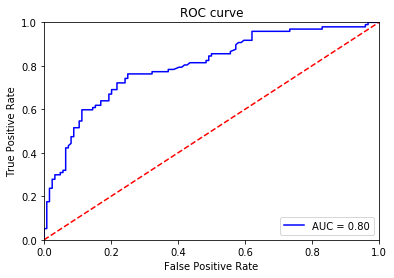

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

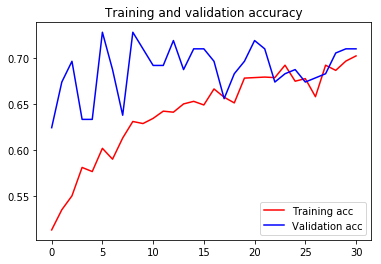

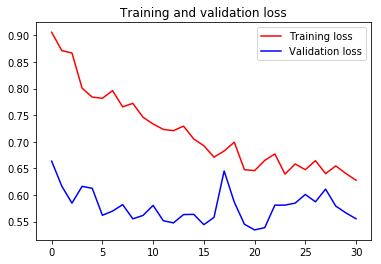

saving model predictions
CNN  stats!
confusionM  [[80 44]
 [20 77]]
acc  0.7104072398190046
recall 0.7938144329896907
auc 0.7194878616561355


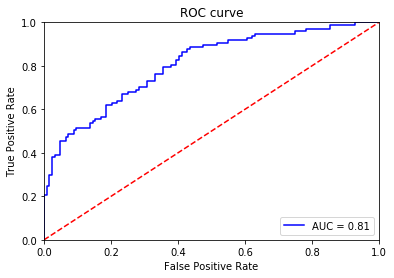

SKlearn predicted proba:  [0.387 0.182 0.429 0.168 0.171 0.269 0.153 0.27  0.14  0.139 0.086 0.639
 0.121 0.253 0.06  0.086 0.162 0.386 0.023 0.207 0.247 0.338 0.229 0.092
 0.155 0.791 0.465 0.099 0.474 0.219 0.347 0.202 0.203 0.765 0.103 0.472
 0.423 0.131 0.177 0.447 0.493 0.479 0.305 0.35  0.23  0.49  0.606 0.422
 0.094 0.275 0.591 0.14  0.103 0.384 0.128 0.755 0.177 0.158 0.381 0.149
 0.268 0.34  0.52  0.21  0.585 0.243 0.245 0.139 0.13  0.72  0.087 0.313
 0.3   0.122 0.164 0.232 0.163 0.285 0.739 0.505 0.096 0.344 0.283 0.412
 0.094 0.084 0.059 0.593 0.483 0.507 0.341 0.356 0.373 0.404 0.497 0.594
 0.378 0.261 0.068 0.429 0.222 0.564 0.576 0.047 0.295 0.199 0.158 0.056
 0.199 0.493 0.4   0.626 0.458 0.21  0.375 0.139 0.884 0.271 0.403 0.291
 0.646 0.367 0.203 0.295 0.9   0.333 0.477 0.417 0.63  0.508 0.493 0.965
 0.899 0.698 0.352 0.352 0.886 0.445 0.344 0.159 0.91  0.381 0.59  0.409
 0.259 0.347 0.985 0.94  0.746 0.561 0.834 0.866 0.405 0.206 0.827 0.975
 0.398 0.317 0.781 0.725 

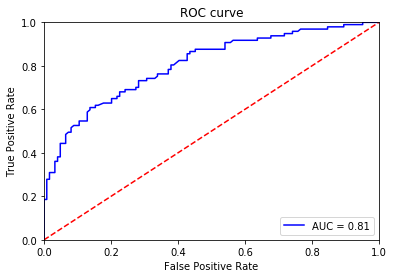

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

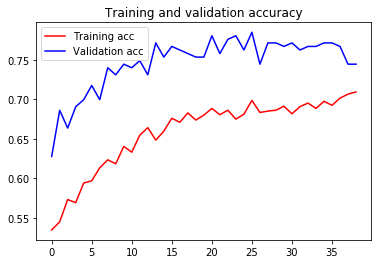

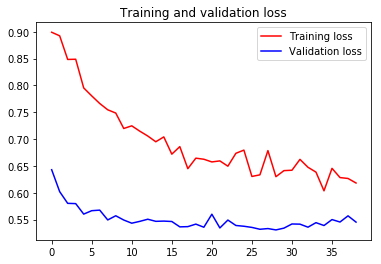

saving model predictions
CNN  stats!
confusionM  [[92 33]
 [24 74]]
acc  0.7443946188340808
recall 0.7551020408163265
auc 0.7455510204081632


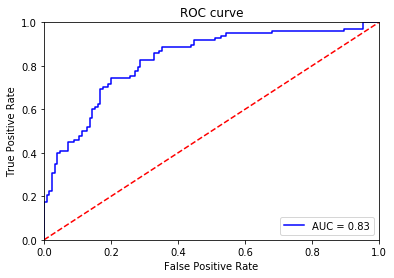

SKlearn predicted proba:  [0.366 0.091 0.119 0.171 0.314 0.406 0.922 0.076 0.475 0.731 0.061 0.132
 0.208 0.368 0.112 0.799 0.289 0.056 0.067 0.181 0.201 0.516 0.135 0.807
 0.705 0.19  0.266 0.067 0.401 0.318 0.126 0.116 0.413 0.717 0.404 0.096
 0.357 0.717 0.273 0.129 0.779 0.627 0.287 0.452 0.236 0.197 0.104 0.483
 0.355 0.112 0.292 0.215 0.631 0.155 0.249 0.159 0.125 0.147 0.145 0.779
 0.168 0.124 0.194 0.822 0.048 0.044 0.718 0.157 0.754 0.138 0.068 0.441
 0.293 0.159 0.213 0.197 0.795 0.4   0.307 0.104 0.143 0.138 0.198 0.189
 0.085 0.357 0.572 0.311 0.224 0.184 0.11  0.738 0.523 0.528 0.151 0.105
 0.175 0.03  0.07  0.637 0.071 0.104 0.155 0.272 0.714 0.147 0.05  0.179
 0.74  0.282 0.251 0.272 0.374 0.114 0.103 0.345 0.38  0.186 0.265 0.181
 0.097 0.511 0.119 0.18  0.09  0.926 0.61  0.757 0.783 0.634 0.78  0.946
 0.752 0.77  0.849 0.848 0.837 0.098 0.773 0.85  0.295 0.207 0.585 0.884
 0.41  0.37  0.654 0.632 0.492 0.78  0.155 0.564 0.831 0.352 0.939 0.986
 0.99  0.276 0.95  0.747 

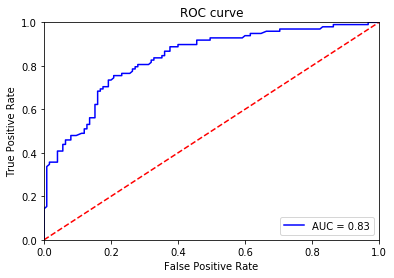

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

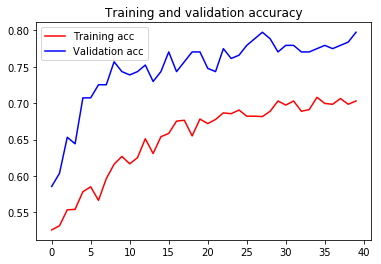

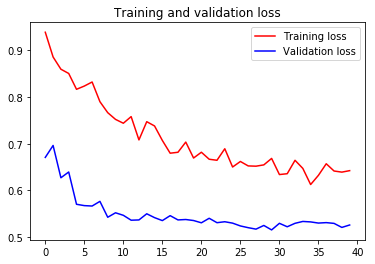

saving model predictions
CNN  stats!
confusionM  [[113  12]
 [ 33  64]]
acc  0.7972972972972973
recall 0.6597938144329897
auc 0.7818969072164949


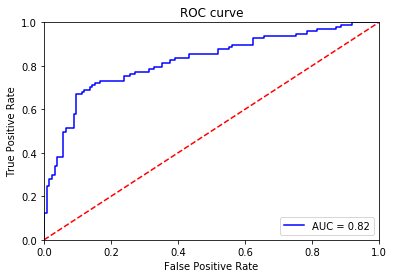

SKlearn predicted proba:  [0.263 0.186 0.196 0.569 0.427 0.178 0.325 0.41  0.031 0.361 0.502 0.224
 0.035 0.252 0.46  0.379 0.58  0.196 0.22  0.514 0.075 0.213 0.061 0.043
 0.148 0.237 0.376 0.502 0.783 0.485 0.396 0.255 0.117 0.128 0.201 0.84
 0.348 0.427 0.043 0.186 0.177 0.315 0.272 0.038 0.153 0.301 0.093 0.263
 0.08  0.337 0.088 0.175 0.253 0.07  0.236 0.227 0.941 0.276 0.072 0.495
 0.04  0.213 0.083 0.288 0.167 0.69  0.34  0.13  0.049 0.063 0.134 0.264
 0.03  0.151 0.5   0.608 0.128 0.477 0.323 0.32  0.47  0.28  0.235 0.087
 0.136 0.144 0.881 0.617 0.243 0.615 0.553 0.246 0.531 0.839 0.094 0.045
 0.583 0.306 0.236 0.214 0.084 0.126 0.371 0.548 0.792 0.339 0.409 0.303
 0.678 0.493 0.19  0.407 0.205 0.085 0.28  0.098 0.062 0.15  0.538 0.124
 0.259 0.102 0.083 0.067 0.14  0.257 0.618 0.259 0.859 0.558 0.335 0.256
 0.226 0.382 0.975 0.085 0.887 0.934 0.064 0.439 0.384 0.205 0.684 0.716
 0.22  0.81  0.612 0.497 0.389 0.168 0.95  0.946 0.63  0.848 0.96  0.929
 0.752 0.824 0.517 0.671 0

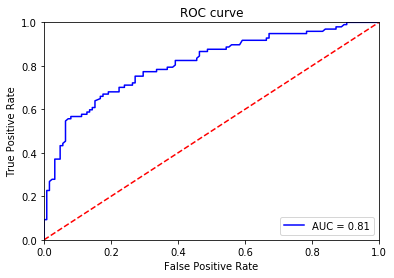

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

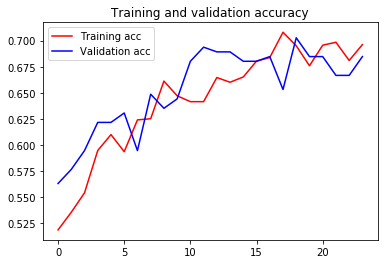

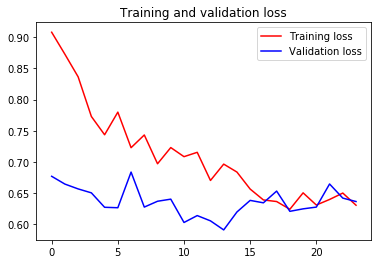

saving model predictions
CNN  stats!
confusionM  [[81 44]
 [26 71]]
acc  0.6846846846846847
recall 0.7319587628865979
auc 0.689979381443299


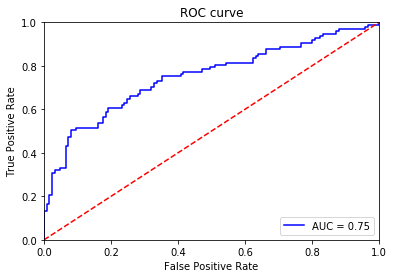

SKlearn predicted proba:  [0.615 0.32  0.292 0.555 0.29  0.112 0.269 0.243 0.164 0.238 0.231 0.109
 0.183 0.104 0.192 0.044 0.357 0.061 0.173 0.091 0.046 0.092 0.172 0.468
 0.378 0.931 0.165 0.34  0.065 0.172 0.115 0.226 0.532 0.146 0.465 0.642
 0.219 0.303 0.343 0.249 0.276 0.513 0.18  0.075 0.132 0.078 0.189 0.122
 0.188 0.423 0.089 0.16  0.114 0.23  0.387 0.517 0.867 0.222 0.281 0.135
 0.111 0.113 0.362 0.234 0.116 0.458 0.22  0.122 0.334 0.172 0.11  0.214
 0.457 0.251 0.152 0.168 0.136 0.21  0.445 0.202 0.295 0.283 0.286 0.062
 0.251 0.113 0.047 0.174 0.473 0.129 0.477 0.546 0.297 0.151 0.065 0.562
 0.33  0.436 0.413 0.175 0.13  0.23  0.313 0.647 0.393 0.497 0.304 0.744
 0.214 0.348 0.066 0.495 0.254 0.237 0.306 0.291 0.115 0.171 0.513 0.129
 0.779 0.173 0.445 0.68  0.068 0.815 0.315 0.982 0.962 0.532 0.346 0.105
 0.727 0.742 0.091 0.388 0.286 0.628 0.24  0.981 0.547 0.938 0.251 0.132
 0.652 0.649 0.637 0.514 0.142 0.111 0.334 0.282 0.948 0.259 0.221 0.882
 0.112 0.519 0.434 0.355 

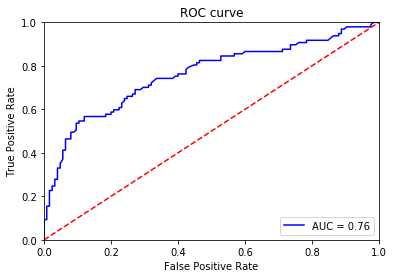

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

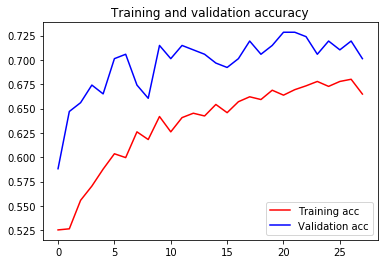

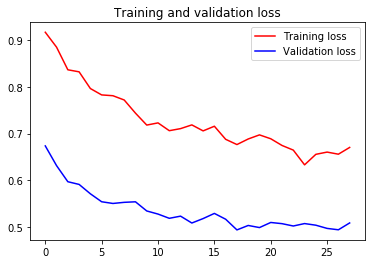

saving model predictions
CNN  stats!
confusionM  [[89 35]
 [31 66]]
acc  0.7013574660633484
recall 0.6804123711340206
auc 0.6990771533089458


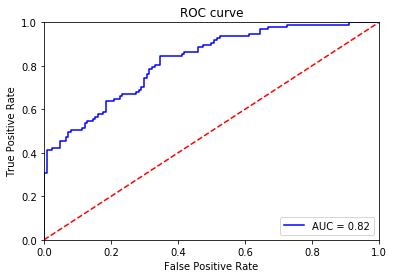

SKlearn predicted proba:  [0.48  0.131 0.605 0.315 0.264 0.315 0.472 0.131 0.53  0.101 0.13  0.098
 0.629 0.445 0.266 0.595 0.119 0.697 0.299 0.092 0.146 0.388 0.18  0.182
 0.232 0.469 0.209 0.123 0.252 0.647 0.259 0.528 0.059 0.362 0.298 0.394
 0.318 0.174 0.651 0.507 0.533 0.082 0.075 0.396 0.466 0.129 0.505 0.195
 0.768 0.146 0.274 0.32  0.367 0.792 0.435 0.689 0.374 0.25  0.252 0.506
 0.172 0.75  0.118 0.113 0.146 0.054 0.363 0.17  0.104 0.25  0.201 0.175
 0.12  0.16  0.441 0.082 0.302 0.112 0.641 0.579 0.341 0.445 0.682 0.272
 0.152 0.158 0.357 0.096 0.172 0.538 0.381 0.195 0.495 0.312 0.612 0.529
 0.204 0.255 0.398 0.093 0.116 0.432 0.076 0.374 0.091 0.102 0.726 0.65
 0.172 0.082 0.403 0.182 0.133 0.096 0.277 0.335 0.159 0.163 0.128 0.122
 0.109 0.403 0.106 0.542 0.953 0.974 0.41  0.106 0.967 0.948 0.782 0.49
 0.278 0.425 0.457 0.814 0.401 0.556 0.723 0.976 0.734 0.918 0.75  0.412
 0.609 0.79  0.873 0.216 0.293 0.833 0.86  0.227 0.499 0.608 0.291 0.975
 0.639 0.146 0.392 0.455 0.

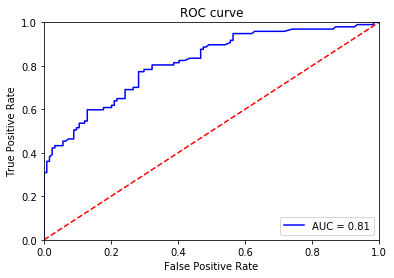

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

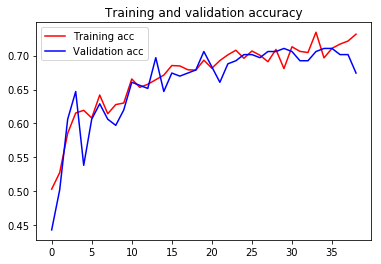

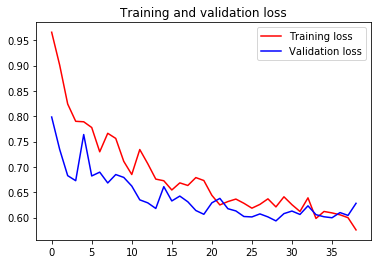

saving model predictions
CNN  stats!
confusionM  [[77 47]
 [25 72]]
acc  0.6742081447963801
recall 0.7422680412371134
auc 0.6816178915862987


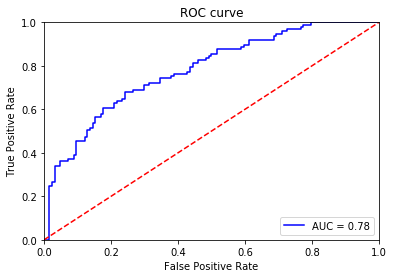

SKlearn predicted proba:  [0.409 0.202 0.16  0.274 0.229 0.097 0.138 0.101 0.257 0.024 0.167 0.104
 0.143 0.219 0.289 0.108 0.563 0.279 0.133 0.051 0.814 0.112 0.123 0.046
 0.428 0.1   0.288 0.272 0.571 0.053 0.045 0.587 0.083 0.868 0.693 0.061
 0.107 0.108 0.427 0.401 0.449 0.418 0.072 0.301 0.333 0.394 0.162 0.438
 0.153 0.08  0.195 0.066 0.121 0.672 0.242 0.356 0.956 0.464 0.465 0.317
 0.349 0.381 0.1   0.161 0.356 0.368 0.5   0.198 0.129 0.239 0.092 0.095
 0.283 0.313 0.218 0.082 0.583 0.216 0.17  0.704 0.247 0.038 0.186 0.231
 0.548 0.137 0.136 0.388 0.693 0.165 0.485 0.17  0.673 0.568 0.044 0.987
 0.277 0.186 0.734 0.36  0.205 0.132 0.329 0.288 0.598 0.403 0.228 0.054
 0.136 0.385 0.156 0.043 0.153 0.305 0.518 0.739 0.368 0.128 0.577 0.589
 0.501 0.314 0.622 0.038 0.765 0.551 0.362 0.785 0.874 0.187 0.343 0.973
 0.361 0.878 0.498 0.703 0.318 0.818 0.54  0.676 0.912 0.972 0.659 0.439
 0.101 0.564 0.938 0.368 0.403 0.82  0.428 0.888 0.571 0.8   0.33  0.151
 0.112 0.24  0.762 0.662 

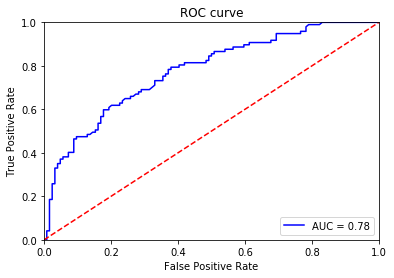

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

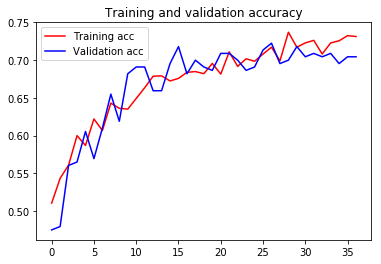

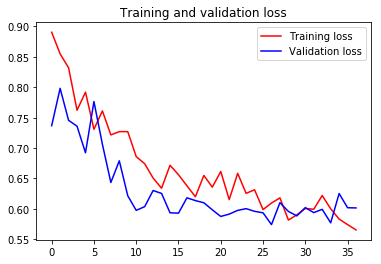

saving model predictions
CNN  stats!
confusionM  [[80 45]
 [21 77]]
acc  0.7040358744394619
recall 0.7857142857142857
auc 0.7128571428571429


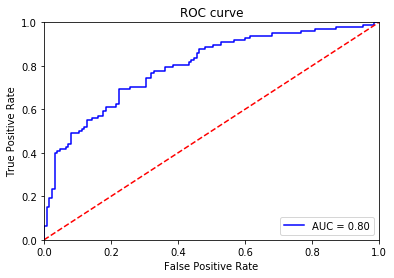

SKlearn predicted proba:  [0.38  0.458 0.107 0.396 0.349 0.292 0.262 0.131 0.28  0.209 0.216 0.664
 0.427 0.279 0.206 0.295 0.542 0.057 0.189 0.488 0.318 0.137 0.354 0.06
 0.096 0.045 0.576 0.313 0.173 0.105 0.596 0.136 0.826 0.436 0.171 0.185
 0.105 0.765 0.333 0.178 0.258 0.511 0.24  0.168 0.289 0.191 0.148 0.159
 0.163 0.071 0.045 0.472 0.458 0.121 0.42  0.954 0.022 0.036 0.367 0.201
 0.53  0.284 0.176 0.096 0.139 0.066 0.061 0.105 0.108 0.08  0.641 0.104
 0.873 0.05  0.414 0.062 0.145 0.3   0.567 0.043 0.178 0.197 0.225 0.055
 0.391 0.229 0.266 0.085 0.514 0.1   0.501 0.363 0.124 0.11  0.299 0.924
 0.736 0.382 0.586 0.106 0.381 0.2   0.167 0.093 0.093 0.213 0.184 0.347
 0.398 0.096 0.033 0.443 0.083 0.382 0.61  0.221 0.069 0.113 0.086 0.593
 0.739 0.219 0.154 0.077 0.051 0.477 0.934 0.987 0.118 0.269 0.988 0.942
 0.977 0.59  0.202 0.134 0.915 0.586 0.37  0.791 0.567 0.185 0.803 0.705
 0.655 0.804 0.932 0.458 0.965 0.349 0.261 0.189 0.466 0.375 0.162 0.953
 0.559 0.523 0.407 0.426 0

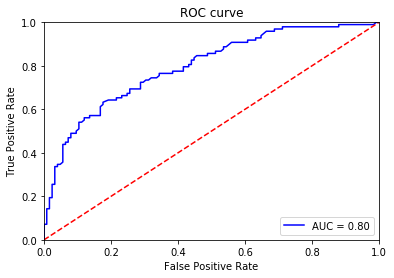

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

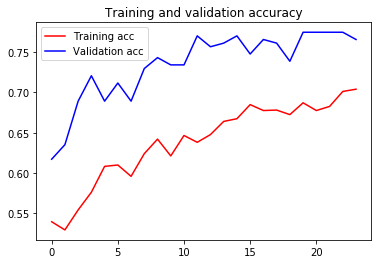

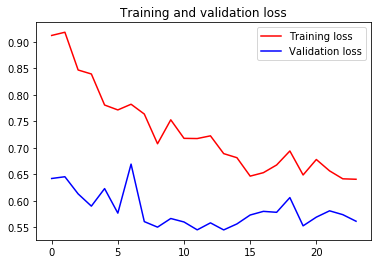

saving model predictions
CNN  stats!
confusionM  [[96 29]
 [23 74]]
acc  0.7657657657657657
recall 0.7628865979381443
auc 0.7654432989690722


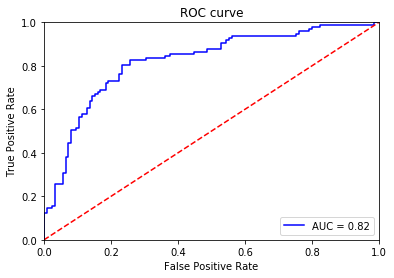

SKlearn predicted proba:  [0.42  0.172 0.732 0.405 0.15  0.226 0.127 0.52  0.239 0.324 0.166 0.262
 0.533 0.357 0.195 0.05  0.195 0.401 0.218 0.687 0.215 0.158 0.086 0.156
 0.124 0.452 0.089 0.148 0.277 0.501 0.904 0.076 0.128 0.123 0.485 0.371
 0.116 0.67  0.37  0.314 0.685 0.413 0.162 0.36  0.101 0.325 0.126 0.204
 0.069 0.631 0.561 0.438 0.176 0.184 0.543 0.376 0.141 0.228 0.816 0.207
 0.133 0.167 0.446 0.276 0.209 0.919 0.185 0.084 0.213 0.079 0.099 0.199
 0.38  0.385 0.342 0.072 0.713 0.139 0.195 0.148 0.078 0.207 0.44  0.327
 0.087 0.332 0.209 0.467 0.084 0.183 0.261 0.225 0.127 0.845 0.23  0.442
 0.126 0.267 0.19  0.674 0.391 0.339 0.246 0.094 0.964 0.32  0.054 0.172
 0.776 0.049 0.168 0.37  0.222 0.343 0.082 0.186 0.268 0.49  0.601 0.804
 0.532 0.923 0.399 0.134 0.107 0.784 0.696 0.138 0.813 0.371 0.639 0.98
 0.84  0.936 0.614 0.493 0.856 0.65  0.365 0.908 0.179 0.844 0.983 0.695
 0.522 0.968 0.972 0.817 0.122 0.421 0.778 0.504 0.86  0.45  0.807 0.786
 0.642 0.962 0.814 0.568 0

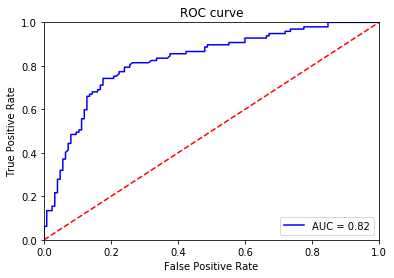

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

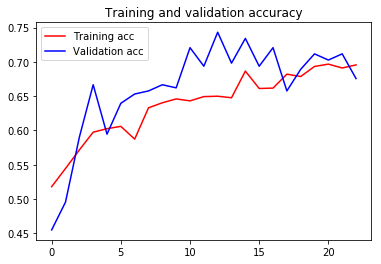

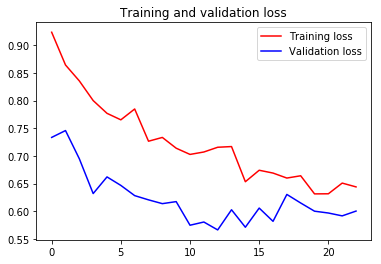

saving model predictions
CNN  stats!
confusionM  [[71 54]
 [18 79]]
acc  0.6756756756756757
recall 0.8144329896907216
auc 0.6912164948453609


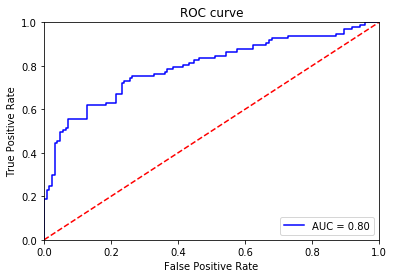

SKlearn predicted proba:  [0.391 0.231 0.422 0.12  0.215 0.477 0.427 0.043 0.152 0.445 0.111 0.152
 0.562 0.025 0.187 0.299 0.394 0.176 0.146 0.079 0.424 0.072 0.36  0.048
 0.086 0.078 0.773 0.793 0.838 0.52  0.281 0.199 0.068 0.387 0.182 0.112
 0.268 0.123 0.62  0.249 0.187 0.045 0.521 0.391 0.228 0.404 0.531 0.042
 0.181 0.113 0.236 0.173 0.532 0.302 0.33  0.416 0.197 0.281 0.608 0.22
 0.56  0.407 0.357 0.356 0.492 0.339 0.32  0.562 0.333 0.653 0.122 0.196
 0.551 0.15  0.462 0.161 0.086 0.062 0.179 0.853 0.129 0.174 0.21  0.306
 0.271 0.2   0.073 0.458 0.13  0.307 0.459 0.11  0.199 0.325 0.616 0.458
 0.622 0.171 0.386 0.308 0.424 0.111 0.594 0.452 0.036 0.345 0.498 0.494
 0.12  0.447 0.285 0.506 0.498 0.057 0.611 0.425 0.091 0.145 0.221 0.259
 0.128 0.502 0.715 0.133 0.163 0.402 0.96  0.603 0.619 0.576 0.921 0.418
 0.694 0.415 0.719 0.806 0.762 0.312 0.062 0.826 0.861 0.365 0.386 0.855
 0.224 0.569 0.41  0.763 0.325 0.959 0.622 0.413 0.951 0.804 0.802 0.508
 0.143 0.939 0.229 0.851 0

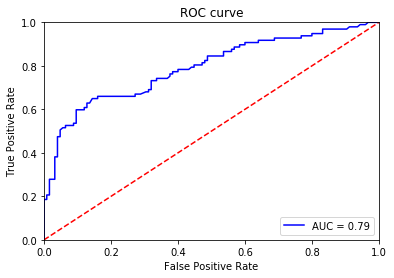

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

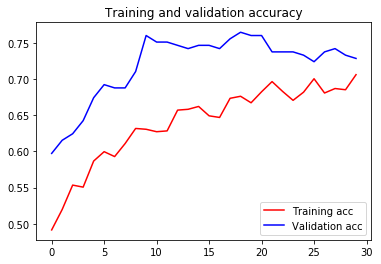

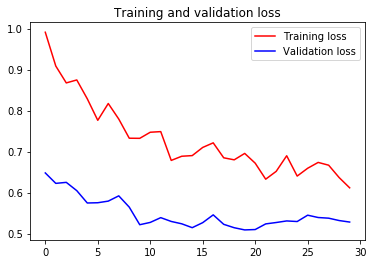

saving model predictions
CNN  stats!
confusionM  [[107  17]
 [ 43  54]]
acc  0.7285067873303167
recall 0.5567010309278351
auc 0.7098021283671434


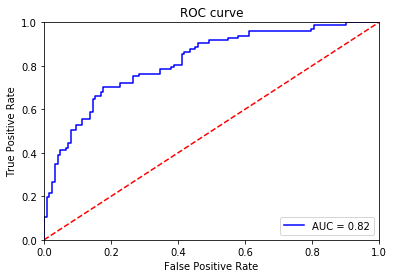

SKlearn predicted proba:  [0.391 0.058 0.23  0.22  0.111 0.321 0.307 0.081 0.242 0.315 0.062 0.117
 0.817 0.139 0.159 0.064 0.391 0.279 0.166 0.681 0.123 0.146 0.827 0.06
 0.547 0.236 0.467 0.292 0.225 0.214 0.701 0.195 0.322 0.103 0.405 0.668
 0.361 0.28  0.377 0.037 0.166 0.64  0.245 0.226 0.958 0.387 0.265 0.386
 0.076 0.15  0.239 0.501 0.086 0.103 0.308 0.389 0.169 0.065 0.072 0.313
 0.169 0.23  0.564 0.417 0.233 0.327 0.759 0.339 0.276 0.413 0.128 0.086
 0.639 0.105 0.371 0.158 0.148 0.313 0.77  0.422 0.168 0.332 0.101 0.532
 0.046 0.281 0.277 0.281 0.587 0.21  0.18  0.115 0.102 0.275 0.164 0.371
 0.482 0.374 0.129 0.072 0.736 0.397 0.083 0.194 0.155 0.265 0.381 0.721
 0.333 0.167 0.157 0.311 0.227 0.486 0.548 0.104 0.284 0.344 0.616 0.653
 0.333 0.213 0.47  0.122 0.787 0.895 0.765 0.952 0.316 0.722 0.43  0.595
 0.36  0.788 0.37  0.215 0.521 0.971 0.266 0.399 0.658 0.823 0.113 0.313
 0.645 0.585 0.718 0.888 0.683 0.767 0.873 0.319 0.249 0.169 0.385 0.979
 0.959 0.856 0.423 0.582 0

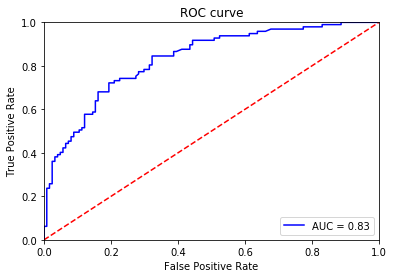

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

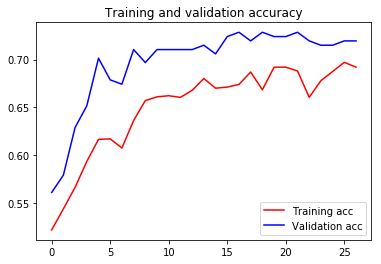

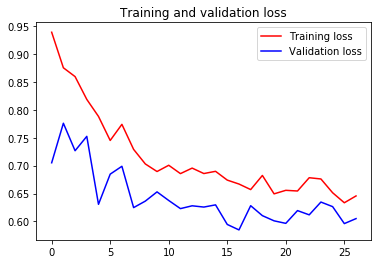

saving model predictions
CNN  stats!
confusionM  [[113  11]
 [ 51  46]]
acc  0.7194570135746606
recall 0.4742268041237113
auc 0.6927585633521782


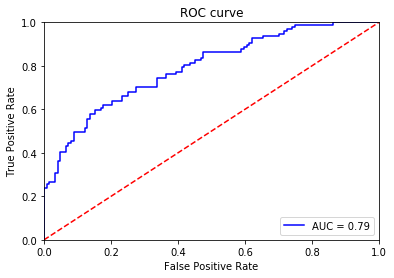

SKlearn predicted proba:  [0.479 0.134 0.097 0.155 0.272 0.483 0.793 0.027 0.085 0.306 0.114 0.402
 0.061 0.083 0.145 0.598 0.227 0.064 0.196 0.345 0.114 0.211 0.133 0.049
 0.24  0.429 0.108 0.167 0.04  0.345 0.27  0.273 0.618 0.184 0.3   0.205
 0.381 0.087 0.119 0.144 0.327 0.079 0.494 0.386 0.058 0.256 0.327 0.305
 0.216 0.762 0.29  0.247 0.48  0.323 0.191 0.594 0.348 0.549 0.173 0.126
 0.213 0.043 0.534 0.119 0.426 0.036 0.13  0.308 0.175 0.493 0.191 0.27
 0.332 0.426 0.289 0.065 0.187 0.05  0.212 0.053 0.069 0.578 0.31  0.439
 0.397 0.453 0.646 0.31  0.832 0.459 0.06  0.386 0.063 0.209 0.115 0.644
 0.311 0.04  0.601 0.208 0.125 0.132 0.85  0.146 0.052 0.215 0.518 0.085
 0.284 0.377 0.128 0.148 0.042 0.044 0.595 0.101 0.299 0.159 0.138 0.081
 0.111 0.139 0.075 0.2   0.407 0.365 0.618 0.156 0.43  0.916 0.756 0.811
 0.425 0.054 0.416 0.129 0.788 0.183 0.44  0.243 0.32  0.359 0.17  0.462
 0.2   0.899 0.347 0.127 0.93  0.397 0.24  0.373 0.979 0.649 0.773 0.658
 0.269 0.307 0.883 0.733 0

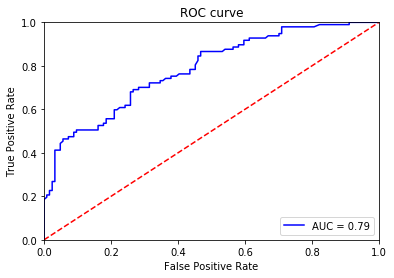

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

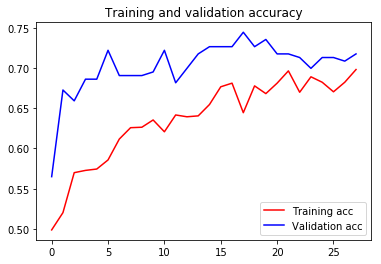

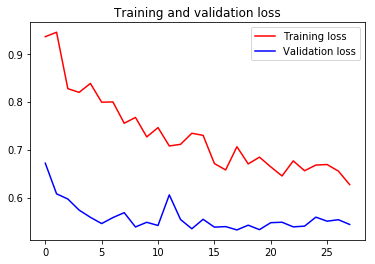

saving model predictions
CNN  stats!
confusionM  [[99 26]
 [37 61]]
acc  0.7174887892376681
recall 0.6224489795918368
auc 0.7072244897959185


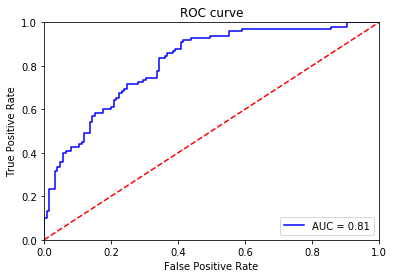

SKlearn predicted proba:  [0.364 0.12  0.353 0.333 0.253 0.172 0.204 0.379 0.257 0.091 0.457 0.246
 0.067 0.055 0.111 0.136 0.059 0.497 0.342 0.421 0.39  0.597 0.68  0.776
 0.761 0.174 0.177 0.587 0.842 0.537 0.123 0.823 0.204 0.181 0.442 0.148
 0.359 0.184 0.174 0.772 0.31  0.147 0.312 0.619 0.191 0.089 0.127 0.285
 0.279 0.448 0.19  0.858 0.037 0.888 0.268 0.15  0.07  0.128 0.34  0.092
 0.182 0.144 0.278 0.278 0.503 0.168 0.127 0.211 0.184 0.238 0.276 0.56
 0.179 0.095 0.153 0.758 0.395 0.068 0.216 0.097 0.298 0.571 0.075 0.236
 0.462 0.289 0.803 0.105 0.103 0.174 0.561 0.094 0.207 0.061 0.949 0.229
 0.558 0.263 0.062 0.522 0.747 0.187 0.129 0.18  0.273 0.204 0.109 0.649
 0.674 0.347 0.137 0.092 0.092 0.432 0.04  0.856 0.072 0.408 0.228 0.361
 0.326 0.106 0.034 0.104 0.219 0.736 0.308 0.284 0.523 0.947 0.4   0.473
 0.891 0.956 0.818 0.645 0.879 0.532 0.631 0.854 0.102 0.476 0.913 0.215
 0.182 0.93  0.721 0.564 0.4   0.578 0.307 0.455 0.299 0.313 0.983 0.301
 0.966 0.871 0.835 0.747 0

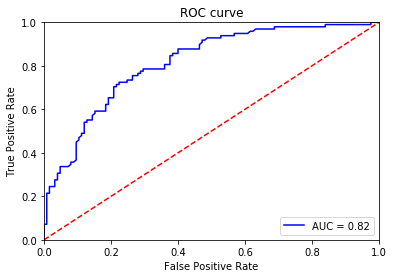

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
______

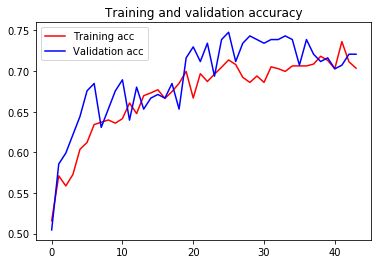

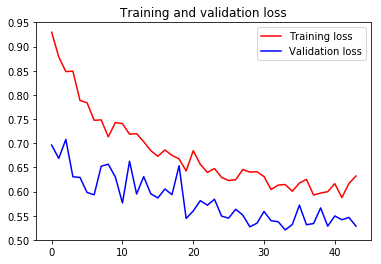

saving model predictions
CNN  stats!
confusionM  [[85 40]
 [22 75]]
acc  0.7207207207207207
recall 0.7731958762886598
auc 0.7265979381443298


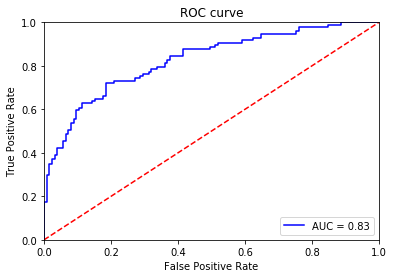

SKlearn predicted proba:  [0.568 0.247 0.2   0.376 0.297 0.185 0.137 0.749 0.095 0.642 0.314 0.429
 0.494 0.263 0.243 0.053 0.147 0.086 0.36  0.117 0.369 0.026 0.085 0.124
 0.589 0.311 0.478 0.386 0.526 0.51  0.146 0.129 0.529 0.176 0.299 0.174
 0.238 0.404 0.331 0.42  0.397 0.751 0.174 0.523 0.037 0.31  0.201 0.539
 0.525 0.439 0.441 0.075 0.874 0.309 0.136 0.265 0.218 0.209 0.184 0.523
 0.152 0.659 0.392 0.218 0.123 0.21  0.839 0.041 0.175 0.088 0.254 0.058
 0.209 0.292 0.086 0.518 0.346 0.203 0.466 0.201 0.154 0.242 0.04  0.718
 0.133 0.364 0.322 0.125 0.516 0.115 0.757 0.198 0.382 0.629 0.28  0.437
 0.582 0.201 0.155 0.399 0.358 0.162 0.139 0.115 0.642 0.508 0.186 0.175
 0.477 0.301 0.29  0.133 0.158 0.603 0.355 0.052 0.222 0.262 0.434 0.476
 0.131 0.16  0.064 0.207 0.101 0.305 0.562 0.731 0.336 0.994 0.311 0.96
 0.962 0.685 0.286 0.679 0.135 0.953 0.454 0.356 0.535 0.867 0.273 0.552
 0.703 0.111 0.713 0.623 0.75  0.576 0.295 0.82  0.689 0.93  0.925 0.651
 0.136 0.258 0.167 0.417 0

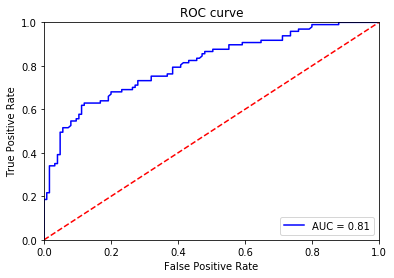

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

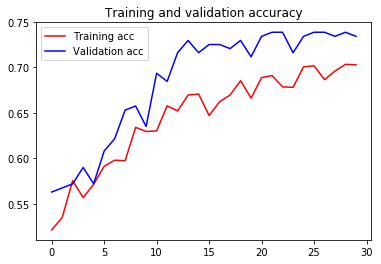

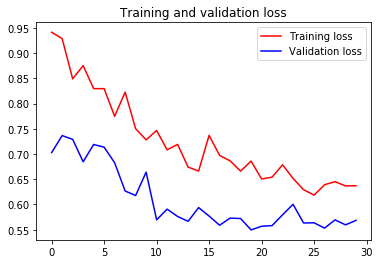

saving model predictions
CNN  stats!
confusionM  [[115  10]
 [ 49  48]]
acc  0.7342342342342343
recall 0.4948453608247423
auc 0.7074226804123711


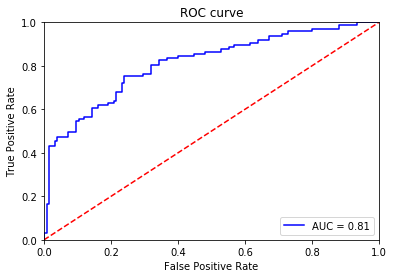

SKlearn predicted proba:  [0.437 0.265 0.245 0.188 0.168 0.183 0.165 0.192 0.317 0.188 0.213 0.372
 0.264 0.049 0.309 0.433 0.155 0.162 0.692 0.173 0.095 0.098 0.555 0.079
 0.194 0.161 0.166 0.312 0.454 0.648 0.233 0.381 0.279 0.449 0.386 0.369
 0.361 0.303 0.14  0.488 0.176 0.081 0.138 0.683 0.404 0.227 0.082 0.093
 0.53  0.483 0.36  0.34  0.98  0.33  0.288 0.182 0.38  0.518 0.174 0.086
 0.087 0.284 0.177 0.626 0.182 0.071 0.055 0.114 0.453 0.074 0.124 0.103
 0.119 0.386 0.243 0.53  0.167 0.148 0.77  0.308 0.072 0.136 0.104 0.355
 0.262 0.429 0.187 0.062 0.064 0.365 0.092 0.092 0.507 0.864 0.655 0.179
 0.329 0.09  0.302 0.149 0.131 0.456 0.748 0.232 0.051 0.045 0.259 0.524
 0.475 0.5   0.361 0.08  0.386 0.123 0.121 0.352 0.293 0.12  0.306 0.157
 0.135 0.094 0.132 0.088 0.533 0.238 0.835 0.638 0.792 0.459 0.505 0.96
 0.987 0.609 0.35  0.926 0.672 0.248 0.295 0.698 0.334 0.551 0.138 0.628
 0.867 0.379 0.878 0.812 0.184 0.889 0.804 0.282 0.243 0.865 0.929 0.621
 0.507 0.312 0.461 0.45  0

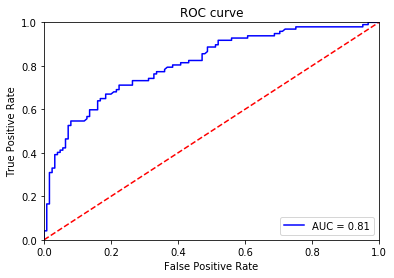

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

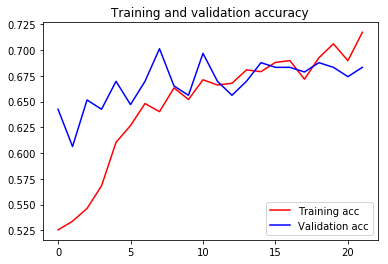

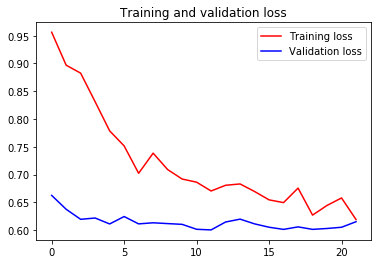

saving model predictions
CNN  stats!
confusionM  [[88 36]
 [34 63]]
acc  0.6832579185520362
recall 0.6494845360824743
auc 0.6795809777186564


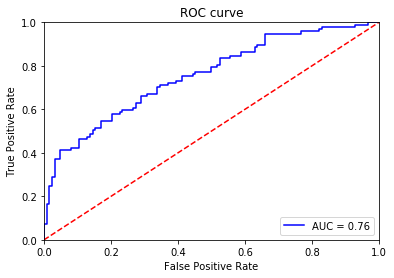

SKlearn predicted proba:  [0.471 0.741 0.545 0.441 0.118 0.543 0.381 0.154 0.63  0.201 0.042 0.034
 0.35  0.14  0.109 0.165 0.101 0.333 0.406 0.107 0.464 0.04  0.091 0.358
 0.141 0.883 0.588 0.104 0.155 0.259 0.3   0.107 0.715 0.218 0.126 0.694
 0.305 0.44  0.146 0.419 0.287 0.691 0.586 0.414 0.123 0.22  0.201 0.044
 0.599 0.568 0.134 0.143 0.286 0.941 0.141 0.171 0.52  0.193 0.084 0.364
 0.683 0.395 0.102 0.377 0.39  0.466 0.491 0.045 0.074 0.398 0.597 0.144
 0.137 0.111 0.04  0.218 0.286 0.27  0.046 0.305 0.262 0.121 0.114 0.125
 0.185 0.118 0.064 0.109 0.145 0.442 0.764 0.365 0.51  0.079 0.245 0.798
 0.469 0.158 0.418 0.59  0.045 0.214 0.443 0.165 0.13  0.176 0.516 0.152
 0.076 0.843 0.407 0.292 0.661 0.215 0.266 0.147 0.052 0.568 0.504 0.154
 0.56  0.274 0.123 0.181 0.922 0.798 0.747 0.346 0.393 0.964 0.571 0.252
 0.628 0.37  0.763 0.76  0.476 0.68  0.072 0.171 0.624 0.882 0.784 0.584
 0.483 0.814 0.664 0.272 0.356 0.804 0.376 0.932 0.563 0.229 0.116 0.943
 0.368 0.753 0.067 0.36  

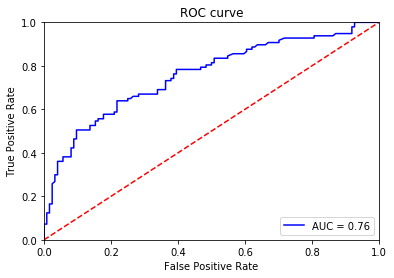

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

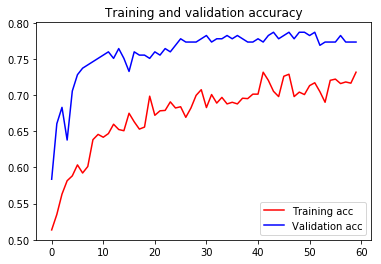

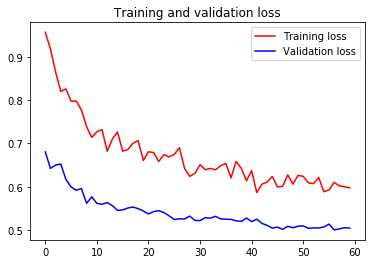

saving model predictions
CNN  stats!
confusionM  [[98 26]
 [24 73]]
acc  0.7737556561085973
recall 0.7525773195876289
auc 0.7714499501163951


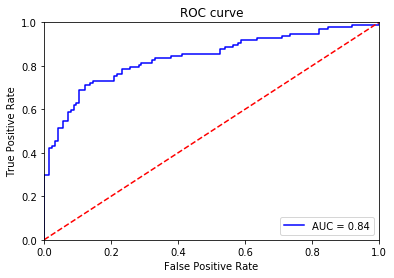

SKlearn predicted proba:  [0.258 0.494 0.26  0.243 0.035 0.144 0.042 0.048 0.25  0.329 0.61  0.209
 0.086 0.309 0.628 0.216 0.68  0.132 0.046 0.053 0.036 0.177 0.07  0.517
 0.062 0.59  0.069 0.161 0.884 0.493 0.239 0.037 0.066 0.089 0.078 0.082
 0.186 0.227 0.13  0.097 0.154 0.149 0.121 0.024 0.173 0.249 0.168 0.029
 0.13  0.21  0.522 0.087 0.291 0.091 0.164 0.163 0.13  0.328 0.577 0.321
 0.173 0.865 0.439 0.594 0.399 0.121 0.86  0.134 0.255 0.026 0.023 0.186
 0.27  0.385 0.225 0.216 0.369 0.16  0.08  0.263 0.301 0.506 0.621 0.543
 0.125 0.372 0.527 0.097 0.486 0.485 0.27  0.35  0.058 0.049 0.366 0.22
 0.128 0.234 0.566 0.44  0.22  0.055 0.166 0.168 0.198 0.283 0.651 0.18
 0.195 0.034 0.056 0.042 0.247 0.677 0.039 0.516 0.447 0.185 0.423 0.254
 0.703 0.653 0.091 0.094 0.615 0.863 0.104 0.961 0.885 0.9   0.692 0.99
 0.478 0.13  0.935 0.891 0.901 0.95  0.239 0.889 0.852 0.121 0.984 0.755
 0.202 0.264 0.7   0.594 0.123 0.446 0.62  0.971 0.928 0.124 0.409 0.967
 0.976 0.812 0.964 0.748 0.8

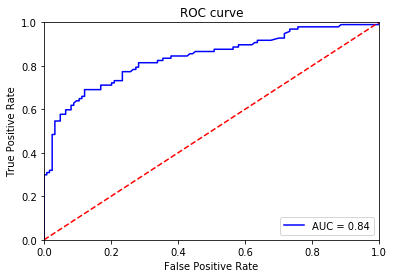

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

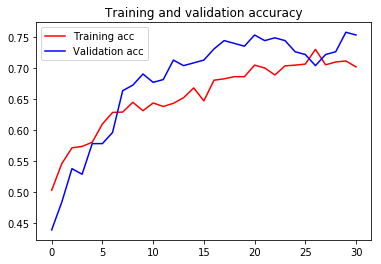

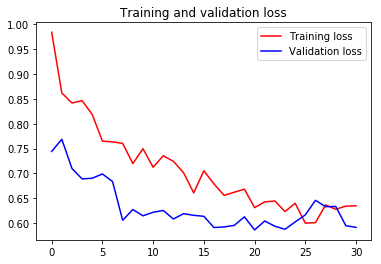

saving model predictions
CNN  stats!
confusionM  [[92 33]
 [22 76]]
acc  0.7533632286995515
recall 0.7755102040816326
auc 0.7557551020408163


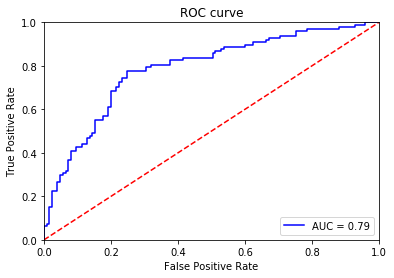

SKlearn predicted proba:  [0.333 0.16  0.22  0.159 0.118 0.553 0.247 0.237 0.051 0.052 0.621 0.096
 0.063 0.122 0.3   0.097 0.604 0.274 0.089 0.709 0.969 0.049 0.178 0.326
 0.113 0.5   0.258 0.3   0.827 0.165 0.064 0.288 0.17  0.31  0.044 0.275
 0.346 0.131 0.301 0.747 0.158 0.281 0.236 0.113 0.208 0.137 0.433 0.493
 0.577 0.258 0.223 0.809 0.495 0.083 0.106 0.338 0.151 0.193 0.534 0.072
 0.15  0.525 0.126 0.129 0.234 0.264 0.13  0.096 0.067 0.373 0.307 0.181
 0.263 0.244 0.436 0.098 0.175 0.118 0.32  0.081 0.747 0.103 0.092 0.104
 0.806 0.709 0.834 0.291 0.327 0.305 0.135 0.669 0.335 0.334 0.668 0.599
 0.081 0.519 0.091 0.939 0.441 0.678 0.034 0.331 0.388 0.66  0.194 0.205
 0.32  0.886 0.627 0.057 0.055 0.468 0.407 0.346 0.097 0.075 0.083 0.293
 0.191 0.196 0.181 0.349 0.185 0.805 0.778 0.279 0.062 0.383 0.835 0.122
 0.446 0.517 0.798 0.898 0.969 0.489 0.055 0.722 0.76  0.794 0.742 0.191
 0.589 0.951 0.964 0.493 0.567 0.597 0.534 0.915 0.924 0.99  0.252 0.678
 0.962 0.611 0.528 0.418 

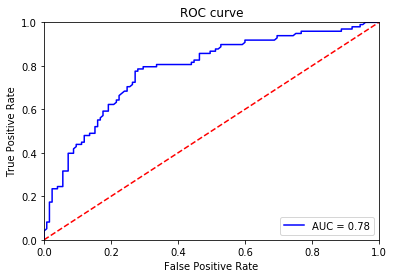

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

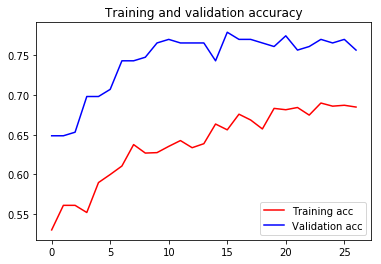

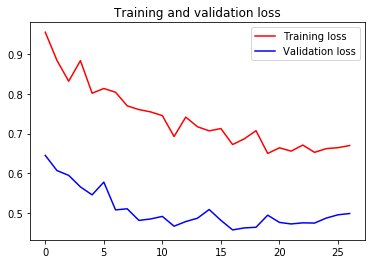

Process Process-22:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-ca02f53ae418>", line 7, in _train_models_fft_Fold
    y_pred = cnn_model.predict(z_val).ravel()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py", line 1878, in predict
    self, x, batch_size=batch_size, verbose=verbose, steps=steps)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training_arrays.py", line 326, in predict_loop
    batch_outs = f(ins_batch)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/backend.py", line 2986, in __call__
    run_metadata=self.run_metadata)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1439, in __call__
    run_metadata_ptr)
  F

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

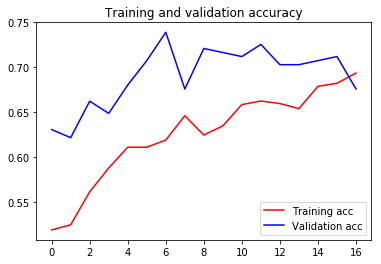

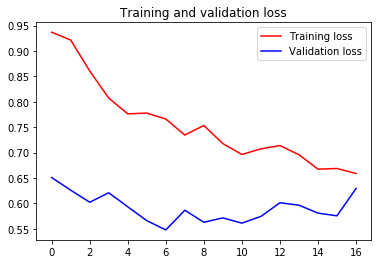

saving model predictions
CNN  stats!
confusionM  [[73 52]
 [20 77]]
acc  0.6756756756756757
recall 0.7938144329896907
auc 0.6889072164948453


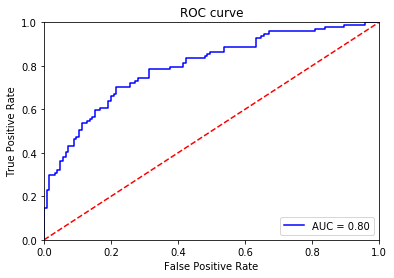

SKlearn predicted proba:  [0.42  0.217 0.216 0.135 0.345 0.484 0.246 0.069 0.213 0.124 0.464 0.152
 0.544 0.178 0.388 0.361 0.12  0.34  0.213 0.096 0.358 0.085 0.076 0.334
 0.898 0.275 0.187 0.304 0.78  0.177 0.388 0.733 0.237 0.474 0.114 0.461
 0.474 0.248 0.171 0.141 0.117 0.295 0.427 0.232 0.233 0.347 0.084 0.476
 0.399 0.154 0.242 0.201 0.165 0.793 0.45  0.108 0.199 0.158 0.33  0.176
 0.136 0.634 0.316 0.139 0.097 0.081 0.169 0.697 0.055 0.156 0.35  0.215
 0.42  0.233 0.3   0.264 0.853 0.114 0.078 0.274 0.234 0.11  0.118 0.054
 0.284 0.333 0.304 0.546 0.264 0.448 0.237 0.152 0.28  0.235 0.082 0.175
 0.393 0.193 0.091 0.147 0.579 0.082 0.309 0.106 0.207 0.114 0.575 0.5
 0.616 0.196 0.18  0.497 0.125 0.161 0.311 0.317 0.829 0.662 0.408 0.151
 0.683 0.074 0.242 0.206 0.135 0.239 0.887 0.972 0.972 0.501 0.248 0.926
 0.707 0.919 0.567 0.172 0.457 0.933 0.566 0.209 0.668 0.523 0.555 0.329
 0.687 0.845 0.808 0.517 0.824 0.758 0.844 0.265 0.967 0.763 0.946 0.261
 0.287 0.706 0.543 0.457 0.

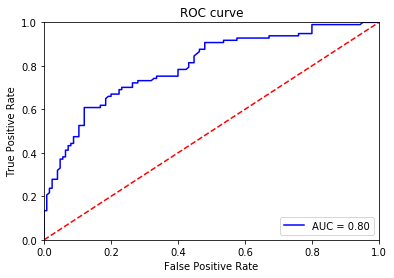

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

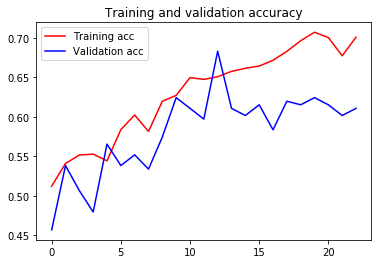

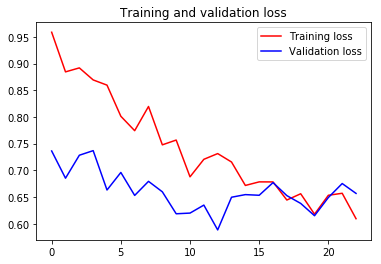

saving model predictions
CNN  stats!
confusionM  [[57 67]
 [19 78]]
acc  0.6108597285067874
recall 0.8041237113402062
auc 0.6319005653475225


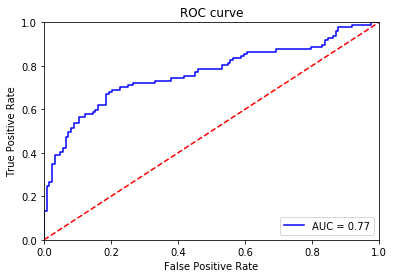

SKlearn predicted proba:  [0.348 0.351 0.46  0.059 0.451 0.195 0.185 0.292 0.447 0.22  0.302 0.269
 0.425 0.324 0.309 0.642 0.404 0.121 0.256 0.464 0.111 0.132 0.539 0.695
 0.097 0.539 0.13  0.17  0.216 0.169 0.127 0.495 0.301 0.119 0.494 0.415
 0.345 0.163 0.109 0.269 0.479 0.192 0.073 0.472 0.38  0.387 0.536 0.11
 0.462 0.545 0.382 0.177 0.058 0.168 0.407 0.693 0.117 0.183 0.13  0.179
 0.316 0.553 0.185 0.052 0.306 0.912 0.414 0.206 0.264 0.306 0.301 0.147
 0.262 0.199 0.314 0.322 0.754 0.167 0.118 0.093 0.257 0.279 0.376 0.412
 0.193 0.145 0.367 0.258 0.233 0.291 0.119 0.686 0.39  0.458 0.663 0.386
 0.123 0.509 0.251 0.206 0.549 0.452 0.241 0.229 0.051 0.608 0.182 0.29
 0.762 0.401 0.381 0.192 0.52  0.314 0.129 0.261 0.487 0.552 0.221 0.387
 0.261 0.211 0.47  0.157 0.534 0.567 0.602 0.457 0.115 0.797 0.728 0.848
 0.592 0.534 0.473 0.474 0.565 0.56  0.342 0.27  0.35  0.426 0.186 0.098
 0.919 0.673 0.812 0.601 0.212 0.693 0.905 0.717 0.811 0.092 0.953 0.129
 0.431 0.862 0.897 0.571 0.

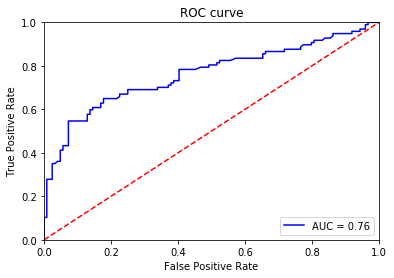

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

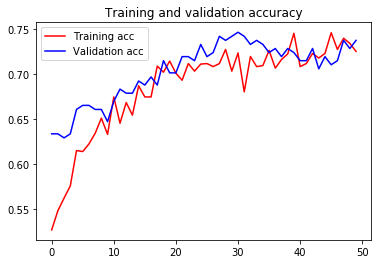

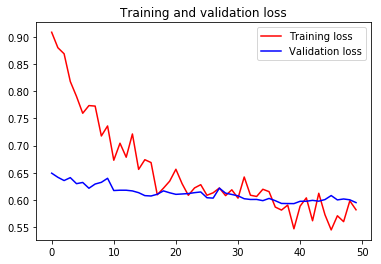

saving model predictions
CNN  stats!
confusionM  [[99 25]
 [33 64]]
acc  0.7375565610859729
recall 0.6597938144329897
auc 0.7290904556035915


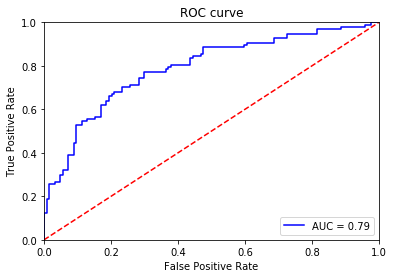

SKlearn predicted proba:  [0.673 0.132 0.332 0.323 0.22  0.045 0.042 0.071 0.051 0.82  0.229 0.034
 0.037 0.747 0.137 0.029 0.101 0.355 0.024 0.241 0.347 0.06  0.423 0.079
 0.853 0.768 0.449 0.1   0.214 0.463 0.103 0.117 0.274 0.245 0.113 0.393
 0.232 0.683 0.087 0.147 0.31  0.235 0.088 0.015 0.275 0.083 0.244 0.469
 0.305 0.245 0.027 0.363 0.218 0.031 0.536 0.403 0.218 0.399 0.362 0.199
 0.524 0.141 0.098 0.089 0.416 0.089 0.011 0.038 0.146 0.414 0.341 0.321
 0.2   0.211 0.874 0.113 0.42  0.093 0.074 0.607 0.015 0.111 0.506 0.225
 0.689 0.638 0.635 0.364 0.907 0.132 0.58  0.532 0.295 0.162 0.128 0.266
 0.073 0.656 0.227 0.018 0.272 0.095 0.315 0.046 0.233 0.746 0.177 0.31
 0.051 0.032 0.484 0.073 0.564 0.203 0.411 0.341 0.126 0.168 0.096 0.166
 0.078 0.051 0.043 0.372 0.911 0.287 0.965 0.927 0.663 0.148 0.948 0.325
 0.254 0.93  0.414 0.378 0.484 0.534 0.096 0.154 0.777 0.114 0.37  0.726
 0.164 0.832 0.211 0.508 0.82  0.902 0.59  0.253 0.275 0.823 0.952 0.532
 0.086 0.229 0.408 0.401 0

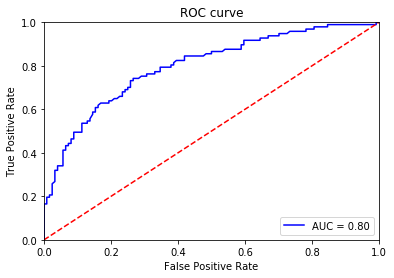

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

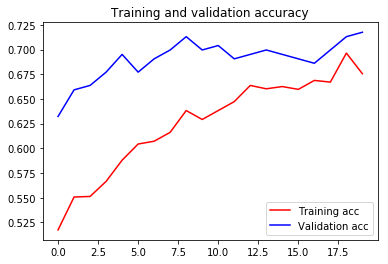

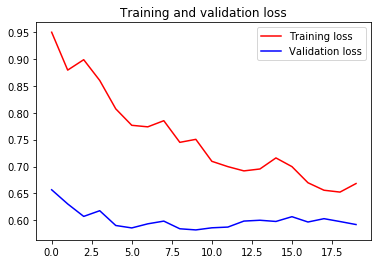

saving model predictions
CNN  stats!
confusionM  [[97 28]
 [35 63]]
acc  0.7174887892376681
recall 0.6428571428571429
auc 0.7094285714285715


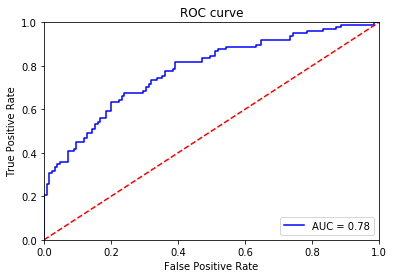

SKlearn predicted proba:  [0.339 0.474 0.46  0.283 0.486 0.257 0.606 0.138 0.696 0.632 0.166 0.466
 0.231 0.051 0.193 0.115 0.191 0.047 0.377 0.333 0.117 0.156 0.52  0.619
 0.656 0.204 0.071 0.144 0.388 0.266 0.295 0.193 0.199 0.064 0.472 0.242
 0.175 0.238 0.28  0.06  0.179 0.531 0.374 0.536 0.281 0.12  0.133 0.087
 0.377 0.087 0.397 0.338 0.226 0.042 0.216 0.504 0.143 0.789 0.078 0.252
 0.445 0.101 0.089 0.154 0.1   0.149 0.662 0.064 0.174 0.14  0.255 0.137
 0.233 0.157 0.083 0.461 0.227 0.106 0.387 0.431 0.669 0.144 0.382 0.471
 0.532 0.669 0.237 0.107 0.174 0.375 0.473 0.603 0.059 0.419 0.063 0.482
 0.216 0.062 0.146 0.746 0.698 0.733 0.341 0.198 0.245 0.072 0.811 0.349
 0.321 0.105 0.394 0.267 0.265 0.174 0.121 0.208 0.545 0.499 0.72  0.078
 0.72  0.185 0.122 0.072 0.324 0.704 0.343 0.893 0.337 0.113 0.962 0.847
 0.846 0.834 0.532 0.77  0.559 0.142 0.119 0.959 0.582 0.655 0.695 0.275
 0.368 0.295 0.617 0.952 0.314 0.433 0.599 0.357 0.837 0.084 0.31  0.235
 0.288 0.305 0.147 0.519 

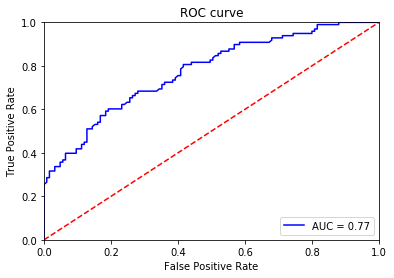

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

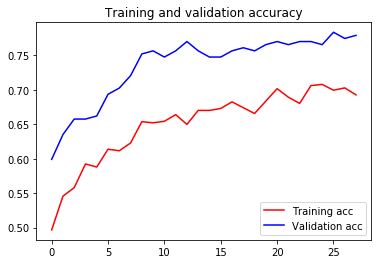

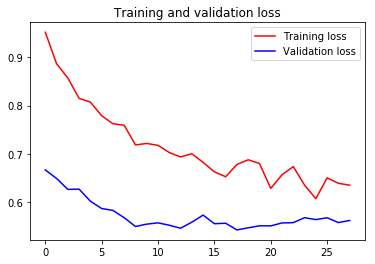

saving model predictions
CNN  stats!
confusionM  [[108  17]
 [ 32  65]]
acc  0.7792792792792793
recall 0.6701030927835051
auc 0.7670515463917525


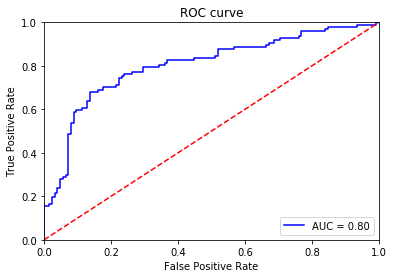

SKlearn predicted proba:  [0.375 0.314 0.348 0.044 0.261 0.219 0.377 0.102 0.375 0.041 0.289 0.305
 0.277 0.555 0.105 0.385 0.214 0.094 0.08  0.091 0.919 0.87  0.568 0.222
 0.456 0.329 0.231 0.436 0.813 0.281 0.25  0.1   0.143 0.339 0.699 0.199
 0.528 0.357 0.151 0.317 0.321 0.062 0.094 0.174 0.182 0.543 0.338 0.083
 0.036 0.302 0.459 0.86  0.169 0.176 0.921 0.364 0.436 0.089 0.127 0.283
 0.208 0.261 0.331 0.534 0.142 0.079 0.145 0.308 0.375 0.346 0.517 0.188
 0.272 0.327 0.85  0.069 0.734 0.399 0.093 0.176 0.161 0.138 0.225 0.177
 0.121 0.417 0.46  0.079 0.474 0.52  0.151 0.129 0.154 0.117 0.284 0.393
 0.245 0.414 0.284 0.279 0.175 0.384 0.093 0.082 0.634 0.461 0.142 0.154
 0.451 0.065 0.19  0.191 0.24  0.165 0.509 0.909 0.155 0.22  0.231 0.248
 0.129 0.204 0.212 0.083 0.091 0.408 0.564 0.213 0.607 0.974 0.699 0.861
 0.554 0.965 0.466 0.822 0.839 0.927 0.366 0.953 0.079 0.374 0.45  0.789
 0.844 0.956 0.675 0.354 0.467 0.882 0.263 0.947 0.718 0.634 0.873 0.438
 0.808 0.951 0.713 0.669 

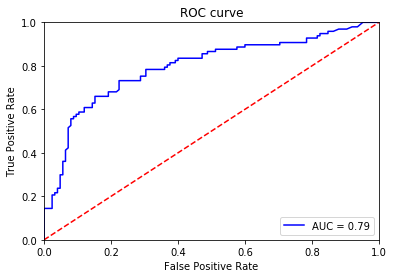

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

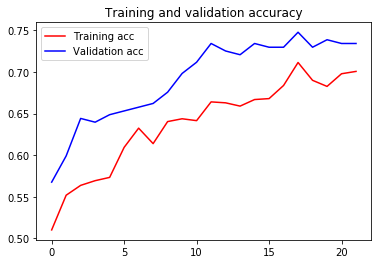

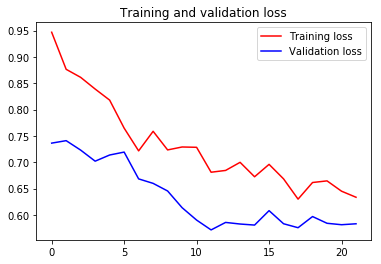

saving model predictions
CNN  stats!
confusionM  [[112  13]
 [ 46  51]]
acc  0.7342342342342343
recall 0.5257731958762887
auc 0.7108865979381442


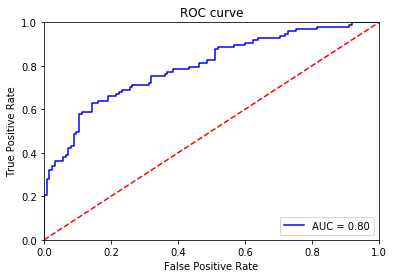

SKlearn predicted proba:  [0.492 0.151 0.365 0.49  0.107 0.301 0.09  0.093 0.108 0.528 0.325 0.817
 0.431 0.473 0.444 0.085 0.261 0.047 0.525 0.032 0.238 0.417 0.273 0.304
 0.065 0.169 0.098 0.156 0.333 0.195 0.166 0.467 0.75  0.087 0.38  0.092
 0.209 0.567 0.432 0.263 0.327 0.216 0.096 0.097 0.503 0.083 0.31  0.25
 0.213 0.773 0.164 0.074 0.097 0.388 0.355 0.594 0.268 0.277 0.487 0.576
 0.241 0.722 0.358 0.172 0.477 0.188 0.231 0.65  0.083 0.119 0.112 0.311
 0.071 0.094 0.371 0.356 0.227 0.294 0.163 0.163 0.141 0.112 0.184 0.153
 0.071 0.074 0.674 0.805 0.505 0.334 0.497 0.252 0.491 0.469 0.069 0.835
 0.141 0.05  0.148 0.209 0.267 0.137 0.089 0.17  0.665 0.242 0.285 0.327
 0.281 0.145 0.666 0.083 0.715 0.523 0.442 0.335 0.238 0.746 0.283 0.212
 0.075 0.047 0.317 0.09  0.042 0.246 0.477 0.571 0.446 0.648 0.686 0.81
 0.333 0.291 0.123 0.97  0.239 0.294 0.616 0.852 0.152 0.612 0.14  0.709
 0.122 0.224 0.916 0.882 0.427 0.251 0.871 0.156 0.935 0.815 0.138 0.841
 0.315 0.826 0.716 0.838 0.

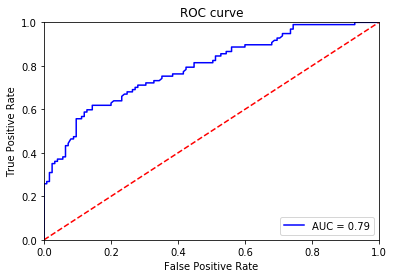

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

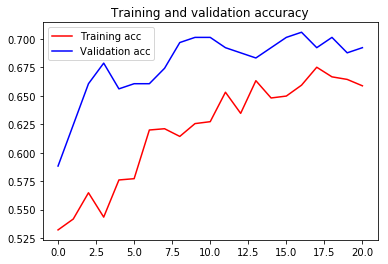

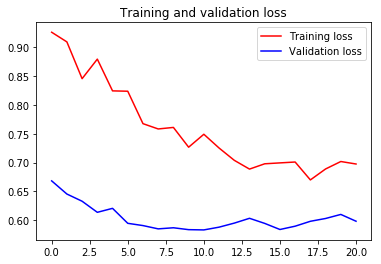

saving model predictions
CNN  stats!
confusionM  [[98 26]
 [42 55]]
acc  0.6923076923076923
recall 0.5670103092783505
auc 0.6786664449617559


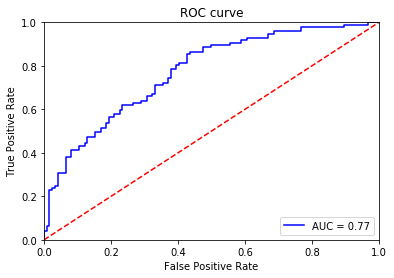

SKlearn predicted proba:  [0.287 0.653 0.413 0.088 0.378 0.502 0.278 0.069 0.153 0.265 0.2   0.084
 0.147 0.493 0.097 0.6   0.234 0.171 0.144 0.438 0.24  0.221 0.712 0.162
 0.428 0.431 0.777 0.1   0.088 0.26  0.287 0.779 0.46  0.17  0.176 0.19
 0.634 0.293 0.235 0.219 0.18  0.091 0.442 0.563 0.577 0.11  0.117 0.474
 0.397 0.217 0.164 0.896 0.199 0.434 0.332 0.102 0.646 0.374 0.166 0.149
 0.485 0.286 0.272 0.629 0.701 0.073 0.146 0.156 0.304 0.16  0.18  0.213
 0.267 0.096 0.066 0.198 0.134 0.11  0.649 0.324 0.366 0.5   0.239 0.452
 0.307 0.598 0.35  0.14  0.168 0.296 0.952 0.559 0.409 0.456 0.795 0.331
 0.041 0.282 0.16  0.142 0.391 0.296 0.107 0.095 0.06  0.308 0.511 0.491
 0.274 0.381 0.439 0.201 0.088 0.439 0.062 0.584 0.566 0.153 0.24  0.211
 0.592 0.091 0.144 0.203 0.542 0.708 0.875 0.231 0.82  0.965 0.919 0.475
 0.286 0.359 0.476 0.632 0.597 0.886 0.445 0.461 0.663 0.121 0.903 0.456
 0.623 0.826 0.502 0.492 0.478 0.64  0.342 0.559 0.29  0.324 0.928 0.964
 0.672 0.761 0.505 0.231 0

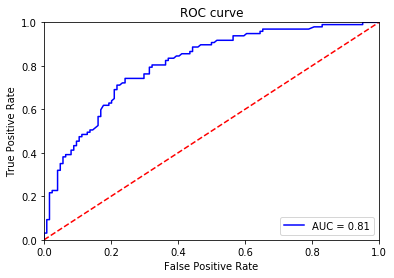

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

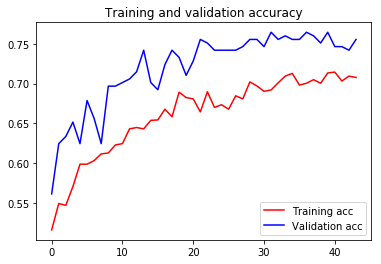

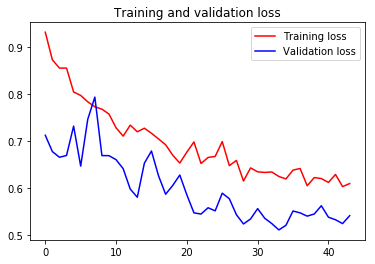

saving model predictions
CNN  stats!
confusionM  [[116   8]
 [ 46  51]]
acc  0.755656108597285
recall 0.5257731958762887
auc 0.7306285334220153


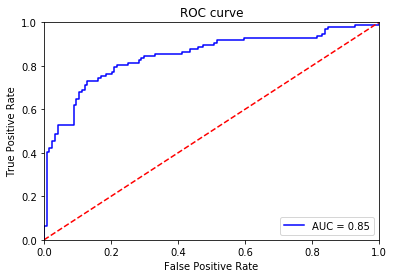

SKlearn predicted proba:  [0.367 0.39  0.182 0.128 0.074 0.13  0.286 0.372 0.237 0.135 0.27  0.277
 0.024 0.169 0.022 0.168 0.105 0.379 0.15  0.122 0.331 0.203 0.009 0.145
 0.188 0.385 0.036 0.047 0.092 0.173 0.427 0.569 0.293 0.117 0.252 0.155
 0.801 0.671 0.257 0.219 0.214 0.733 0.14  0.672 0.217 0.208 0.172 0.445
 0.083 0.488 0.216 0.123 0.944 0.161 0.304 0.287 0.155 0.41  0.239 0.259
 0.277 0.16  0.332 0.137 0.247 0.313 0.092 0.27  0.062 0.103 0.763 0.692
 0.237 0.045 0.318 0.011 0.112 0.657 0.099 0.124 0.407 0.207 0.268 0.342
 0.167 0.129 0.2   0.232 0.275 0.018 0.188 0.357 0.07  0.129 0.131 0.74
 0.395 0.579 0.199 0.212 0.199 0.549 0.091 0.239 0.858 0.148 0.084 0.358
 0.048 0.02  0.187 0.251 0.158 0.196 0.408 0.1   0.196 0.22  0.065 0.579
 0.275 0.09  0.099 0.3   0.981 0.242 0.548 0.175 0.808 0.924 0.644 0.491
 0.829 0.472 0.95  0.058 0.89  0.432 0.978 0.741 0.676 0.494 0.229 0.927
 0.483 0.136 0.921 0.965 0.451 0.674 0.913 0.718 0.866 0.151 0.865 0.269
 0.944 0.362 0.415 0.893 0

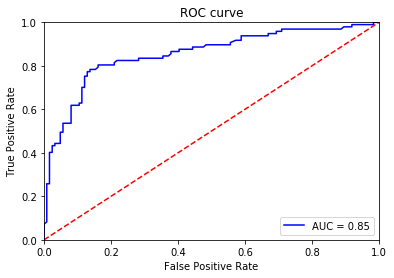

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

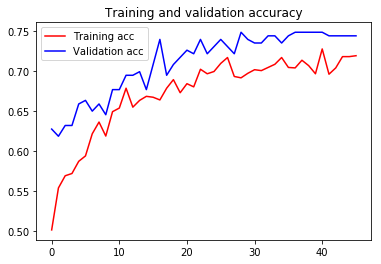

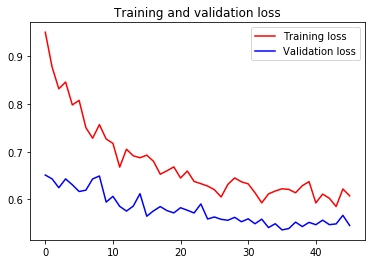

saving model predictions
CNN  stats!
confusionM  [[109  16]
 [ 41  57]]
acc  0.7443946188340808
recall 0.5816326530612245
auc 0.7268163265306123


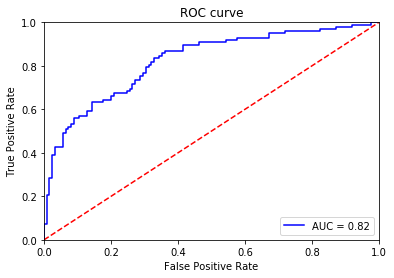

SKlearn predicted proba:  [0.456 0.271 0.092 0.192 0.103 0.451 0.282 0.189 0.185 0.473 0.069 0.277
 0.1   0.384 0.241 0.468 0.072 0.765 0.268 0.303 0.245 0.438 0.61  0.08
 0.249 0.658 0.905 0.079 0.237 0.13  0.1   0.224 0.372 0.089 0.167 0.056
 0.68  0.295 0.399 0.076 0.093 0.288 0.248 0.333 0.483 0.086 0.213 0.467
 0.103 0.203 0.071 0.152 0.419 0.156 0.042 0.356 0.061 0.094 0.058 0.059
 0.03  0.246 0.411 0.09  0.143 0.287 0.08  0.258 0.511 0.18  0.57  0.269
 0.092 0.141 0.764 0.045 0.165 0.032 0.097 0.138 0.087 0.412 0.249 0.264
 0.055 0.238 0.194 0.139 0.083 0.09  0.07  0.529 0.327 0.679 0.209 0.117
 0.387 0.93  0.031 0.365 0.076 0.214 0.42  0.107 0.066 0.06  0.603 0.611
 0.033 0.141 0.688 0.191 0.031 0.134 0.224 0.289 0.055 0.362 0.165 0.116
 0.589 0.422 0.167 0.256 0.405 0.328 0.74  0.746 0.639 0.981 0.967 0.489
 0.676 0.888 0.319 0.957 0.935 0.813 0.589 0.126 0.462 0.163 0.435 0.847
 0.885 0.154 0.228 0.366 0.533 0.422 0.163 0.418 0.933 0.708 0.114 0.378
 0.878 0.333 0.835 0.157 0

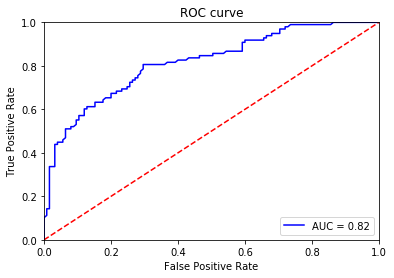

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

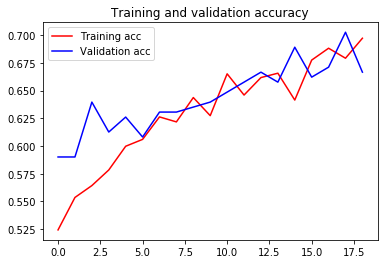

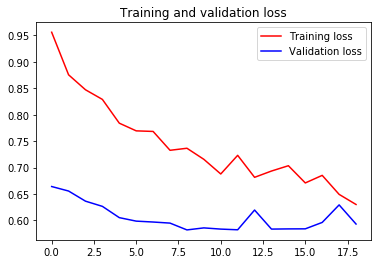

saving model predictions
CNN  stats!
confusionM  [[88 37]
 [37 60]]
acc  0.6666666666666666
recall 0.6185567010309279
auc 0.6612783505154639


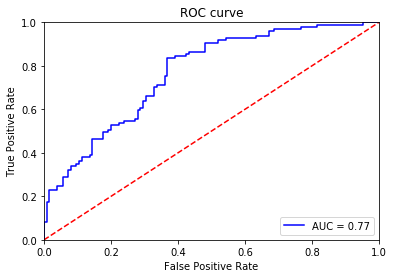

SKlearn predicted proba:  [0.309 0.431 0.468 0.44  0.069 0.153 0.194 0.253 0.304 0.318 0.069 0.038
 0.837 0.054 0.255 0.573 0.624 0.138 0.239 0.085 0.504 0.273 0.144 0.518
 0.146 0.08  0.145 0.093 0.732 0.157 0.371 0.215 0.489 0.07  0.061 0.315
 0.315 0.768 0.393 0.372 0.28  0.912 0.252 0.264 0.241 0.288 0.183 0.492
 0.125 0.561 0.108 0.085 0.424 0.146 0.166 0.178 0.305 0.375 0.136 0.073
 0.058 0.071 0.177 0.432 0.51  0.283 0.166 0.103 0.731 0.851 0.343 0.317
 0.706 0.107 0.781 0.577 0.815 0.523 0.376 0.456 0.523 0.442 0.585 0.128
 0.729 0.748 0.313 0.742 0.095 0.462 0.552 0.302 0.065 0.151 0.417 0.13
 0.166 0.353 0.317 0.371 0.197 0.064 0.121 0.213 0.394 0.413 0.834 0.122
 0.889 0.079 0.685 0.256 0.298 0.122 0.492 0.832 0.419 0.09  0.15  0.156
 0.19  0.07  0.311 0.149 0.126 0.892 0.205 0.394 0.458 0.48  0.347 0.565
 0.321 0.474 0.518 0.626 0.104 0.297 0.374 0.214 0.141 0.345 0.436 0.342
 0.498 0.89  0.437 0.657 0.878 0.375 0.432 0.56  0.94  0.199 0.793 0.821
 0.834 0.205 0.908 0.474 0

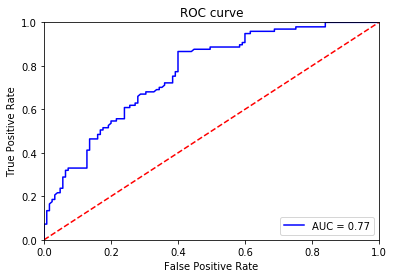

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

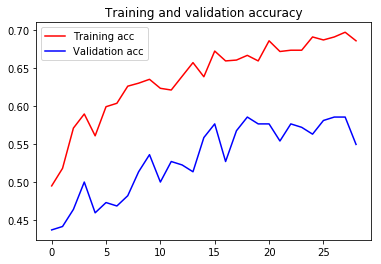

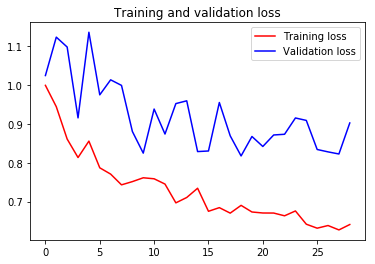

saving model predictions
CNN  stats!
confusionM  [[34 91]
 [ 9 88]]
acc  0.5495495495495496
recall 0.9072164948453608
auc 0.5896082474226804


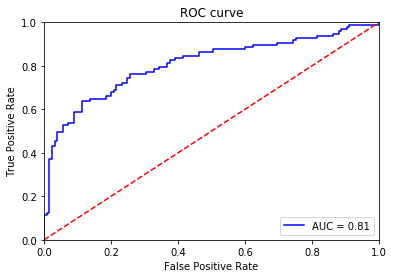

SKlearn predicted proba:  [0.299 0.449 0.195 0.274 0.472 0.413 0.148 0.132 0.628 0.18  0.214 0.504
 0.211 0.032 0.163 0.04  0.139 0.145 0.26  0.218 0.04  0.487 0.063 0.058
 0.124 0.467 0.671 0.459 0.562 0.739 0.1   0.292 0.149 0.396 0.159 0.322
 0.126 0.239 0.106 0.467 0.066 0.205 0.58  0.429 0.387 0.484 0.184 0.202
 0.053 0.073 0.176 0.536 0.14  0.18  0.88  0.955 0.385 0.339 0.482 0.23
 0.166 0.069 0.302 0.176 0.584 0.71  0.237 0.115 0.64  0.074 0.381 0.219
 0.198 0.242 0.428 0.05  0.184 0.099 0.27  0.16  0.573 0.14  0.156 0.126
 0.107 0.059 0.053 0.306 0.263 0.108 0.199 0.559 0.384 0.43  0.45  0.362
 0.189 0.286 0.125 0.305 0.302 0.023 0.265 0.56  0.197 0.281 0.361 0.653
 0.136 0.442 0.132 0.297 0.444 0.082 0.189 0.043 0.675 0.242 0.396 0.626
 0.422 0.578 0.101 0.086 0.03  0.333 0.974 0.181 0.896 0.837 0.299 0.953
 0.054 0.801 0.95  0.861 0.296 0.726 0.864 0.87  0.143 0.657 0.818 0.651
 0.995 0.395 0.968 0.21  0.273 0.923 0.571 0.481 0.876 0.617 0.851 0.413
 0.444 0.376 0.975 0.29  0

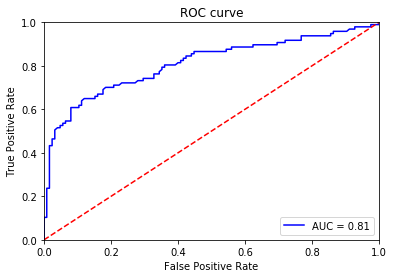

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

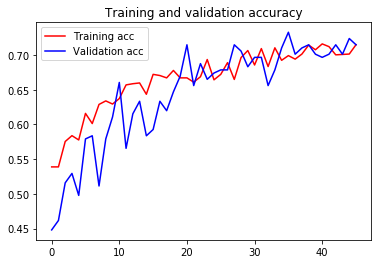

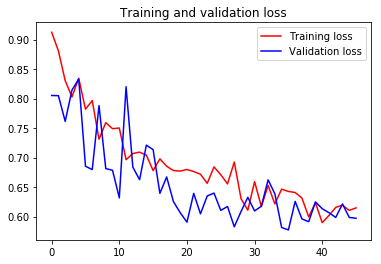

saving model predictions
CNN  stats!
confusionM  [[74 50]
 [13 84]]
acc  0.7149321266968326
recall 0.865979381443299
auc 0.7313767874958431


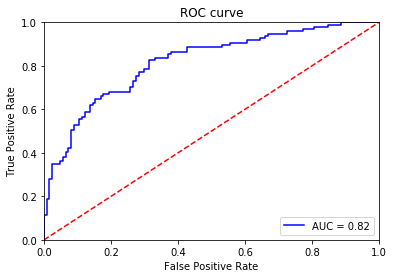

SKlearn predicted proba:  [0.334 0.187 0.329 0.362 0.288 0.168 0.31  0.08  0.808 0.5   0.113 0.257
 0.069 0.108 0.113 0.41  0.079 0.277 0.84  0.556 0.224 0.707 0.243 0.228
 0.275 0.709 0.409 0.364 0.413 0.07  0.286 0.844 0.386 0.296 0.047 0.222
 0.705 0.082 0.135 0.031 0.109 0.462 0.121 0.398 0.462 0.392 0.842 0.216
 0.213 0.044 0.477 0.407 0.373 0.036 0.444 0.452 0.164 0.099 0.715 0.056
 0.194 0.131 0.143 0.211 0.326 0.2   0.131 0.305 0.106 0.728 0.18  0.256
 0.325 0.157 0.221 0.112 0.192 0.286 0.098 0.11  0.116 0.152 0.144 0.181
 0.454 0.166 0.377 0.057 0.42  0.518 0.723 0.048 0.13  0.348 0.142 0.148
 0.065 0.595 0.048 0.199 0.559 0.112 0.466 0.285 0.292 0.342 0.532 0.094
 0.252 0.25  0.557 0.375 0.123 0.475 0.047 0.661 0.116 0.03  0.091 0.22
 0.061 0.232 0.296 0.065 0.489 0.359 0.615 0.349 0.831 0.074 0.91  0.269
 0.926 0.963 0.739 0.098 0.517 0.846 0.926 0.65  0.496 0.824 0.651 0.354
 0.649 0.451 0.401 0.234 0.585 0.77  0.334 0.875 0.62  0.633 0.876 0.703
 0.343 0.938 0.846 0.949 0

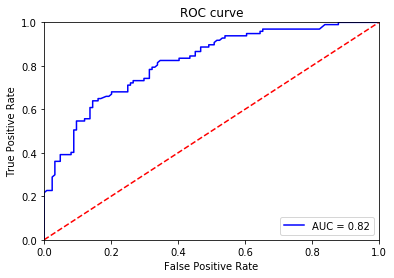

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

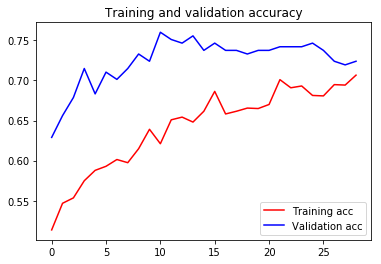

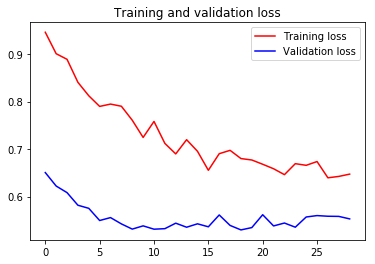

saving model predictions
CNN  stats!
confusionM  [[106  18]
 [ 43  54]]
acc  0.7239819004524887
recall 0.5567010309278351
auc 0.7057698703026273


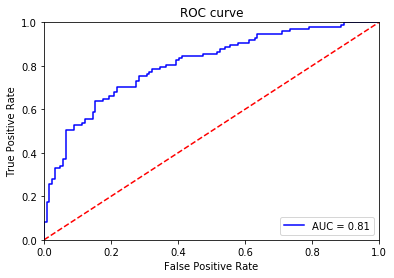

SKlearn predicted proba:  [0.683 0.107 0.178 0.115 0.208 0.229 0.4   0.281 0.255 0.042 0.262 0.196
 0.055 0.225 0.096 0.071 0.245 0.218 0.054 0.052 0.131 0.039 0.295 0.113
 0.064 0.945 0.821 0.057 0.055 0.314 0.622 0.043 0.229 0.055 0.099 0.515
 0.202 0.084 0.429 0.694 0.498 0.45  0.214 0.665 0.418 0.129 0.161 0.466
 0.242 0.127 0.098 0.259 0.196 0.63  0.852 0.105 0.352 0.6   0.289 0.588
 0.245 0.084 0.079 0.1   0.3   0.147 0.199 0.846 0.128 0.56  0.725 0.078
 0.317 0.179 0.101 0.464 0.21  0.511 0.529 0.379 0.229 0.346 0.247 0.231
 0.094 0.181 0.064 0.215 0.386 0.349 0.413 0.573 0.089 0.73  0.5   0.119
 0.3   0.064 0.408 0.953 0.46  0.269 0.073 0.471 0.879 0.369 0.247 0.316
 0.202 0.625 0.157 0.094 0.37  0.371 0.752 0.17  0.061 0.463 0.553 0.197
 0.045 0.074 0.053 0.282 0.937 0.911 0.975 0.685 0.962 0.443 0.193 0.247
 0.731 0.324 0.881 0.545 0.099 0.119 0.774 0.785 0.309 0.855 0.899 0.906
 0.948 0.963 0.833 0.567 0.774 0.179 0.915 0.563 0.1   0.98  0.761 0.913
 0.787 0.245 0.935 0.613 

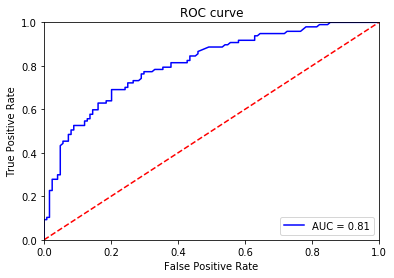

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

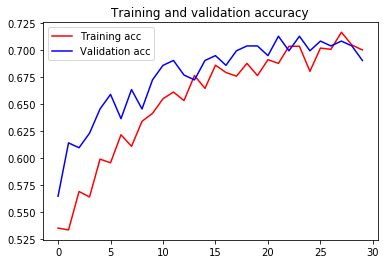

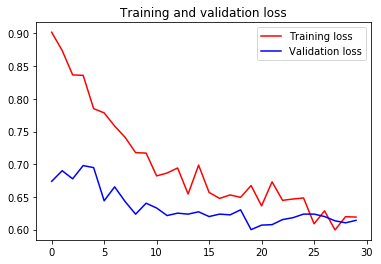

saving model predictions
CNN  stats!
confusionM  [[103  22]
 [ 47  51]]
acc  0.6905829596412556
recall 0.5204081632653061
auc 0.6722040816326531


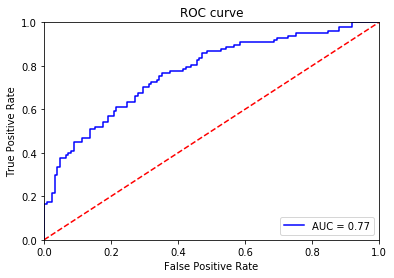

SKlearn predicted proba:  [0.549 0.224 0.302 0.117 0.355 0.137 0.068 0.472 0.377 0.4   0.549 0.073
 0.795 0.14  0.269 0.034 0.261 0.091 0.774 0.909 0.043 0.023 0.236 0.092
 0.099 0.63  0.232 0.171 0.639 0.72  0.149 0.282 0.04  0.165 0.704 0.231
 0.502 0.124 0.045 0.257 0.698 0.203 0.038 0.131 0.155 0.6   0.674 0.156
 0.199 0.073 0.039 0.141 0.139 0.852 0.168 0.08  0.111 0.471 0.105 0.133
 0.07  0.249 0.137 0.782 0.571 0.158 0.208 0.331 0.722 0.183 0.667 0.01
 0.04  0.184 0.138 0.076 0.436 0.827 0.047 0.172 0.049 0.152 0.105 0.088
 0.179 0.051 0.06  0.374 0.49  0.475 0.101 0.444 0.399 0.439 0.43  0.3
 0.64  0.931 0.086 0.333 0.355 0.102 0.415 0.307 0.228 0.178 0.098 0.406
 0.034 0.359 0.413 0.272 0.188 0.406 0.084 0.113 0.382 0.028 0.44  0.594
 0.048 0.226 0.116 0.111 0.187 0.935 0.554 0.121 0.564 0.352 0.617 0.271
 0.267 0.897 0.532 0.89  0.953 0.828 0.7   0.217 0.483 0.905 0.08  0.369
 0.33  0.134 0.972 0.803 0.602 0.699 0.857 0.431 0.26  0.69  0.865 0.208
 0.579 0.713 0.8   0.964 0.5

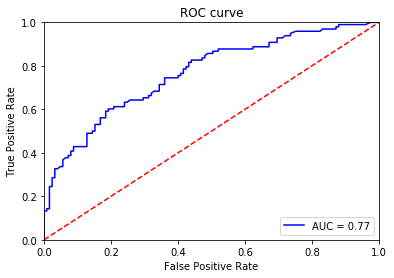

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

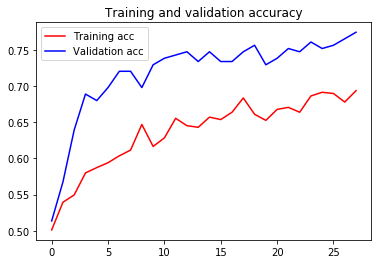

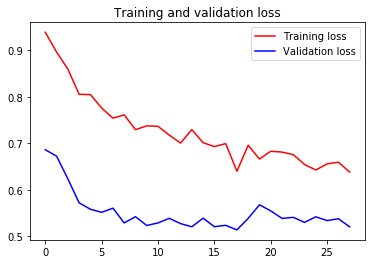

saving model predictions
CNN  stats!
confusionM  [[102  23]
 [ 27  70]]
acc  0.7747747747747747
recall 0.7216494845360825
auc 0.7688247422680413


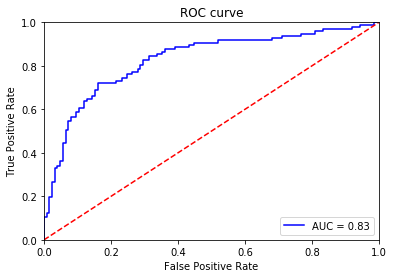

SKlearn predicted proba:  [0.317 0.233 0.291 0.437 0.225 0.088 0.393 0.278 0.146 0.27  0.232 0.162
 0.18  0.063 0.065 0.243 0.26  0.396 0.414 0.022 0.652 0.38  0.293 0.934
 0.529 0.304 0.07  0.107 0.249 0.627 0.482 0.242 0.47  0.528 0.207 0.288
 0.146 0.381 0.236 0.162 0.218 0.484 0.247 0.099 0.235 0.168 0.181 0.287
 0.054 0.572 0.065 0.129 0.414 0.281 0.37  0.225 0.274 0.875 0.081 0.037
 0.271 0.142 0.377 0.225 0.142 0.109 0.13  0.076 0.545 0.487 0.099 0.124
 0.628 0.1   0.223 0.318 0.246 0.18  0.377 0.209 0.458 0.146 0.119 0.28
 0.782 0.186 0.268 0.757 0.671 0.182 0.47  0.117 0.659 0.129 0.063 0.494
 0.04  0.256 0.437 0.254 0.174 0.189 0.102 0.162 0.16  0.114 0.096 0.133
 0.118 0.728 0.263 0.091 0.182 0.278 0.207 0.161 0.348 0.228 0.08  0.851
 0.184 0.045 0.143 0.321 0.061 0.974 0.148 0.854 0.861 0.986 0.401 0.227
 0.846 0.437 0.475 0.07  0.49  0.99  0.839 0.66  0.51  0.68  0.607 0.495
 0.784 0.515 0.46  0.252 0.393 0.938 0.966 0.918 0.636 0.829 0.249 0.433
 0.351 0.645 0.273 0.889 0

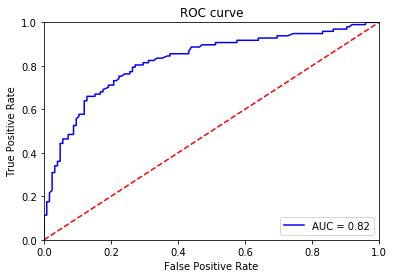

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

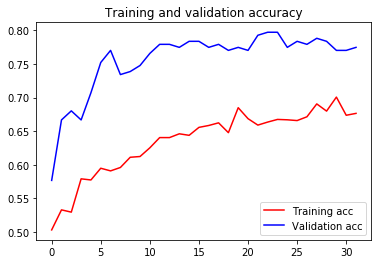

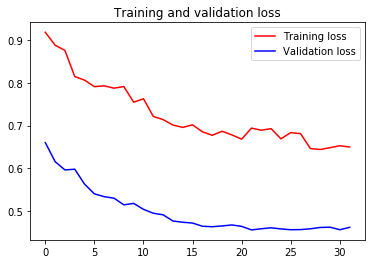

saving model predictions
CNN  stats!
confusionM  [[99 26]
 [24 73]]
acc  0.7747747747747747
recall 0.7525773195876289
auc 0.7722886597938144


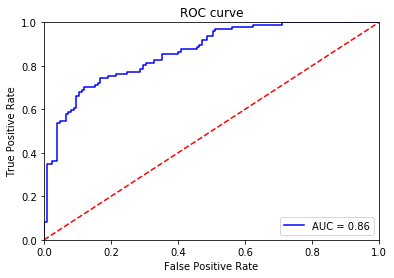

SKlearn predicted proba:  [0.471 0.404 0.36  0.31  0.106 0.088 0.366 0.473 0.486 0.339 0.193 0.153
 0.227 0.247 0.347 0.187 0.066 0.326 0.222 0.113 0.805 0.075 0.399 0.599
 0.135 0.095 0.381 0.274 0.534 0.072 0.091 0.427 0.447 0.128 0.368 0.134
 0.138 0.208 0.373 0.122 0.473 0.215 0.178 0.311 0.069 0.433 0.388 0.251
 0.214 0.27  0.639 0.468 0.471 0.065 0.055 0.652 0.427 0.305 0.384 0.353
 0.938 0.369 0.296 0.181 0.167 0.263 0.177 0.609 0.316 0.739 0.132 0.112
 0.539 0.168 0.332 0.226 0.484 0.609 0.272 0.712 0.26  0.442 0.086 0.174
 0.13  0.533 0.536 0.199 0.666 0.599 0.309 0.195 0.698 0.407 0.472 0.617
 0.421 0.145 0.28  0.139 0.717 0.131 0.13  0.709 0.133 0.49  0.27  0.252
 0.802 0.202 0.468 0.216 0.626 0.099 0.262 0.093 0.094 0.728 0.139 0.252
 0.318 0.18  0.101 0.088 0.536 0.894 0.919 0.344 0.234 0.697 0.967 0.963
 0.47  0.511 0.359 0.852 0.589 0.846 0.956 0.628 0.373 0.365 0.819 0.922
 0.186 0.741 0.886 0.315 0.859 0.697 0.58  0.189 0.788 0.593 0.422 0.49
 0.889 0.777 0.663 0.639 0

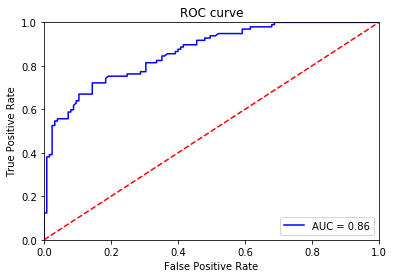

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

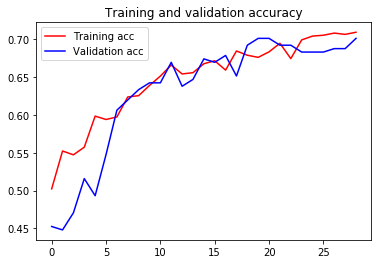

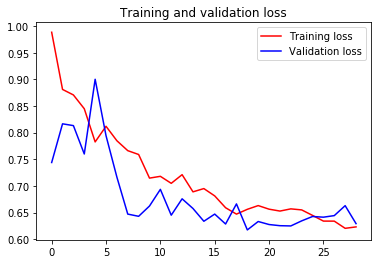

saving model predictions
CNN  stats!
confusionM  [[83 41]
 [25 72]]
acc  0.7013574660633484
recall 0.7422680412371134
auc 0.7058114399733955


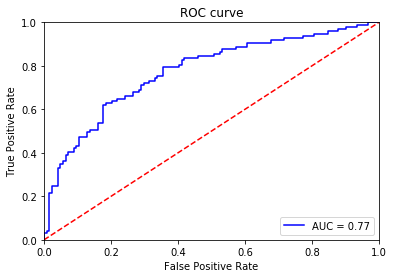

SKlearn predicted proba:  [0.499 0.366 0.38  0.092 0.184 0.127 0.315 0.069 0.078 0.67  0.368 0.059
 0.123 0.199 0.071 0.228 0.095 0.406 0.212 0.45  0.617 0.266 0.546 0.122
 0.119 0.537 0.139 0.079 0.504 0.813 0.077 0.134 0.804 0.264 0.156 0.296
 0.367 0.255 0.153 0.264 0.376 0.1   0.199 0.271 0.708 0.097 0.265 0.965
 0.424 0.376 0.073 0.319 0.159 0.017 0.375 0.198 0.62  0.362 0.343 0.209
 0.16  0.182 0.381 0.573 0.6   0.377 0.206 0.67  0.044 0.513 0.115 0.036
 0.111 0.22  0.382 0.232 0.212 0.08  0.061 0.172 0.151 0.113 0.086 0.028
 0.195 0.154 0.112 0.426 0.131 0.185 0.223 0.677 0.071 0.973 0.142 0.346
 0.041 0.572 0.769 0.02  0.206 0.213 0.349 0.292 0.118 0.079 0.188 0.4
 0.237 0.1   0.042 0.441 0.217 0.524 0.334 0.07  0.126 0.298 0.431 0.065
 0.099 0.274 0.491 0.159 0.453 0.482 0.652 0.292 0.984 0.292 0.972 0.678
 0.673 0.833 0.718 0.472 0.946 0.078 0.853 0.213 0.382 0.699 0.953 0.121
 0.561 0.268 0.592 0.078 0.112 0.375 0.352 0.329 0.204 0.268 0.611 0.548
 0.134 0.902 0.828 0.179 0.

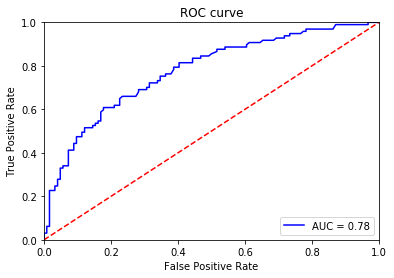

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

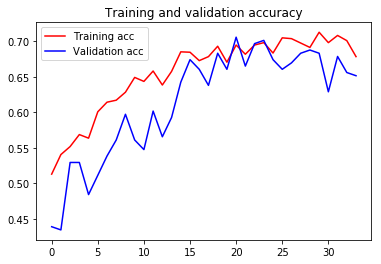

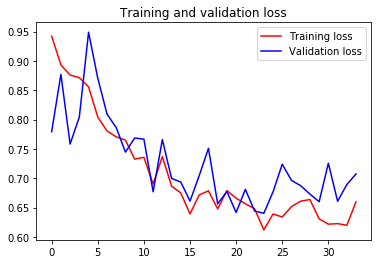

saving model predictions
CNN  stats!
confusionM  [[62 62]
 [15 82]]
acc  0.6515837104072398
recall 0.845360824742268
auc 0.6726804123711341


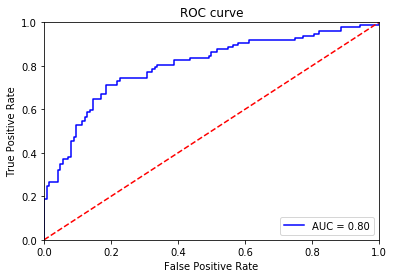

SKlearn predicted proba:  [0.363 0.157 0.062 0.296 0.693 0.169 0.665 0.288 0.057 0.363 0.147 0.323
 0.189 0.17  0.391 0.098 0.296 0.204 0.397 0.682 0.336 0.505 0.093 0.293
 0.148 0.263 0.215 0.153 0.265 0.493 0.301 0.272 0.724 0.358 0.369 0.082
 0.381 0.087 0.176 0.472 0.361 0.098 0.325 0.205 0.235 0.058 0.576 0.859
 0.263 0.381 0.223 0.279 0.503 0.28  0.535 0.43  0.088 0.085 0.302 0.14
 0.082 0.22  0.098 0.151 0.415 0.266 0.115 0.366 0.371 0.196 0.492 0.191
 0.087 0.345 0.092 0.278 0.169 0.283 0.117 0.217 0.753 0.199 0.073 0.467
 0.853 0.206 0.249 0.098 0.171 0.077 0.627 0.788 0.428 0.105 0.184 0.108
 0.192 0.604 0.086 0.74  0.212 0.154 0.379 0.863 0.413 0.626 0.119 0.12
 0.125 0.513 0.279 0.083 0.104 0.188 0.174 0.06  0.193 0.541 0.324 0.937
 0.59  0.35  0.08  0.141 0.626 0.377 0.645 0.279 0.858 0.456 0.95  0.86
 0.636 0.11  0.82  0.486 0.912 0.162 0.303 0.681 0.423 0.528 0.254 0.906
 0.652 0.902 0.331 0.977 0.956 0.419 0.815 0.777 0.347 0.593 0.467 0.129
 0.888 0.698 0.148 0.808 0.1

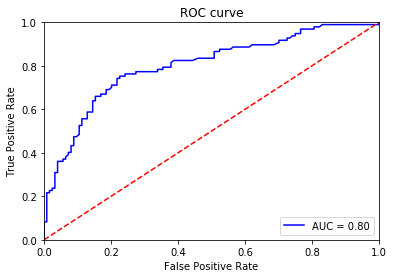

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

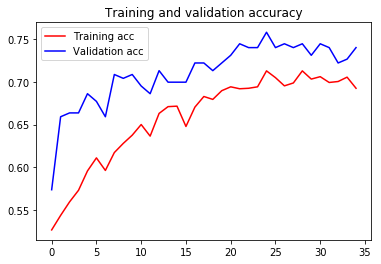

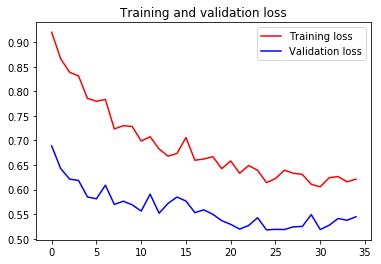

saving model predictions
CNN  stats!
confusionM  [[115  10]
 [ 48  50]]
acc  0.7399103139013453
recall 0.5102040816326531
auc 0.7151020408163266


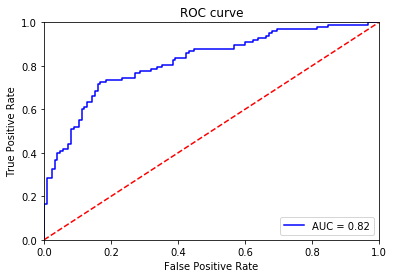

SKlearn predicted proba:  [0.42  0.102 0.11  0.248 0.185 0.107 0.592 0.319 0.142 0.127 0.823 0.263
 0.362 0.27  0.372 0.446 0.09  0.112 0.438 0.144 0.037 0.351 0.574 0.084
 0.18  0.407 0.071 0.533 0.038 0.733 0.495 0.107 0.127 0.265 0.484 0.154
 0.257 0.17  0.051 0.184 0.044 0.208 0.123 0.083 0.464 0.442 0.045 0.498
 0.726 0.441 0.071 0.291 0.372 0.317 0.124 0.084 0.084 0.14  0.251 0.407
 0.205 0.165 0.325 0.649 0.131 0.455 0.199 0.793 0.08  0.051 0.125 0.103
 0.584 0.057 0.283 0.069 0.142 0.298 0.38  0.049 0.155 0.234 0.501 0.251
 0.099 0.118 0.043 0.268 0.273 0.548 0.124 0.074 0.699 0.221 0.869 0.15
 0.271 0.73  0.079 0.211 0.406 0.2   0.34  0.361 0.471 0.072 0.185 0.526
 0.108 0.475 0.318 0.528 0.095 0.116 0.231 0.073 0.226 0.074 0.149 0.111
 0.206 0.306 0.158 0.085 0.086 0.703 0.993 0.903 0.972 0.658 0.534 0.956
 0.485 0.114 0.791 0.304 0.466 0.307 0.766 0.967 0.889 0.859 0.101 0.714
 0.606 0.109 0.64  0.221 0.982 0.284 0.909 0.872 0.58  0.181 0.29  0.268
 0.856 0.938 0.826 0.62  0

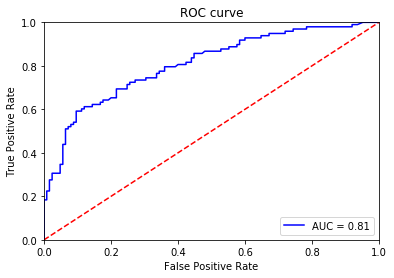

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

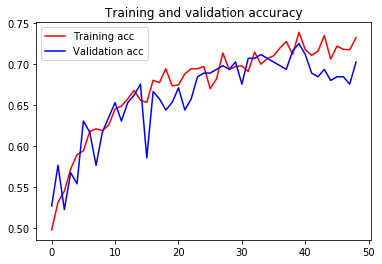

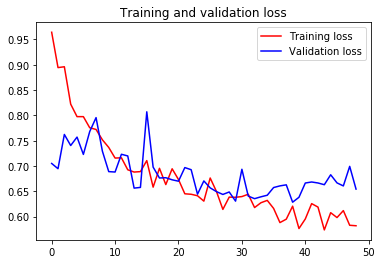

saving model predictions
CNN  stats!
confusionM  [[78 47]
 [19 78]]
acc  0.7027027027027027
recall 0.8041237113402062
auc 0.714061855670103


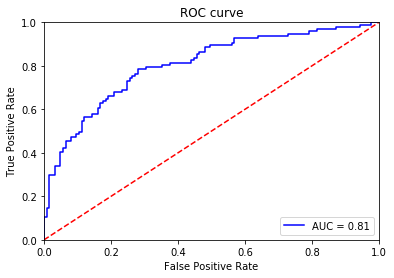

SKlearn predicted proba:  [0.345 0.139 0.404 0.253 0.326 0.228 0.319 0.133 0.441 0.235 0.037 0.118
 0.304 0.269 0.815 0.073 0.111 0.069 0.066 0.251 0.037 0.117 0.031 0.985
 0.177 0.145 0.236 0.166 0.486 0.712 0.145 0.484 0.211 0.526 0.23  0.258
 0.389 0.36  0.176 0.247 0.275 0.081 0.222 0.173 0.018 0.192 0.85  0.125
 0.05  0.498 0.535 0.327 0.148 0.204 0.135 0.421 0.154 0.422 0.087 0.103
 0.122 0.118 0.28  0.182 0.607 0.679 0.157 0.123 0.035 0.829 0.789 0.241
 0.3   0.229 0.186 0.121 0.206 0.22  0.34  0.046 0.238 0.201 0.229 0.163
 0.19  0.109 0.051 0.767 0.539 0.785 0.868 0.606 0.454 0.083 0.058 0.848
 0.495 0.985 0.282 0.542 0.186 0.834 0.048 0.143 0.365 0.768 0.894 0.167
 0.088 0.587 0.283 0.362 0.389 0.151 0.042 0.14  0.268 0.282 0.155 0.169
 0.413 0.215 0.132 0.155 0.464 0.99  0.777 0.256 0.971 0.095 0.913 0.934
 0.872 0.937 0.346 0.464 0.139 0.477 0.738 0.997 0.76  0.624 0.591 0.282
 0.38  0.21  0.954 0.928 0.914 0.269 0.468 0.172 0.541 0.883 0.869 0.904
 0.329 0.886 0.993 0.232 

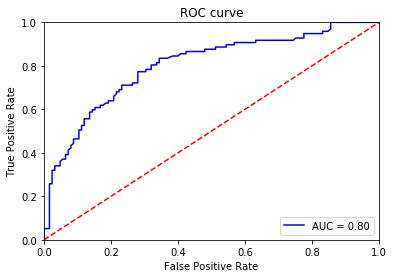

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
______

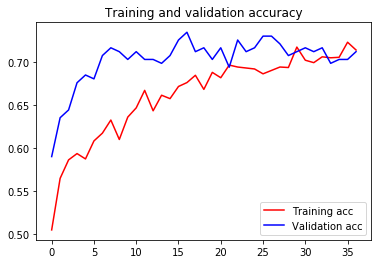

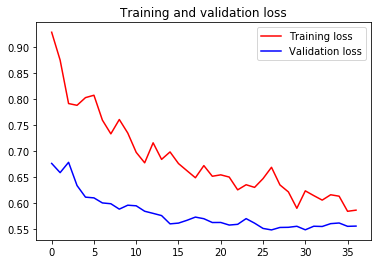

saving model predictions
CNN  stats!
confusionM  [[96 29]
 [35 62]]
acc  0.7117117117117117
recall 0.6391752577319587
auc 0.7035876288659794


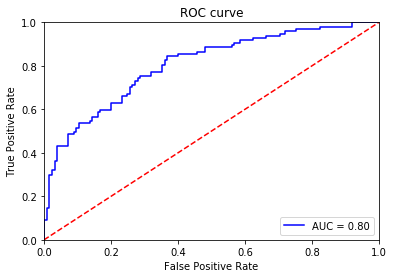

SKlearn predicted proba:  [0.673 0.209 0.245 0.333 0.241 0.231 0.295 0.23  0.317 0.039 0.091 0.208
 0.173 0.403 0.061 0.197 0.102 0.079 0.128 0.728 0.51  0.536 0.837 0.685
 0.046 0.384 0.186 0.226 0.7   0.397 0.176 0.512 0.179 0.319 0.627 0.227
 0.195 0.595 0.186 0.193 0.106 0.363 0.339 0.213 0.353 0.11  0.171 0.352
 0.167 0.965 0.252 0.275 0.614 0.955 0.132 0.058 0.164 0.136 0.169 0.581
 0.211 0.409 0.461 0.161 0.064 0.098 0.249 0.188 0.143 0.051 0.088 0.494
 0.248 0.213 0.272 0.557 0.347 0.735 0.487 0.376 0.151 0.231 0.433 0.818
 0.704 0.571 0.319 0.595 0.503 0.564 0.16  0.068 0.493 0.185 0.577 0.292
 0.736 0.587 0.091 0.322 0.265 0.06  0.259 0.251 0.096 0.035 0.113 0.356
 0.499 0.07  0.727 0.158 0.124 0.05  0.748 0.241 0.158 0.569 0.355 0.599
 0.115 0.337 0.09  0.125 0.055 0.402 0.826 0.467 0.27  0.599 0.56  0.691
 0.519 0.22  0.799 0.481 0.598 0.759 0.672 0.358 0.906 0.853 0.063 0.991
 0.559 0.94  0.77  0.486 0.556 0.904 0.44  0.14  0.394 0.334 0.988 0.644
 0.814 0.15  0.838 0.579 

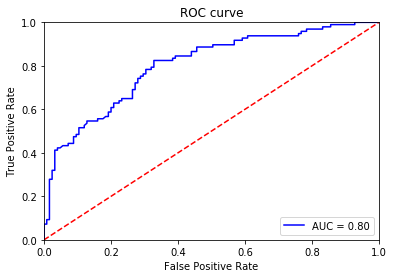

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

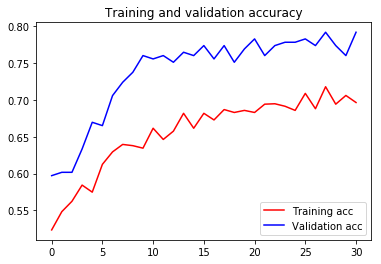

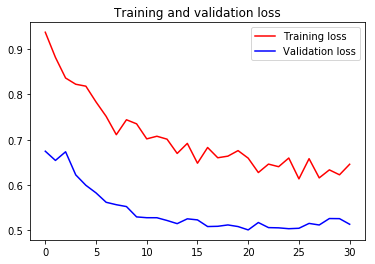

saving model predictions
CNN  stats!
confusionM  [[106  18]
 [ 28  69]]
acc  0.7918552036199095
recall 0.711340206185567
auc 0.7830894579314932


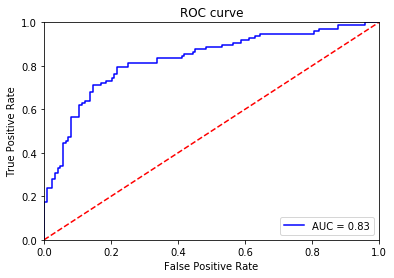

SKlearn predicted proba:  [0.369 0.168 0.265 0.399 0.248 0.14  0.136 0.157 0.5   0.058 0.641 0.044
 0.369 0.092 0.556 0.167 0.219 0.083 0.44  0.079 0.897 0.871 0.225 0.139
 0.075 0.129 0.113 0.209 0.076 0.268 0.307 0.344 0.824 0.227 0.205 0.242
 0.133 0.499 0.22  0.26  0.301 0.195 0.247 0.562 0.035 0.613 0.162 0.079
 0.274 0.214 0.179 0.299 0.149 0.13  0.69  0.114 0.107 0.319 0.764 0.072
 0.293 0.152 0.075 0.152 0.569 0.229 0.419 0.179 0.115 0.753 0.075 0.207
 0.091 0.358 0.233 0.115 0.124 0.284 0.095 0.603 0.098 0.515 0.399 0.149
 0.482 0.164 0.211 0.275 0.205 0.539 0.102 0.544 0.259 0.088 0.065 0.3
 0.267 0.31  0.073 0.207 0.104 0.118 0.489 0.352 0.175 0.21  0.166 0.428
 0.103 0.369 0.459 0.545 0.374 0.403 0.069 0.183 0.345 0.147 0.39  0.884
 0.351 0.143 0.807 0.167 0.357 0.209 0.104 0.879 0.513 0.41  0.799 0.381
 0.857 0.85  0.763 0.505 0.305 0.836 0.199 0.445 0.956 0.261 0.558 0.951
 0.548 0.511 0.345 0.411 0.964 0.429 0.727 0.829 0.966 0.502 0.675 0.73
 0.154 0.395 0.689 0.594 0.6

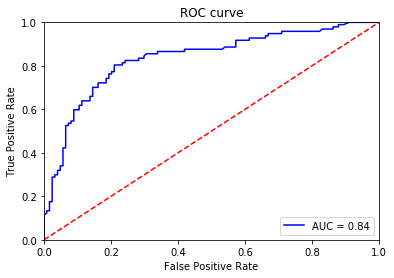

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

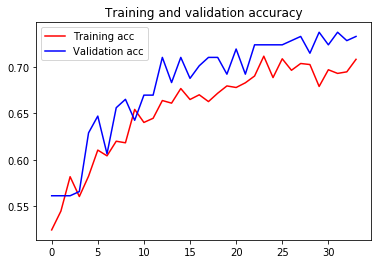

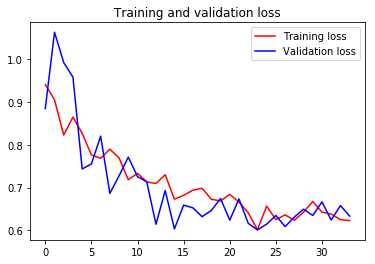

saving model predictions
CNN  stats!
confusionM  [[118   6]
 [ 53  44]]acc  0.7330316742081447

recall 0.4536082474226804
auc 0.7026105753242434


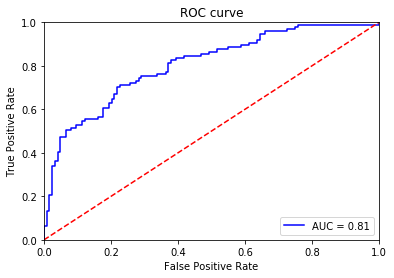

SKlearn predicted proba:  [0.245 0.401 0.289 0.216 0.218 0.25  0.072 0.044 0.415 0.042 0.188 0.353
 0.167 0.497 0.357 0.254 0.037 0.797 0.07  0.481 0.11  0.395 0.272 0.087
 0.272 0.157 0.252 0.199 0.143 0.55  0.734 0.173 0.588 0.43  0.135 0.598
 0.369 0.148 0.134 0.687 0.192 0.442 0.386 0.591 0.187 0.043 0.199 0.163
 0.311 0.199 0.364 0.458 0.708 0.527 0.24  0.106 0.835 0.944 0.176 0.035
 0.378 0.318 0.046 0.934 0.389 0.35  0.218 0.084 0.282 0.089 0.145 0.422
 0.067 0.27  0.454 0.221 0.453 0.166 0.153 0.272 0.284 0.204 0.125 0.155
 0.245 0.083 0.075 0.486 0.12  0.21  0.384 0.095 0.156 0.545 0.395 0.232
 0.067 0.163 0.326 0.031 0.155 0.341 0.151 0.182 0.133 0.279 0.066 0.532
 0.063 0.221 0.512 0.082 0.181 0.284 0.118 0.136 0.039 0.174 0.071 0.521
 0.371 0.725 0.254 0.151 0.841 0.837 0.231 0.969 0.975 0.945 0.504 0.48
 0.165 0.417 0.749 0.707 0.661 0.194 0.303 0.891 0.644 0.274 0.146 0.59
 0.619 0.714 0.175 0.869 0.92  0.309 0.548 0.72  0.233 0.723 0.965 0.937
 0.465 0.091 0.37  0.816 0.

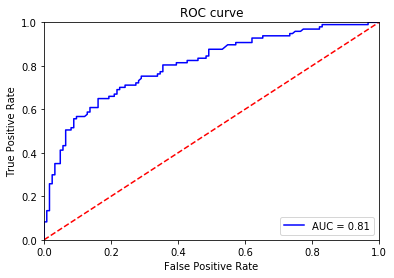

Finished Fold
Train split positives:  388
Train split negatives:  498
Validation split positives:  98
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

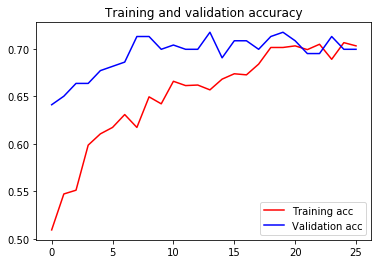

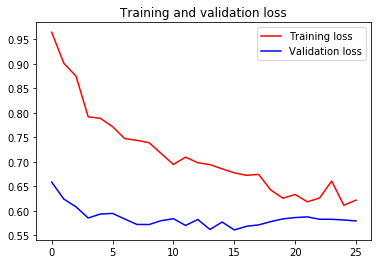

saving model predictions
CNN  stats!
confusionM  [[96 29]
 [38 60]]
acc  0.6995515695067265
recall 0.6122448979591837
auc 0.6901224489795919


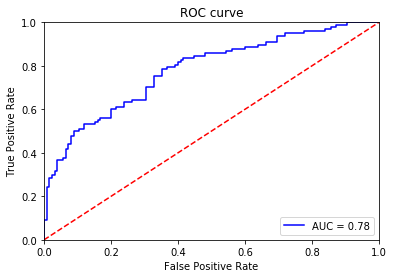

SKlearn predicted proba:  [0.295 0.746 0.225 0.554 0.507 0.185 0.119 0.252 0.317 0.195 0.176 0.156
 0.135 0.42  0.041 0.414 0.117 0.161 0.101 0.449 0.105 0.7   0.078 0.116
 0.111 0.467 0.187 0.332 0.683 0.282 0.438 0.288 0.152 0.091 0.354 0.45
 0.146 0.501 0.381 0.184 0.274 0.26  0.081 0.725 0.389 0.536 0.128 0.188
 0.225 0.431 0.21  0.163 0.444 0.179 0.248 0.058 0.538 0.17  0.936 0.042
 0.507 0.343 0.022 0.331 0.102 0.312 0.132 0.456 0.292 0.504 0.054 0.783
 0.105 0.28  0.098 0.032 0.54  0.228 0.149 0.416 0.143 0.401 0.182 0.546
 0.285 0.13  0.19  0.06  0.693 0.248 0.625 0.146 0.166 0.579 0.082 0.816
 0.301 0.63  0.463 0.178 0.083 0.702 0.114 0.244 0.067 0.166 0.08  0.144
 0.643 0.165 0.762 0.686 0.202 0.058 0.056 0.305 0.176 0.386 0.048 0.298
 0.363 0.373 0.135 0.452 0.449 0.6   0.983 0.827 0.388 0.179 0.409 0.665
 0.581 0.531 0.126 0.883 0.941 0.313 0.049 0.912 0.299 0.771 0.973 0.816
 0.268 0.943 0.293 0.375 0.428 0.747 0.389 0.341 0.436 0.308 0.484 0.116
 0.937 0.588 0.92  0.147 0

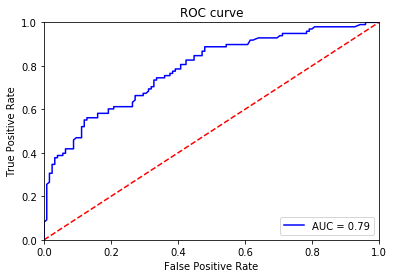

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

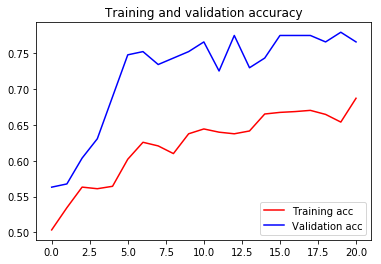

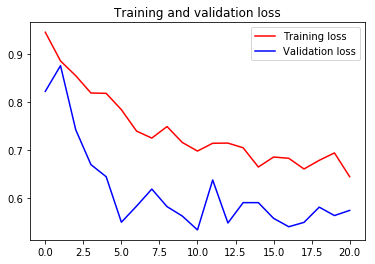

saving model predictions
CNN  stats!
confusionM  [[118   7]
 [ 45  52]]
acc  0.7657657657657657
recall 0.5360824742268041
auc 0.740041237113402


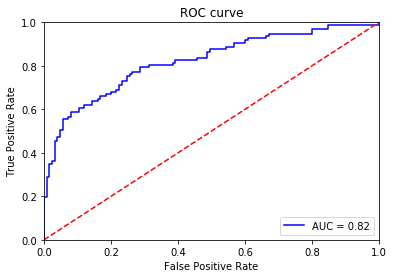

SKlearn predicted proba:  [0.335 0.179 0.142 0.092 0.589 0.234 0.252 0.355 0.3   0.758 0.042 0.65
 0.511 0.758 0.301 0.168 0.198 0.56  0.107 0.25  0.055 0.516 0.601 0.422
 0.929 0.686 0.161 0.311 0.132 0.315 0.314 0.209 0.874 0.287 0.173 0.614
 0.186 0.211 0.476 0.573 0.167 0.303 0.154 0.126 0.131 0.083 0.218 0.378
 0.311 0.205 0.324 0.595 0.399 0.103 0.279 0.082 0.262 0.268 0.361 0.164
 0.118 0.137 0.154 0.064 0.506 0.187 0.296 0.05  0.08  0.482 0.244 0.477
 0.127 0.075 0.493 0.134 0.207 0.206 0.282 0.053 0.272 0.187 0.147 0.073
 0.844 0.587 0.576 0.184 0.537 0.496 0.264 0.479 0.376 0.445 0.292 0.09
 0.863 0.131 0.41  0.131 0.079 0.126 0.075 0.481 0.281 0.422 0.604 0.081
 0.479 0.645 0.171 0.209 0.114 0.231 0.336 0.641 0.306 0.055 0.123 0.069
 0.188 0.124 0.165 0.101 0.074 0.91  0.628 0.373 0.775 0.351 0.973 0.978
 0.948 0.472 0.228 0.91  0.867 0.084 0.577 0.881 0.929 0.674 0.232 0.943
 0.897 0.864 0.241 0.284 0.749 0.112 0.951 0.726 0.839 0.825 0.847 0.875
 0.06  0.375 0.293 0.968 0.

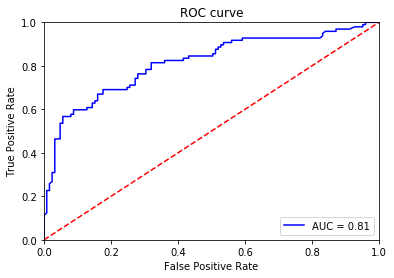

Finished Fold
Train split positives:  389
Train split negatives:  498
Validation split positives:  97
Validation split negatives:  125

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

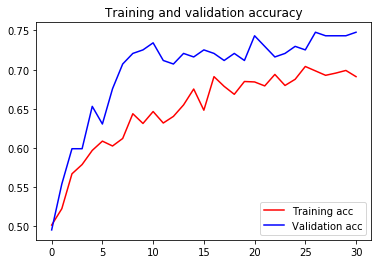

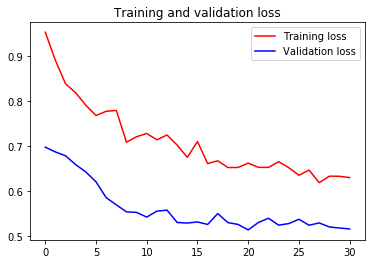

saving model predictions
CNN  stats!
confusionM  [[101  24]
 [ 32  65]]
acc  0.7477477477477478
recall 0.6701030927835051
auc 0.7390515463917525


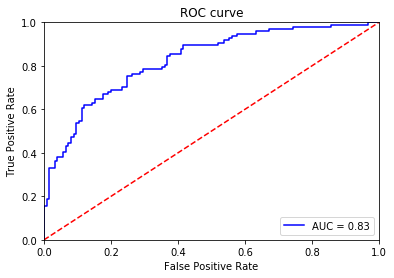

SKlearn predicted proba:  [0.373 0.228 0.164 0.232 0.366 0.232 0.087 0.201 0.062 0.185 0.133 0.107
 0.161 0.507 0.103 0.04  0.277 0.08  0.111 0.211 0.071 0.447 0.46  0.211
 0.336 0.052 0.671 0.495 0.081 0.072 0.074 0.065 0.16  0.143 0.135 0.299
 0.169 0.378 0.401 0.127 0.444 0.107 0.097 0.284 0.767 0.209 0.097 0.337
 0.252 0.165 0.13  0.154 0.129 0.08  0.493 0.03  0.474 0.257 0.467 0.922
 0.122 0.934 0.274 0.129 0.12  0.264 0.543 0.314 0.194 0.151 0.176 0.636
 0.283 0.554 0.124 0.149 0.71  0.075 0.305 0.124 0.184 0.331 0.295 0.19
 0.094 0.164 0.132 0.187 0.082 0.282 0.055 0.257 0.11  0.091 0.088 0.753
 0.154 0.145 0.366 0.624 0.134 0.482 0.105 0.076 0.664 0.367 0.29  0.404
 0.806 0.38  0.15  0.599 0.189 0.3   0.09  0.291 0.834 0.208 0.293 0.191
 0.073 0.503 0.052 0.575 0.165 0.411 0.266 0.871 0.186 0.994 0.263 0.939
 0.466 0.236 0.966 0.859 0.457 0.924 0.531 0.734 0.334 0.949 0.764 0.722
 0.148 0.914 0.449 0.365 0.74  0.91  0.211 0.553 0.099 0.954 0.752 0.622
 0.696 0.915 0.675 0.802 0

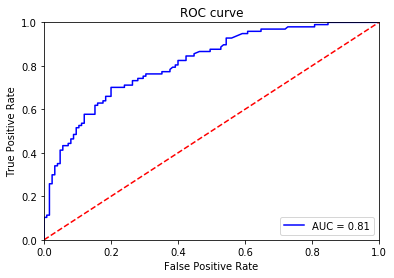

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

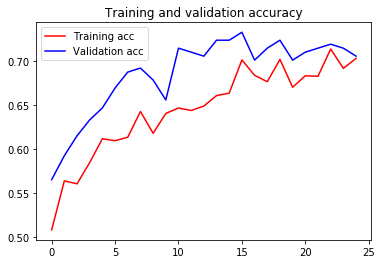

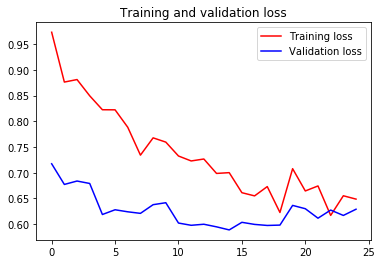

saving model predictions
CNN  stats!
confusionM  [[109  15]
 [ 50  47]]
acc  0.7058823529411765
recall 0.4845360824742268
auc 0.6817841702693714


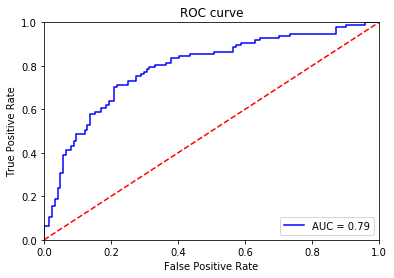

SKlearn predicted proba:  [0.53  0.518 0.273 0.161 0.465 0.341 0.112 0.15  0.178 0.12  0.451 0.322
 0.243 0.42  0.2   0.319 0.233 0.248 0.164 0.132 0.088 0.953 0.32  0.134
 0.499 0.479 0.6   0.542 0.4   0.595 0.254 0.075 0.216 0.077 0.151 0.054
 0.293 0.593 0.514 0.078 0.274 0.562 0.602 0.141 0.082 0.193 0.134 0.329
 0.409 0.084 0.962 0.313 0.246 0.284 0.363 0.87  0.227 0.094 0.143 0.152
 0.617 0.43  0.109 0.206 0.061 0.104 0.402 0.054 0.108 0.18  0.228 0.118
 0.435 0.102 0.25  0.126 0.257 0.194 0.153 0.645 0.221 0.327 0.381 0.353
 0.115 0.213 0.562 0.957 0.877 0.263 0.497 0.256 0.235 0.34  0.212 0.194
 0.157 0.158 0.376 0.192 0.343 0.416 0.259 0.083 0.735 0.133 0.225 0.28
 0.248 0.565 0.074 0.083 0.163 0.121 0.271 0.096 0.111 0.666 0.06  0.211
 0.171 0.095 0.643 0.148 0.544 0.316 0.813 0.633 0.898 0.882 0.793 0.945
 0.855 0.595 0.435 0.396 0.583 0.787 0.689 0.168 0.996 0.218 0.36  0.653
 0.688 0.744 0.673 0.765 0.386 0.611 0.352 0.646 0.64  0.321 0.969 0.467
 0.242 0.423 0.122 0.397 0

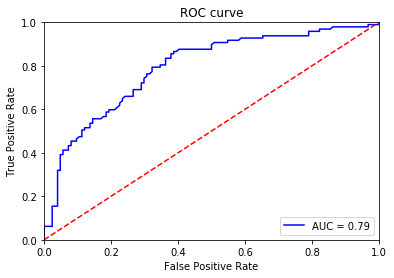

Finished Fold
Train split positives:  389
Train split negatives:  499
Validation split positives:  97
Validation split negatives:  124

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______

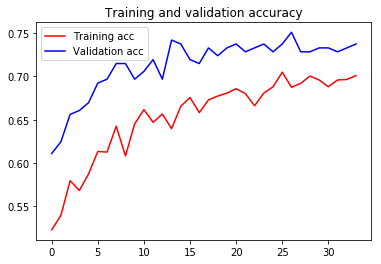

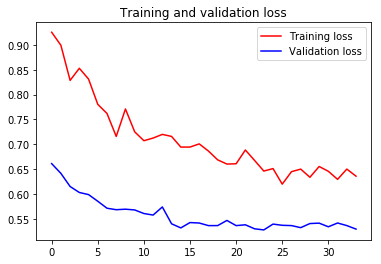

saving model predictions
CNN  stats!
confusionM  [[95 29]
 [29 68]]
acc  0.7375565610859729
recall 0.7010309278350515
auc 0.733579980046558


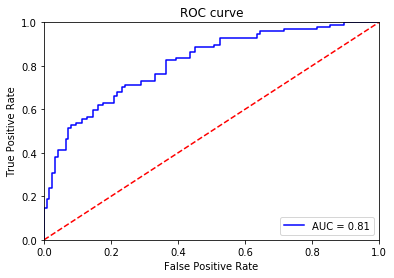

SKlearn predicted proba:  [0.361 0.292 0.309 0.275 0.384 0.073 0.257 0.243 0.208 0.501 0.317 0.129
 0.027 0.446 0.227 0.058 0.672 0.251 0.133 0.097 0.237 0.094 0.084 0.242
 0.39  0.786 0.057 0.143 0.075 0.147 0.234 0.214 0.467 0.428 0.271 0.294
 0.279 0.215 0.374 0.074 0.069 0.2   0.61  0.051 0.752 0.495 0.123 0.192
 0.417 0.529 0.164 0.302 0.178 0.085 0.206 0.477 0.058 0.767 0.364 0.103
 0.403 0.212 0.459 0.287 0.38  0.121 0.121 0.696 0.28  0.191 0.389 0.158
 0.131 0.063 0.033 0.238 0.64  0.253 0.7   0.104 0.445 0.582 0.06  0.177
 0.366 0.3   0.511 0.227 0.464 0.045 0.199 0.27  0.026 0.241 0.277 0.194
 0.28  0.119 0.206 0.17  0.268 0.587 0.07  0.502 0.179 0.46  0.114 0.148
 0.597 0.483 0.148 0.273 0.27  0.11  0.067 0.136 0.408 0.869 0.275 0.099
 0.247 0.276 0.186 0.092 0.663 0.552 0.446 0.445 0.272 0.317 0.322 0.815
 0.098 0.203 0.462 0.273 0.236 0.973 0.24  0.238 0.432 0.351 0.694 0.945
 0.844 0.445 0.896 0.605 0.646 0.741 0.471 0.479 0.817 0.356 0.243 0.307
 0.834 0.633 0.623 0.203 

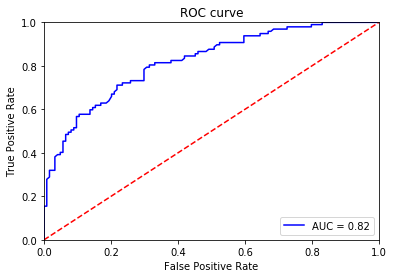

Finished Fold


In [6]:
classifiers = [(RandomForestClassifier(n_estimators=1000,criterion="entropy",random_state=42),"FFT+RF")]

execute_10_5_folds(z,labels,classifiers,_train_models_fft_Fold)      